In [1]:
import pandas as pd
import IPython.display as ipd
import numpy as np
from pathlib import Path
import librosa
import matplotlib.pyplot as plt
import os

import random
import soundfile as sf

import warnings

warnings.filterwarnings("ignore")

%load_ext autotime

* Get training data

In [2]:
train = pd.read_csv('Train.csv')
train.head()

fn      label
0  audio_files/IV38R7F.wav    akawuka
1  audio_files/KM4SKWT.wav     banana
2  audio_files/F5POSU9.wav  obulwadde
3  audio_files/MMVDXG2.wav   nnyaanya
4  audio_files/9TVM96F.wav      pampu

In [3]:
train.label.nunique()

193

In [4]:
train.shape

(1109, 2)

<AxesSubplot:ylabel='Frequency'>

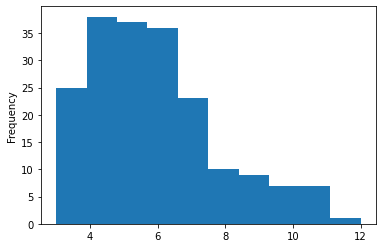

In [5]:
# Plot a histogram showing how common different counts are
train.groupby('label').count()['fn'].plot(kind='hist')

* New data

In [296]:
os.listdir(main_dir)

['okulimibwa',
 'micungwa',
 'muwogo',
 'ensiringanyi',
 'omuceere',
 'akamonde',
 'ebisooli',
 'lusuku',
 'okufukirira',
 'enva endiirwa',
 'okuzifuuyira',
 'kukungula',
 'omucungwa',
 'obutunda',
 'okusaasaana',
 'obulwadde',
 '.DS_Store',
 'ppaapaali',
 'eggobe',
 'abalimi',
 'ensujju',
 'emicungwa',
 'ebikongoliro',
 'nnimiro',
 'ekijanjaalo',
 'nnakati',
 'nfukirira',
 'amappapaali',
 'omulimi',
 'amakungula',
 'ebbugga',
 'ekirime',
 'ebimera',
 'matooke',
 'emiyembe',
 'obusaanyi',
 'ekitooke',
 'miceere',
 'ensuku',
 'olusuku',
 'ekibala',
 'okukungula',
 'ebikolo',
 'okusimba',
 'ebisoolisooli',
 'ennyaanya',
 'kasaanyi',
 'bibala',
 'mulimi',
 'kikolo',
 'ekikoola',
 'obutungulu',
 'mucungwa',
 'nnyaanya',
 'ekikajjo',
 'endagala',
 'okunnoga',
 'ebigimusa',
 'okulima',
 'ebiwuka',
 'afukirira',
 'bulimi',
 'lumonde',
 'obuwuka',
 'faamu',
 'akasaanyi',
 'ekigimusa',
 'okusiga',
 'ekimera',
 'ebirime',
 'ebiwojjolo',
 'amatooke',
 'akammwanyi',
 'ennimiro',
 'ebijanjaalo',
 '

time: 4.82 ms


In [297]:
'hello'.startswith('h')

True

time: 2.22 ms


In [299]:
new_data = []

main_dir = "nlp_keywords/"

for word in os.listdir(main_dir):
    if not word.startswith('.'):
        content = os.listdir(main_dir + word)
        for file in content:
            file_name = main_dir + word + "/" + file
            new_data.append((file_name, word))
            print(file_name)

nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d.wav
nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_dd9d6fbb627f45ea91478426688bc23a.wav
nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_199aa6b9fae3487ea560fa8cd391d9bd.wav
nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_a321281cede24d86a2133c4d995a1e02.wav
nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_371750900a2d42d5a39e34e82b3b8245.wav
nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_07da47ef363a4bedb841d2c6f81cecd0.wav
nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_e4238c2006b34d449adb0cf4bdf66c0a.wav
nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_56b7178f99a542e29b088655ea6f79e0.wav
nlp_keywords/okulimibwa/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97.wav
nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_eefe8a9aac984225897aefae1ed93175.wav
nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f9e12934f65_7ba

nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_7cad0be5ec1e499bab9e72167cab2bb1.wav
nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_89de5cb83a8f4302ba14873794eec181.wav
nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_a040659c49634e48b8cb69826327f106.wav
nlp_keywords/amakoola/d027264654b94950aeb204f64d05d8d7_0fbdba1947ae47689594a602e15908c4.wav
nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_5709b86ecace4f799760fc09491eec63.wav
nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_38689969ccdb4d4fb0bbddcfa7dcff4a.wav
nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_d5f4bb0697d649fcab1edc5d761608a8.wav
nlp_keywords/amakoola/6fbfcce2cf21419e97290f9e12934f65_d19d9f6e10da47c0a80f8730146b180b.wav
nlp_keywords/eddagala/2497942026ef4d7e97d47fc2738d7c27_babba233cb054045916a5f2699aff310.wav
nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_101359276ee34dd2b473f6765bdbdb4c.wav
nlp_keywords/pampu/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e08

In [302]:
main_dir = "latest_keywords/"

for word in os.listdir(main_dir):
    if not word.startswith('.'):
        content = os.listdir(main_dir + word)
        for file in content:
            file_name = main_dir + word + "/" + file
            new_data.append((file_name, word))
            print(file_name)

latest_keywords/okulimibwa/5aa4893526794a73a3ed0a7ebba2a7bf_20ddd75604564db2ac50b23c45b91133.wav
latest_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_138d1d28b6554f5bab89ef00b465248f.wav
latest_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_53929f285ae044c4864e9ed32c333c84.wav
latest_keywords/okulimibwa/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50.wav
latest_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_ab49af07811a4db49f257d90bca8fbd9.wav
latest_keywords/okulimibwa/5aa4893526794a73a3ed0a7ebba2a7bf_33eaf2907e6e4677b0a052b358d19e36.wav
latest_keywords/okulimibwa/eb702740d41f4f389192ec5c6a3ae95f_a992edda80d341f09043dc9c12d2168c.wav
latest_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_774a74d5cc28488ca52b42f223548450.wav
latest_keywords/okulimibwa/1b5a69c4b88b41eb9577a656e11bb7dd_5d4dcddc8d604c52ba61ae04d392f071.wav
latest_keywords/micungwa/771b5044334242fb9caff8a71fd7891e_586c99a16b1f4042a08d28ad5212fa82.wav
latest_keywords/micungwa/771b504

latest_keywords/emboga/62a43378312341918722fbe81a34ffd7_25fe178e74874b2a8f6ecf7bb4a85f31.wav
latest_keywords/emboga/79aac18aacc74cc092d00778f7f323da_1f423135248d4b44a51ea02d006f022a.wav
latest_keywords/emboga/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88.wav
latest_keywords/emboga/771b5044334242fb9caff8a71fd7891e_bad7425967754656a3921a059643a738.wav
latest_keywords/emboga/771b5044334242fb9caff8a71fd7891e_93fb2f68bcbb43e6908c15e5134e3880.wav
latest_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_cda86edbc31044b995d13453f3d302f6.wav
latest_keywords/emboga/79aac18aacc74cc092d00778f7f323da_685cfebecb11423a9adb5f699926d16d.wav
latest_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_d7fdd8c2b14f44c1ba62133ee2f12591.wav
latest_keywords/emboga/771b5044334242fb9caff8a71fd7891e_3171841762a547f790d3e07d94c0a3fe.wav
latest_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe.wav
latest_keywords/doodo/2497942026ef4d7e97d47fc2738d7c27_d26fd6d7014f476

In [337]:
len(new_data)

3600

time: 1.79 ms


In [306]:
train_new = pd.DataFrame(new_data, columns=['fn', 'label'])

time: 2.08 ms


In [338]:
train_new.head()

fn       label
0  nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f...  okulimibwa
1  nlp_keywords/okulimibwa/d027264654b94950aeb204...  okulimibwa
2  nlp_keywords/okulimibwa/d027264654b94950aeb204...  okulimibwa
3  nlp_keywords/okulimibwa/d027264654b94950aeb204...  okulimibwa
4  nlp_keywords/okulimibwa/d027264654b94950aeb204...  okulimibwa

time: 13.4 ms


In [339]:
train_new.shape

(3600, 2)

time: 3.52 ms


* Augment new data

In [48]:
aug_size = 50

augmentation_config = {'noise_addition' : np.random.uniform(low=0.001, high=0.005, size=(aug_size,)),
                       'time_shift' : np.random.randint(low=2, high=10, size=aug_size),
                       'time_stretch' : np.random.uniform(low=0.5, high=0.9, size=(aug_size,)),
                       'pitch_shift' : np.random.randint(low=-4, high=4, size=aug_size)}

In [ ]:
i = 0

main_dir = 'nlp_keywords/'

for word in os.listdir(main_dir):
    if not word.startswith('.'):
        content = os.listdir(main_dir + word)
        for file in content:
            file_name = main_dir + word + "/" + file
            try:
                wav, sr = librosa.load(file_name,sr=None)
                i = i + 1
            except Exception as e:
                print(e)
                break
    break
    
#UserWarning: PySoundFile failed. Trying audioread instead.
#warnings.warn("PySoundFile failed. Trying audioread instead.")

In [340]:
wav, sr = librosa.load(file_name,sr=None)

time: 88.4 ms


In [341]:
len(aug_data)

10955

time: 2.33 ms


In [346]:
for index, row in train_new.iterrows():
    #Path()
    wav, sr = librosa.load(row["fn"],sr=None)
    
    new_name_prefix = 'audio_files_augmented/' + row["fn"].split('/')[-1].split('.')[0]
    
    n_operations = np.random.randint(low=1, high=5)
    # add noise
    for i in range(n_operations):
        factor = np.random.uniform(low=0.001, high=0.005)
        wav_n = wav + factor*np.random.normal(0,1,len(wav))
        new_name = new_name_prefix + '_noise_' + str(factor).split('.')[-1] +'.wav'
        #librosa.output.write_wav(new_name,wav_n,sr)
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add time shift
    for i in range(n_operations):
        factor = np.random.randint(low=2, high=10)
        wav_n = np.roll(wav,int(sr/factor))
        new_name = new_name_prefix + '_shift_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add time stretch
    for i in range(n_operations):
        factor = np.random.uniform(low=0.5, high=0.9)
        wav_n = librosa.effects.time_stretch(wav,factor)
        new_name = new_name_prefix + '_stretch_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add pitch shift
    for i in range(n_operations):
        factor = np.random.randint(low=-4, high=4)
        wav_n = librosa.effects.pitch_shift(wav,sr,n_steps=factor)
        new_name = new_name_prefix + '_pitch_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_noise_002854281775637948.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_noise_0025509360085771613.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_noise_004997468216826593.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_noise_0035710006114156893.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_stretch_8522949825580006.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_stretch_7191614243832235.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9746f388d_stretch_8995330757675513.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7e62e3718f5640db9eeb2dc9

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_56b7178f99a542e29b088655ea6f79e0_stretch_7442342515024694.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_56b7178f99a542e29b088655ea6f79e0_stretch_8697889857010461.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_56b7178f99a542e29b088655ea6f79e0_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97_noise_004424905012312086.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97_stretch_6949974053842296.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97_stretch_7885449611187068.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42a0320a095e4096ad85a79f04300b97_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eefe8a9aac984225897aefae1ed93175_noise_003623849928226014.w

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f55134b3ddd04def9c9d543baf666016_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f55134b3ddd04def9c9d543baf666016_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_noise_00413411747104778.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_stretch_8832909904537056.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eeed2ef3cad349a88db02bc2e21b136d_stretch_6389856763766812.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6faf6f1cdee4ef4a07a66c330d4a677_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6faf6f1cdee4ef4a07a66c330d4a677_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_noise_0013157319406937246.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_noise_003935951670535596.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_noise_004239973047376269.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ee01b46de60e4100b28a1ade0f54ff80_stretch_6002162659581126.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fbaccd68652849768581db5abcf7ac06_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fbaccd68652849768581db5abcf7ac06_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fbaccd68652849768581db5abcf7ac06_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c_noise_001302846763773954.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c_noise_001198281778105085.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c_noise_00325852554636547.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5b64f937b8e74d4c8cdaa3529aad724c_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c1ca5152787b4aacb8ef005c97f81023_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c1ca5152787b4aacb8ef005c97f81023_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_noise_0022297186227139606.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_noise_001087724612111631.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_stretch_7473881677093224.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_stretch_739432359345094.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_17b81670dcc045d7a930938611c964a3_stretch_5542551826069199.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7fd408210c6d40fe8434f20d34830340_stretch_6018235028287885.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7fd408210c6d40fe8434f20d34830340_stretch_7563077330085444.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7fd408210c6d40fe8434f20d34830340_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88_noise_0029849693683994473.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88_noise_0016517363959453056.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88_noise_0027331197944605234.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8243ffdc86d14e2eb6bb842a7fb84f88_stretch_660130210061432

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_noise_004966527870741015.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_noise_0024581716360810462.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_stretch_5376711132140285.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_stretch_7939513225861652.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_stretch_5178723222755792.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_stretch_6767743342652678.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_637b7d2828d24b76b97e7ca4e9bb09cd_pitch_-2.

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3_stretch_599794186927721.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3_stretch_8311183006444365.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2104609bd057490fb869f4d480d810c3_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9f4c979d0c3d4daca525c9ece58541e8_noise_0044625101543085514.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9f4c979d0c3d4daca525c9ece58541e8_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9f4c979d0c3d4daca525c9ece58541e8_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a5490ac9cf8d4f8eb83618c0a5e60675_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a5490ac9cf8d4f8eb83618c0a5e60675_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_noise_0036351392060199597.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_noise_002130181749852732.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_noise_0039779894666634.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_noise_004708718688191817.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_911c4476a455404686175ce16a57b2c9_shift_5.wav
audio_files_augmented/d027264654

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_60d74010cde14c0284eccd8ed935a3f8_stretch_5358095931942997.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_60d74010cde14c0284eccd8ed935a3f8_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_60d74010cde14c0284eccd8ed935a3f8_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_60d74010cde14c0284eccd8ed935a3f8_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_60d74010cde14c0284eccd8ed935a3f8_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d39ed2ed6168413b99084867e2fc9d5f_noise_0037992713532154845.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d39ed2ed6168413b99084867e2fc9d5f_noise_003880524768109862.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d39ed2ed6168413b99084867e2fc9d5f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d39ed2ed6168413b99084867e2fc9d5f_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_133e58c46b014b91a0127028df8524a7_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_133e58c46b014b91a0127028df8524a7_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_133e58c46b014b91a0127028df8524a7_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_133e58c46b014b91a0127028df8524a7_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c74fd25b4fcf4eaebac45364f2b45ebe_noise_0018007801947587149.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c74fd25b4fcf4eaebac45364f2b45ebe_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c74fd25b4fcf4eaebac45364f2b45ebe_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c74fd25b4fcf4eaebac45364f2b45ebe_stretch_8336095171260902.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c74fd25b4fcf4eaebac45364f2b45ebe_stretch_896589678301672.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e1

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_221415202d4941519f91ac7f6070b7e0_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_noise_0038542291516637708.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_noise_002067722909677198.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_noise_0012478578687387422.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_stretch_5809800738918838.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d2d11ab407647a88d0831ce1484b197_stretch_8656214000366877.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff223fec3f304ddfbd054b7176e13b06_stretch_5664026256363455.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff223fec3f304ddfbd054b7176e13b06_stretch_5762485639957194.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff223fec3f304ddfbd054b7176e13b06_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f_noise_003751317266210664.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f_noise_003658116036972978.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f_noise_0034003105317289835.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a5e39b9a086045199d7e5852691fd43f_shift_4.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_noise_004594294693822654.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_noise_001991181422828387.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_stretch_6890301346149291.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_stretch_5153790386681226.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_283a120782294732939fa25cb96f58a0_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0ba4c67820314ca69e643110ed324239_noise_0031206030216114193.wav
audio_files_a

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f3d719abdd6f4192bddd5a6b91ae8f7a_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f3d719abdd6f4192bddd5a6b91ae8f7a_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f3d719abdd6f4192bddd5a6b91ae8f7a_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a_noise_0031832830160017974.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a_noise_003819129383531765.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a_noise_002924745509201536.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a89ac67720f94828904398f7b5e0014a_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6b8470d309bb4e13aee202881f373765_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6b8470d309bb4e13aee202881f373765_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6b8470d309bb4e13aee202881f373765_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6b8470d309bb4e13aee202881f373765_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a66d614e07854cbe9c3a0bd49abbaeac_noise_0033423336053137326.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a66d614e07854cbe9c3a0bd49abbaeac_noise_003683094743494519.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a66d614e07854cbe9c3a0bd49abbaeac_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a66d614e07854cbe9c3a0bd49abbaeac_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a66d614e07854cbe9c3a0bd49abbaeac_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a66d614

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9c992fdb18f4967868e156cbdffba62_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9c992fdb18f4967868e156cbdffba62_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9c992fdb18f4967868e156cbdffba62_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9c992fdb18f4967868e156cbdffba62_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c7529891db3e44f29bdde1b1453417a7_noise_0013304410325440212.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c7529891db3e44f29bdde1b1453417a7_noise_004491117631480987.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c7529891db3e44f29bdde1b1453417a7_noise_0033911413860739687.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c7529891db3e44f29bdde1b1453417a7_noise_0036915521487721624.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c7529891db3e44f29bdde1b1453417a7_shift_5.wav
audio_files_augmented/d027

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d512492769ad4152b2ad9d60cf98e692_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d512492769ad4152b2ad9d60cf98e692_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d512492769ad4152b2ad9d60cf98e692_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78_noise_0045306814025238545.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78_stretch_7858613769785676.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32647c79194c40859066d41c7cd5ff78_stretch_6410080302548345.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ab6dc44e5fc14540a2394f02adc4077d_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ab6dc44e5fc14540a2394f02adc4077d_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_noise_0018145548395417173.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_noise_004933398339916379.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_noise_003497721786009842.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_noise_001551198054608728.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f538bc468314104848968a02f18c02e_shift_4.wav
audio_files_augmented/6fbfcce2c

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_504bf610b26f40019f3eefb0151b57cd_stretch_7915015779795203.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_504bf610b26f40019f3eefb0151b57cd_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_noise_0033566521533131824.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_noise_0029053627702104144.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2f84bf98dec43ef983d79350f712434_stretch_7245112982743191.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dd59fc82084d420c83a0b6ee571e6815_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dd59fc82084d420c83a0b6ee571e6815_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_noise_0012655009220103892.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_noise_004075234603329088.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_noise_0035185420476961113.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_stretch_8705709900185079.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_stretch_8367415724498699.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c8f44c2cb5c44c4fa14a3150ca8a62fc_stretch_7155218149213514

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_10e5bb7c049842debb0e7c74d0cdac28_stretch_7683921351284522.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_10e5bb7c049842debb0e7c74d0cdac28_stretch_6097977656418498.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_10e5bb7c049842debb0e7c74d0cdac28_stretch_5751476255437215.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_10e5bb7c049842debb0e7c74d0cdac28_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e4af964b74a4cf8b699994b6fc006f7_noise_004411482836475343.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e4af964b74a4cf8b699994b6fc006f7_noise_004156960519009748.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e4af964b74a4cf8b699994b6fc006f7_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e4af964b74a4cf8b699994b6fc006f7_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e4af964b74a4cf8b699994b6fc006f7_shift_8.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9ea150fb2f0d414ea2112c983dba77c1_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9ea150fb2f0d414ea2112c983dba77c1_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_noise_003674404665939119.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_noise_00391419245728151.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_stretch_5557851760438152.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_stretch_638688048229977.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6a731f307e86421e8e3b66c44a6edd08_pitch_-3.wav
audio_files_augmented/d02726465

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65754d81d3e14a82b63a326534a0da7d_stretch_567245355225546.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65754d81d3e14a82b63a326534a0da7d_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65754d81d3e14a82b63a326534a0da7d_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65754d81d3e14a82b63a326534a0da7d_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d7a79f70d40247e6bcc8f96fde36d784_noise_0014074905173103729.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d7a79f70d40247e6bcc8f96fde36d784_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d7a79f70d40247e6bcc8f96fde36d784_stretch_607159282183245.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d7a79f70d40247e6bcc8f96fde36d784_stretch_8348150173287039.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d7a79f70d40247e6bcc8f96fde36d784_stretch_6224192443640817.wav
audio_files_aug

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c118346bc68d417f96ecd91e4ea0e84b_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c118346bc68d417f96ecd91e4ea0e84b_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_noise_004423194177461115.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_noise_0022723064874048166.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_noise_003951395205497784.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_noise_0032570038042685004.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d02f150ae524c5ba0ea9752f00be1e0_stretch_6829860594635437.wav
audio_files

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d0c89419ca942f0ad6c6c7752132ad2_stretch_5039646815764037.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d0c89419ca942f0ad6c6c7752132ad2_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d0c89419ca942f0ad6c6c7752132ad2_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc_noise_003206929402625001.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc_noise_0026707341216674263.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88f28bc88168496e9180c0d4c2cc29bc_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d_stretch_6871917370219807.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d_stretch_6914828740574892.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d_stretch_7163410262730109.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_35adc176e0654347b997daca22a1782d_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d029b195b6ed4827a9d15565eaaf9631_noise_0010233798414916006.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d029b195b6ed4827a9d15565eaaf9631_noise_002817875836133083.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d029b195b6ed4827a9d15565eaaf9631_noise_002855074422553351.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d029b195b6ed4827a9d15565eaaf9631_shift_5.

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65a88d0f6a6943639fe86165f79608be_stretch_5432656508413867.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65a88d0f6a6943639fe86165f79608be_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65a88d0f6a6943639fe86165f79608be_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65a88d0f6a6943639fe86165f79608be_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_65a88d0f6a6943639fe86165f79608be_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcd29eb8905b457bae83e64bf5699f93_noise_0026105977278779975.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcd29eb8905b457bae83e64bf5699f93_noise_0019565542320641467.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcd29eb8905b457bae83e64bf5699f93_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcd29eb8905b457bae83e64bf5699f93_stretch_7396612158854505.wav
audio_files_augmented/d027264

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3c8dfe215501448baba26d3d7dd3687b_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3c8dfe215501448baba26d3d7dd3687b_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713_noise_003071133266176999.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713_noise_003596729916256233.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713_noise_0021942269361525965.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713_stretch_8140381058218056.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_db39240fcdf64a7182ded13c772f6713_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81cc3065f05a44468d2bf4b117bd7f3b_noise_0035620822248847717.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_21d44d6299274b699c74dc620ede2f43_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_21d44d6299274b699c74dc620ede2f43_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_21d44d6299274b699c74dc620ede2f43_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf_noise_0016492214040519375.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf_noise_00289641132499886.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf_stretch_6294263432678525.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf_stretch_5631964132532422.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc83e9f687654f4ab332c6184a66fcdf_stretch_7484719997898662.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_noise_003301066817135483.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_noise_0023628420037374344.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_noise_004948800375116202.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_stretch_8760614349989884.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_stretch_6004261493520127.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ab80c5b97851465babbd5780c0a389b8_pitch_-2.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e_stretch_6248636019524412.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e_stretch_8519750838929481.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5985ac8711fd43509d585f8f382dc78e_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71f4abba86064444860123661174db84_noise_0035324284837001535.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71f4abba86064444860123661174db84_noise_0012375781600570876.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71f4abba86064444860123661174db84_shift_6.wav
audio_files_augmented/d0272646

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0f124ce7ff0421abb2ab4581f9b672a_stretch_6166727445177794.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0f124ce7ff0421abb2ab4581f9b672a_stretch_5918055700193301.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0f124ce7ff0421abb2ab4581f9b672a_stretch_8321099420334024.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0f124ce7ff0421abb2ab4581f9b672a_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0f124ce7ff0421abb2ab4581f9b672a_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0aa0d1f275ba45e9a843fc7feeaf6b30_noise_0013198980762625526.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0aa0d1f275ba45e9a843fc7feeaf6b30_noise_004777854897287994.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0aa0d1f275ba45e9a843fc7feeaf6b30_noise_0024676061100412064.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0aa0d1f275ba45e9a843fc7feeaf6b30_shift_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_noise_00473442850788847.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_noise_004108002142058413.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_noise_0028811889485244645.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_noise_003366065805917087.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f3ccf2c9ed1492db5860e6d789f8f6a_stretch_5670513114551783.wav
audio_files_aug

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ad9b6b45876e41c7835a69be633be20a_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ad9b6b45876e41c7835a69be633be20a_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_noise_0018842481422821022.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_noise_001726712984629271.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_noise_0035490045826719802.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_stretch_677141200924603.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_stretch_6189931268473455.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c206c546d33c454cb98de6f861ebb9fc_stretch_5989516752694243

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ced81af0c20452c86e6b870749510e3_stretch_524019227310403.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ced81af0c20452c86e6b870749510e3_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ced81af0c20452c86e6b870749510e3_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ced81af0c20452c86e6b870749510e3_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_86aa1183597045c3b6e2419e4e274d37_noise_0010136208991692887.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_86aa1183597045c3b6e2419e4e274d37_noise_0034354827342208045.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_86aa1183597045c3b6e2419e4e274d37_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_86aa1183597045c3b6e2419e4e274d37_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_86aa1183597045c3b6e2419e4e274d37_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_136da7ecfd6b44918acfd9f9eb40cc15_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_136da7ecfd6b44918acfd9f9eb40cc15_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_136da7ecfd6b44918acfd9f9eb40cc15_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_136da7ecfd6b44918acfd9f9eb40cc15_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_caded975b61b4f7684ed8f5f421ab3e0_noise_0019787180648057874.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_caded975b61b4f7684ed8f5f421ab3e0_noise_004756113665825481.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_caded975b61b4f7684ed8f5f421ab3e0_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_caded975b61b4f7684ed8f5f421ab3e0_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_caded975b61b4f7684ed8f5f421ab3e0_stretch_5669685709256113.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99428df921b841fd8e8968f48f2ffa13_stretch_7504998483024974.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99428df921b841fd8e8968f48f2ffa13_stretch_6844891573817009.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99428df921b841fd8e8968f48f2ffa13_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99428df921b841fd8e8968f48f2ffa13_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5e500138f30440c7956e56fdd472c6bc_noise_004670074855346207.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5e500138f30440c7956e56fdd472c6bc_noise_004667207773009217.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5e500138f30440c7956e56fdd472c6bc_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5e500138f30440c7956e56fdd472c6bc_stretch_84023807344855.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5e500138f30440c7956e56fdd472c6bc_pitch_-2.wav
audio_files_aug

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_06ad3b9d1aad45d2b64141ad61232144_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_06ad3b9d1aad45d2b64141ad61232144_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_06ad3b9d1aad45d2b64141ad61232144_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe_noise_004939413446738937.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe_noise_0040562397008056476.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe_noise_002026025135421252.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a46d19d91f364e338efe9bfdef418bfe_stretch_8246884523000593.wav
audio_files_augmented/d02726

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_noise_002130504981457833.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_noise_003035232275885282.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_stretch_7731327664384874.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_stretch_5732643403867936.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_stretch_7008269720732818.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbb59e525d9e4ac7acb6d951c1bef74a_stretch_6654299684094148.wa

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f52fcff9f2fc4bcbbd594a10be450066_stretch_8663594125854934.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f52fcff9f2fc4bcbbd594a10be450066_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_noise_004247172064137205.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_noise_004627594419156226.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_noise_004845335632284408.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_noise_004094297660344512.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c0837a2e820149b2bfedb3e748961af1_shift_8.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66b86561048d4b88865af4675bd83310_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66b86561048d4b88865af4675bd83310_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66b86561048d4b88865af4675bd83310_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516_noise_0031740068096929104.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516_stretch_6308474067448091.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516_stretch_6428553220068745.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aedd02419855468cb62163b1ba431516_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_db399a025af74cc3943b45d757f7ab99_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_noise_0033719278376668966.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_stretch_6473537663800315.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_stretch_7805730010024152.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcf5f5a0f3804ecbb6001a78c85d3a62_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_74f4745835e34486819cd2c33e10c98d_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_74f4745835e34486819cd2c33e10c98d_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_noise_004681522899153063.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_noise_001766998436598343.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_noise_0010843121246908013.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_stretch_8566847335795476.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_96fe08d01d694f71b07422cf6a39a92f_stretch_6492509404569218.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_67a8d37e631349f4a7ac5ce95500444c_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_noise_0033072600020067184.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_noise_0028860849705565775.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_noise_0039895226333169775.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_stretch_8235721103947269.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_stretch_6467475358024237.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3a4ccd0c7722478b98f2867fc2468cc3_pitch_1.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8e308d78ad540009ce8c735549a8c9a_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8e308d78ad540009ce8c735549a8c9a_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8e308d78ad540009ce8c735549a8c9a_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5_noise_004889834748261348.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5_noise_0035672141562622184.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab544478043fda8f6ec65640e39f5_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05ab5444

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eb4494e48e9c416ab05b10603da287a2_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_eb4494e48e9c416ab05b10603da287a2_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_noise_00435394208946757.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_noise_002295560912706761.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_noise_002484222249814382.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_noise_0023932209139518367.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c81b0a2eb866451ea8f60fd8c3418612_shift_5.wav
audio_files_augmented/6fbfcce2c

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ac69127bb5b14610a1f65217db9688bd_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_noise_00472324856432769.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_noise_001262603829231863.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_noise_0018827714352881793.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_noise_0020189195389035304.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_stretch_7514586380044496.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_98f5614e662b4ea3998b69c977fa4f1a_pitch_1.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1a728e9a9e114b4e8f50f26cc0f9ca00_stretch_6500909377135247.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1a728e9a9e114b4e8f50f26cc0f9ca00_stretch_5090990235921429.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1a728e9a9e114b4e8f50f26cc0f9ca00_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1a728e9a9e114b4e8f50f26cc0f9ca00_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_032cbcb250a346e9b8471864d6be949a_noise_004037197101193604.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_032cbcb250a346e9b8471864d6be949a_noise_003405961758224303.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_032cbcb250a346e9b8471864d6be949a_noise_0013388858010433804.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_032cbcb250a346e9b8471864d6be949a_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_032cbcb250a346e9b8471864d6be949a_stretch_513625579040015.wa

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ec4d09663d149beb7e548909a16f485_stretch_5385040453857575.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ec4d09663d149beb7e548909a16f485_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ec4d09663d149beb7e548909a16f485_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e_noise_0025339168113125508.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e_noise_004439566827521907.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da9038a3ad704293b32a527225b07c2e_stretch_6890466726118457.wav
audio_files_augmented/d0272646

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e853aa9f7064eb797820d12878f82fd_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e853aa9f7064eb797820d12878f82fd_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e853aa9f7064eb797820d12878f82fd_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e853aa9f7064eb797820d12878f82fd_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_569f1d9fcdf1480886e50799111d0360_noise_004673028077171326.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_569f1d9fcdf1480886e50799111d0360_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_569f1d9fcdf1480886e50799111d0360_stretch_829273974878945.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_569f1d9fcdf1480886e50799111d0360_stretch_8292329640662452.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_569f1d9fcdf1480886e50799111d0360_stretch_8935472310191164.wav
audio_files_augmented/d02726465

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_41353d1c544d46ad976bb039ba2aec32_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_noise_0037985535844032746.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_noise_0037769601003623124.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_stretch_767889629851496.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_stretch_6774212184021235.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d48f53328154afeba3231f01edc807c_stretch_8728227735492003.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094_stretch_5419862873406914.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094_stretch_8126348227799243.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_046a8baa78d049d0a041f8ceaffdc094_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dac7d41a05ea48baa16607daa29fe046_noise_002683096242711219.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dac7d41a05ea48baa16607daa29fe046_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dac7d41a05ea48baa16607daa29fe046_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d065553b79f04314a2081b3223478d34_stretch_596580109881608.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d065553b79f04314a2081b3223478d34_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_noise_0034262601738528765.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_noise_0013289866561682108.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_noise_002673126061894541.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_noise_002871362137039522.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_stretch_7193635972128902.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6033490297124ad3a53487ec6d8351c9_stretch_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0119fbc5a35941beaa0f2c04243c37d3_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0119fbc5a35941beaa0f2c04243c37d3_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_noise_0026357767844291664.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_noise_004030113983124174.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_noise_0048420139387810104.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_noise_0035044550459781185.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6853762cbcc946f79392ca64b62fd1ec_stretch_8140516516641746.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_efd9130388ce43b0a16fb9fd34f781a5_stretch_6579977609920384.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_efd9130388ce43b0a16fb9fd34f781a5_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_efd9130388ce43b0a16fb9fd34f781a5_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_efd9130388ce43b0a16fb9fd34f781a5_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_efd9130388ce43b0a16fb9fd34f781a5_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ae59b6dd737441729ead5a79b8e07f54_noise_0032624106674545295.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ae59b6dd737441729ead5a79b8e07f54_noise_0013565440272726025.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ae59b6dd737441729ead5a79b8e07f54_noise_0016099686132921992.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ae59b6dd737441729ead5a79b8e07f54_noise_0029373503221183732.wav
audio_fi

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2252b836955b4ea5a22359894e1286b9_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_noise_004345452606262116.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_noise_003100427605419248.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_stretch_8699683500850325.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_stretch_792600957505984.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b13937631a3944149ce1ead684a02a16_stretch_6922733431049093.wav
audio_files_aug

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_142337e54d8c4d10acd83ddea88bc772_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_142337e54d8c4d10acd83ddea88bc772_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_142337e54d8c4d10acd83ddea88bc772_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3_noise_004148839353899151.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3_noise_0033923407381683387.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3_stretch_5471983713392485.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6276a5492d6645309a615df38f19baa3_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c7de76f63df141c59484b4fec4f6f1fe_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_noise_001028774824149472.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_noise_003915261812206845.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_stretch_5340199839741799.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_stretch_5482531205529878.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_stretch_84163523167609.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4d1584969992409c8905d48dcabecb30_stretch_6743497652826234.wav


audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_db51e5a9d12346e88a8ffaf4a51fda06_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_db51e5a9d12346e88a8ffaf4a51fda06_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_noise_0027554047550942496.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_stretch_853851518174232.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_stretch_5977783760672878.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_stretch_833902255302311.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_455dd332b7754c8eb7e207e94863b6b9_pitch_-3.wav
audio_files_augmented/d02726465

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6_stretch_5049583821155608.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6_stretch_5882266093287767.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd634bc246f84f54b1fe9084bc4e03a6_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_038ac797982341c28af0961a751e7b22_noise_0012689365462616093.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_038ac797982341c28af0961a751e7b22_noise_0010441004370776521.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_038ac797982341c28af0961a751e7b22_noise_004686566675997658.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_stretch_5037696082414691.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_stretch_6731986614254356.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_stretch_8460162862337726.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_stretch_6826079514416348.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5cef73b9c470420982ee06df338c51a2_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0516c19bc195491d9134f00fac8b4d27_noise_001527947865259085.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0516c19bc195491d9134f00fac8b4d27_shift_2.wav
audio_files_a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e27f3c7a7774d259d327ef436afbbab_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_noise_0018030316879518327.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_noise_00185042430392242.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_noise_0041697353186754965.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_noise_003746329710025148.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_stretch_6274724546488856.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_341c79f5ff7240e786f040a3c0c9bf32_stretch_7352901546703111.w

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_noise_0013795608759988793.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_stretch_7479757190872852.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b17c773a210345d08f7a9532763feb94_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6da1e7c4

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88925faa3f10461aba29add77e1fda04_stretch_5967956583032097.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88925faa3f10461aba29add77e1fda04_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_88925faa3f10461aba29add77e1fda04_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1_noise_004678712526000525.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1_noise_003986915863072331.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1_noise_004966107177071565.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1_stretch_6596171909443609.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_937d7c3c5ae240c08ccaa58b922109d1_pitch_-4.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cd794f77f4bd457896c740e937ada6c0_stretch_8572596551464559.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cd794f77f4bd457896c740e937ada6c0_stretch_7647303535503038.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cd794f77f4bd457896c740e937ada6c0_stretch_7763866080249294.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cd794f77f4bd457896c740e937ada6c0_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cd794f77f4bd457896c740e937ada6c0_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7a6b8abdd9e04c32ba43827af21b6567_noise_0015361913927818206.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7a6b8abdd9e04c32ba43827af21b6567_noise_003831022541731098.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7a6b8abdd9e04c32ba43827af21b6567_noise_0025597695658642686.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7a6b8abdd9e04c32ba43827af21b6567_shift_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_noise_0024817389602252334.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_stretch_6553749209025106.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_stretch_80488887947421.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_stretch_858593983043165.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d9322b1ff63a4528a3f62c96dc6052d0_pitch_2.wav
audio_files_augmented/d027264654b9

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc_stretch_6935837006508655.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc_stretch_5638765867777573.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_903e5117ee0044bea62e710e77cc95bc_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baec08eec43248fda134d68a075b835f_noise_0048158571036511985.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baec08eec43248fda134d68a075b835f_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baec08eec43248fda134d68a075b835f_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e1

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f0ff0ae2c9774406aef42572640e85de_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f0ff0ae2c9774406aef42572640e85de_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f0ff0ae2c9774406aef42572640e85de_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f0ff0ae2c9774406aef42572640e85de_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a80b02fa2fff4f7da60e51ab92ffdeea_noise_0019715702142487955.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a80b02fa2fff4f7da60e51ab92ffdeea_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a80b02fa2fff4f7da60e51ab92ffdeea_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a80b02fa2fff4f7da60e51ab92ffdeea_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a80b02fa2fff4f7da60e51ab92ffdeea_stretch_681983230689208.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a80b02f

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_084b7ca567ad4226a27a58f8cef184eb_stretch_7416715806801777.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_084b7ca567ad4226a27a58f8cef184eb_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_084b7ca567ad4226a27a58f8cef184eb_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_084b7ca567ad4226a27a58f8cef184eb_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7cb73092206b495fb78b484f45babbc3_noise_003029062354518994.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7cb73092206b495fb78b484f45babbc3_noise_0024704781432453634.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7cb73092206b495fb78b484f45babbc3_noise_004539807723088141.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7cb73092206b495fb78b484f45babbc3_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7cb73092206b495fb78b484f45babbc3_shift_3.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0100a2a373c4e79bde693a5386512b8_stretch_8712963615196281.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0100a2a373c4e79bde693a5386512b8_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_noise_0035324060793319677.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_stretch_6016148930433023.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_stretch_7191552445669369.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_stretch_8869665473984731.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5eaab16b8baf406ca0a66c003639c2f9_pitch_-1.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2021603b3d3e49ef8364cd81309652c3_stretch_5202987138874479.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2021603b3d3e49ef8364cd81309652c3_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2021603b3d3e49ef8364cd81309652c3_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2021603b3d3e49ef8364cd81309652c3_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2021603b3d3e49ef8364cd81309652c3_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e9b5210875174963be1231a4f6bc28fe_noise_002802140100208088.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e9b5210875174963be1231a4f6bc28fe_noise_002906788175368.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e9b5210875174963be1231a4f6bc28fe_noise_0049006008670331395.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e9b5210875174963be1231a4f6bc28fe_noise_004149393580133568.wav
audio_files_augm

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2e979842b2204ac68f46d36e2b79e577_stretch_8590685871012735.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2e979842b2204ac68f46d36e2b79e577_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_noise_0013650919518024733.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_stretch_689031883950904.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_stretch_6368004758647825.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1148b53c05554feea06bcde3475cebbe_stretch_8063440154606054.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b27512a7fcc4474298d1274f02382ca1_stretch_8927472055205585.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b27512a7fcc4474298d1274f02382ca1_stretch_5125898476965868.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b27512a7fcc4474298d1274f02382ca1_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b27512a7fcc4474298d1274f02382ca1_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ec526ca0371645fd8f32687708042cdb_noise_0037350733023758923.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ec526ca0371645fd8f32687708042cdb_noise_0024239914038563146.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ec526ca0371645fd8f32687708042cdb_noise_004818796284060064.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ec526ca0371645fd8f32687708042cdb_noise_0020573236529287287.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ec526ca0371645fd8f32687708042cdb_shift

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ade1cb39a5634047932a5408eada4ae1_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ade1cb39a5634047932a5408eada4ae1_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_noise_0030168845959365575.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_noise_002550692518567525.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_stretch_8956023319380726.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_stretch_5400666461861988.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_stretch_6343726514296941.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_958d046e058e40ec9e879711df71904d_stretch_578508041419876.wa

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_be378da9cc204abeb24bc58dcba97294_stretch_8522833567898449.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_be378da9cc204abeb24bc58dcba97294_stretch_5961329616703361.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_be378da9cc204abeb24bc58dcba97294_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_be378da9cc204abeb24bc58dcba97294_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_be378da9cc204abeb24bc58dcba97294_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7b1043a14572445fa77299684155ca47_noise_0040461359323866065.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7b1043a14572445fa77299684155ca47_noise_003511795257860035.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7b1043a14572445fa77299684155ca47_noise_0010734077538379818.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7b1043a14572445fa77299684155ca47_noise_00261759286865938

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4b987925dfb34a42acfeab0eebecc4af_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4b987925dfb34a42acfeab0eebecc4af_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_noise_0017482471575196298.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_noise_0015447125524495277.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1fdd687e065c4b92a4cea551656af86f_stretch_7117861583428029.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_da049fb0ccd44d21a7138da6ca349ec2_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_noise_00320282092734444.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_noise_00485095035318843.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_noise_0019045975882775155.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9abf37ea1516418ba2bbd9f1c2ebfa33_stretch_8721912849582908.wav
audio_files_augmented/d027264654

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c927c1e7cbd6425ebeeb89d7c783a3e7_stretch_7119467937227658.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c927c1e7cbd6425ebeeb89d7c783a3e7_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_noise_0016145601209124622.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_stretch_8226307485815956.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_af1a83e92aae47ad92ccdbed358bcfc5_stretch_6467767420420389.wav
audio_files_augmented/6fbfcce2c

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_82c1130fdfbe47df9a5aac95c767b370_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_82c1130fdfbe47df9a5aac95c767b370_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_noise_0014560742845862208.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_noise_0015026234401463003.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_noise_003437443136392879.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_noise_0045662836717384695.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99e66de5dd7b4324b172791348b05607_shift_7.wav
audio_files_augmented/d027264

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_22d2f9cfcb084c9594921b0d68f38e41_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_22d2f9cfcb084c9594921b0d68f38e41_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_22d2f9cfcb084c9594921b0d68f38e41_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_22d2f9cfcb084c9594921b0d68f38e41_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2c106133660c4c779bb1b6cbe19edff6_noise_0030283889177204755.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2c106133660c4c779bb1b6cbe19edff6_noise_0025310825689294596.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2c106133660c4c779bb1b6cbe19edff6_noise_0013167751013647676.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2c106133660c4c779bb1b6cbe19edff6_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2c106133660c4c779bb1b6cbe19edff6_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_noise_0049245086953366.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_noise_0023039020806932885.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_stretch_7354079656690509.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_41b625628f7a4ca6b289d313a6ed637f_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3e0f6dd4e61c4c94b56e03e3eb80887b_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_noise_004720084138787484.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_noise_0025906375605374387.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_stretch_5905023000493492.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_stretch_7020478333946496.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e04ab70177694baf9f58dcd43b867db3_stretch_643126101449166.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_42efd7e077d94e12b71b984794e3f54a_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_42efd7e077d94e12b71b984794e3f54a_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_42efd7e077d94e12b71b984794e3f54a_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f_noise_0012579163576570754.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f_noise_00451925655959869.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e07370999ab4ae7b39c21eb7c0b590f_stretch_7049398790201586.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd6c6dd5d95b4bc9a021b6909ee927fa_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd6c6dd5d95b4bc9a021b6909ee927fa_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_noise_0034490463359634436.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_noise_0033692978765106057.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_noise_0033868601188976446.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_noise_0013862213388847189.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_stretch_514555630152975.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c6acc79d5c94031ba52d34da2c79e37_stretch_71059393672877

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_510c14ab28954b3aab8fde28817d34b1_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_510c14ab28954b3aab8fde28817d34b1_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_510c14ab28954b3aab8fde28817d34b1_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546_noise_0017193594644515958.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546_noise_001573265389818077.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546_noise_0029134520939817134.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546_noise_0031188238935448372.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_906eab79946e4904acc93bfc91099546_shift_2.wav
audio_files_augmented/d02726

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_48cda51fcadb416f9de47a59a2c111f6_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_48cda51fcadb416f9de47a59a2c111f6_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_48cda51fcadb416f9de47a59a2c111f6_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152_noise_002971426724375351.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152_noise_004294957622237231.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152_noise_002379292584398198.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_00c84dd6f98f4e728ab55511f74df152_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1b54dccba18f41a283791d96e514d929_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1b54dccba18f41a283791d96e514d929_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1b54dccba18f41a283791d96e514d929_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b_noise_003919089921349194.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b_noise_003251156045422576.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a120d842cc9eede8d81fa45b1b_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_1f7b68a12

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_stretch_8902218547662437.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_stretch_6093984784392701.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_stretch_8087530668073835.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bd496e474fd147c7979382cffcb84766_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ac4e28fc4a424aba87ce243137f19f5b_noise_0045016672017431925.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ac4e28fc4a424aba87ce243137f19f5b_noise_003176674973625187.wav
audio_files

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c760c507350e457785571ca8ac9dd9cc_stretch_8891533113854551.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c760c507350e457785571ca8ac9dd9cc_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c760c507350e457785571ca8ac9dd9cc_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c760c507350e457785571ca8ac9dd9cc_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_594f896486ff42f6a715aec41848412d_noise_0016886961699327796.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_594f896486ff42f6a715aec41848412d_noise_0042712811735905.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_594f896486ff42f6a715aec41848412d_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_594f896486ff42f6a715aec41848412d_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_594f896486ff42f6a715aec41848412d_stretch_6441510134959414.wav
audio_files_augmented/d02726465

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ebfeb95015de4b619f5b71f281a5ddba_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ebfeb95015de4b619f5b71f281a5ddba_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ebfeb95015de4b619f5b71f281a5ddba_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b_noise_003968079355235021.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b_noise_0027118517504944335.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b_noise_003114074304916488.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e9eec4341347689d0b954cda7bdd2b_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b8681c2d1e7a48359ab7cb8304533857_stretch_8659907659666723.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b8681c2d1e7a48359ab7cb8304533857_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b8681c2d1e7a48359ab7cb8304533857_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b8681c2d1e7a48359ab7cb8304533857_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_714d68442f20476abd7e26f5d7ffa964_noise_00433229191500205.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_714d68442f20476abd7e26f5d7ffa964_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_714d68442f20476abd7e26f5d7ffa964_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_714d68442f20476abd7e26f5d7ffa964_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_714d68442f20476abd7e26f5d7ffa964_stretch_7872514015200887.wav
audio_files_augmented/d027264654b94950aeb204f64d0

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94c7e9c47a047b2bf4b755b6804b203_stretch_6236822688610901.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94c7e9c47a047b2bf4b755b6804b203_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94c7e9c47a047b2bf4b755b6804b203_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94c7e9c47a047b2bf4b755b6804b203_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94c7e9c47a047b2bf4b755b6804b203_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c967e38b214b40fb997dbc7191fddabc_noise_0017492927323854639.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c967e38b214b40fb997dbc7191fddabc_noise_0013148547546839508.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c967e38b214b40fb997dbc7191fddabc_noise_002962066830664355.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c967e38b214b40fb997dbc7191fddabc_shift_4.wav
audio_files_augmented/d02726

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f247ec45ad92462c8f37e35e966123ce_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f247ec45ad92462c8f37e35e966123ce_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_noise_0029881144738908346.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_noise_0019446404375585095.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_noise_004184344916793199.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_noise_0030702339695965093.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb20dd994e8742eab966d4e1f950ddf4_stretch_8177053105251257.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_969df6dfe77b4e3090e4816f49c5b8ab_stretch_512085090985542.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_969df6dfe77b4e3090e4816f49c5b8ab_stretch_5663306609591177.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_969df6dfe77b4e3090e4816f49c5b8ab_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_969df6dfe77b4e3090e4816f49c5b8ab_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_969df6dfe77b4e3090e4816f49c5b8ab_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c30913ca3bd742188ac5a0c0457e1d5e_noise_004191800679591533.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c30913ca3bd742188ac5a0c0457e1d5e_noise_0014263951407854894.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c30913ca3bd742188ac5a0c0457e1d5e_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c30913ca3bd742188ac5a0c0457e1d5e_shift_5.wav
audio_files_augmented/6fbfcce

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c5970796cf1341adaad7309c2a2de5a3_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c5970796cf1341adaad7309c2a2de5a3_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c5970796cf1341adaad7309c2a2de5a3_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c5970796cf1341adaad7309c2a2de5a3_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e829b671ec4dfbb131c07314afd8b6_noise_004252361210387299.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e829b671ec4dfbb131c07314afd8b6_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e829b671ec4dfbb131c07314afd8b6_stretch_8444470740321166.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2e829b671ec4dfbb131c07314afd8b6_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_800c51dc0df34edf83a701e0d70c7f77_noise_0015241365401383743.wav
audio_files_augmented/d027264654b94950aeb204f6

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_noise_0031351897250841837.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_noise_0026179317742210536.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_stretch_7551609557461203.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_stretch_5683329008705665.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_stretch_8927742637131237.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dfd466d288cd4330a23d4c66987f6990_stretch_6788890779962359.

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99db0192777f4bf09bda65b039ac651a_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99db0192777f4bf09bda65b039ac651a_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99db0192777f4bf09bda65b039ac651a_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_99db0192777f4bf09bda65b039ac651a_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_68cf653d4bf540aea145682e8f24016a_noise_004157261473333818.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_68cf653d4bf540aea145682e8f24016a_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_68cf653d4bf540aea145682e8f24016a_stretch_8995612181760038.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_68cf653d4bf540aea145682e8f24016a_stretch_7693088872999454.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_68cf653d4bf540aea145682e8f24016a_stretch_7402754077146845.wav
audio_files_augmented/d027264

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c0492358f784fae9e10f84a9ff09ac1_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8c0492358f784fae9e10f84a9ff09ac1_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_noise_004488405633945989.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_noise_004570930514494866.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_noise_004690105330619218.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_noise_0033120119474769547.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_49ac2f1f26f645ce8eca7c58259946ca_shift_4.wav
audio_files_augmented/d027264

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2467d6aac7f14a7b93ec38b44b4df958_stretch_8090954952023796.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2467d6aac7f14a7b93ec38b44b4df958_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2467d6aac7f14a7b93ec38b44b4df958_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2467d6aac7f14a7b93ec38b44b4df958_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_27786db5b90146a9ab001a51715f2fde_noise_002812698040875155.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_27786db5b90146a9ab001a51715f2fde_noise_004035207938472972.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_27786db5b90146a9ab001a51715f2fde_noise_0017325666509138227.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_27786db5b90146a9ab001a51715f2fde_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_27786db5b90146a9ab001a51715f2fde_stretch_5284369648745386.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_887583414f6348fc88ca758fb8043cb0_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_887583414f6348fc88ca758fb8043cb0_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_noise_0026421420614401014.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_noise_002022842926300005.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_noise_0011291016721780935.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_noise_0023938085006440413.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_stretch_7550900277434123.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f435c5630c44b3eb62efc10b02da0c9_stretch_53884577773124

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_769b190077264e808cbdb793df3eb250_stretch_6066456638263343.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_769b190077264e808cbdb793df3eb250_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_noise_0025292050006326594.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_noise_0024461856333666907.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_noise_0021658557633294027.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_stretch_8530871286142938.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae50cb857a64cd08278344b6881d468_stretch_7399865851148562

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0d83674a3ab940e380eab03aaae83619_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_noise_0032778432293852125.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_noise_0025818639920211573.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_noise_002298640542273556.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ce064dc0141540c6b10e0a4d43dc19f2_stretch_7472345379241998.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b0baec42a8824e0798334441b55c0871_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b0baec42a8824e0798334441b55c0871_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_noise_004195268380788165.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_noise_003435963767360537.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_noise_004714259013916116.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_noise_0018890858431217278.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_71dca94dbed2426fac80463c1f778eb2_shift_4.wav
audio_files_augmented/d02726465

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d101cf0f82754cd1ab31d4023f5cc46e_stretch_5592054934316801.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d101cf0f82754cd1ab31d4023f5cc46e_stretch_7161207510882104.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d101cf0f82754cd1ab31d4023f5cc46e_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d101cf0f82754cd1ab31d4023f5cc46e_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d101cf0f82754cd1ab31d4023f5cc46e_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3384689558624a349f0e9640cbe09025_noise_004597976607223633.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3384689558624a349f0e9640cbe09025_noise_0021189597957094984.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3384689558624a349f0e9640cbe09025_noise_0028954878535848963.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3384689558624a349f0e9640cbe09025_shift_6.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128_stretch_6157752412603702.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128_stretch_5947192698014082.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128_stretch_5402877865832811.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9eb40fb180a340a398494e0d2868f128_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_43549f347dd24969a0b0454d54ba6e0c_noise_002446872218637734.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_43549f347dd24969a0b0454d54ba6e0c_noise_003046200176916133.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_43549f347dd24969a0b0454d54ba6e0c_noise_001317206705067647

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e97212d89faf4d7ea487cb1a39efc94b_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e97212d89faf4d7ea487cb1a39efc94b_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_noise_0014268040953805809.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_noise_002999465873684551.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_noise_003226114511918467.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_noise_0038440806169339793.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c64daf2cd19e47888707d9f1964bc14c_shift_8.wav
audio_files_augmented/6fbfcc

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6e935c38bc524926ab93fb7b5128825f_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6e935c38bc524926ab93fb7b5128825f_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6e935c38bc524926ab93fb7b5128825f_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6e935c38bc524926ab93fb7b5128825f_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_54960a8397244a5a93b3dd585be5f5d5_noise_0014297652265885601.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_54960a8397244a5a93b3dd585be5f5d5_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_54960a8397244a5a93b3dd585be5f5d5_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_54960a8397244a5a93b3dd585be5f5d5_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_54960a8397244a5a93b3dd585be5f5d5_stretch_8584609412798154.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_54960a83

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dcba48ad4f1843428d27062caf96b5f1_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dcba48ad4f1843428d27062caf96b5f1_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dcba48ad4f1843428d27062caf96b5f1_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dcba48ad4f1843428d27062caf96b5f1_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e33711273a254a4f84d062708f21227d_noise_004913286001114264.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e33711273a254a4f84d062708f21227d_noise_002455701372646243.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e33711273a254a4f84d062708f21227d_noise_0037544463547100515.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e33711273a254a4f84d062708f21227d_noise_004263265029806765.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e33711273a254a4f84d062708f21227d_shift_8.wav
audio_files_augmented/d0272646

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f3f27ff18b7e4f839bc4128170b247cd_stretch_5195398755765729.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f3f27ff18b7e4f839bc4128170b247cd_stretch_6949809233611751.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f3f27ff18b7e4f839bc4128170b247cd_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671_noise_002402508375877257.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671_noise_0021800519439541394.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671_noise_004459176595968706.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671_stretch_7625661205725119.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_81d77872401b4dc9928112524e1c4671_stretch_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b23ee449f968442f932dc85f7414221a_stretch_8803994414434138.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b23ee449f968442f932dc85f7414221a_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_noise_0037720430385578835.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_noise_0031695809568118172.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_noise_0010315855078032966.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_noise_0023122591604822678.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_stretch_8041800976493252.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_72097ac257c944d6a196871c12f124d5_stretc

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_noise_0017099874228526906.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_noise_004082029107264283.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_noise_0013096292585515327.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_noise_003197062963596223.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_stretch_7528509849533853.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_stretch_7592268875264538.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_dae7b9108e314526b2c55e707183314b_stretch_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c_stretch_6199865317849566.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c_stretch_574897300739897.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c_stretch_5204932339142421.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_83ab35046b304cf68dcca253e356131c_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c1a2f3183edc4626ab1fb1a23a81ae75_noise_0048330094093756455.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c1a2f3183edc4626ab1fb1a23a81ae75_noise_0031649371892339393.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c1a2f3183edc4626ab1fb1a23a81ae75_noise_004759559336748934.w

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6978675dae1541c397c2200e47708b66_stretch_7934868422117025.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6978675dae1541c397c2200e47708b66_stretch_8903216387328416.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6978675dae1541c397c2200e47708b66_stretch_6271346000842514.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6978675dae1541c397c2200e47708b66_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6978675dae1541c397c2200e47708b66_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5586214322d24874a9e8a2036c75d1c6_noise_003077580060923529.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5586214322d24874a9e8a2036c75d1c6_noise_0019074289105453044.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5586214322d24874a9e8a2036c75d1c6_noise_0024974567175860994.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5586214322d24874a9e8a2036c75d1c6_shift_5.

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_stretch_8033788287092507.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_stretch_555110721561968.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_stretch_7905809086453794.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26055d3c0f1b47388f72fdca0544d54b_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc5d878262ea4842876cae6080eef594_noise_0024788957027750756.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bc5d878262ea4842876cae6080eef594_noise_0012677820115119683.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ba3361587d146f0bdfbc3914039028f_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ba3361587d146f0bdfbc3914039028f_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ba3361587d146f0bdfbc3914039028f_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50_noise_002644095567733893.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50_noise_0014791116611613652.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50_stretch_8299724172221414.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50_stretch_5761820879288776.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_baa1cf54c72f4a4eaf26c4375b755d50_pitch_-4.wav
audio_files_augmented/6fbfcce

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d46d8876c5824d02b0779bb7951144fd_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d46d8876c5824d02b0779bb7951144fd_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d46d8876c5824d02b0779bb7951144fd_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde_noise_002160695854487568.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde_stretch_6659480850201093.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ff2518f5a7f842f38634c40c2310acde_stretch_8880700276367901.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e151d7d0d6cb4b07b401b02790d715c5_stretch_7574769537464726.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e151d7d0d6cb4b07b401b02790d715c5_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e151d7d0d6cb4b07b401b02790d715c5_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e151d7d0d6cb4b07b401b02790d715c5_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_62ae813deb4c4b198d930bf42a156160_noise_0012276817380579158.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_62ae813deb4c4b198d930bf42a156160_noise_0026328972385999275.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_62ae813deb4c4b198d930bf42a156160_noise_0032642950332858545.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_62ae813deb4c4b198d930bf42a156160_noise_0016175226125007347.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_62ae813deb4c4b198d930bf42a156160_shift_4.wav
audio_files

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b54722f7eae5421d97d2b363055f5926_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b54722f7eae5421d97d2b363055f5926_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b54722f7eae5421d97d2b363055f5926_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b54722f7eae5421d97d2b363055f5926_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d32567ab9a743758807c36324f1180e_noise_0014897827258692521.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d32567ab9a743758807c36324f1180e_noise_001967258570919545.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d32567ab9a743758807c36324f1180e_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d32567ab9a743758807c36324f1180e_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d32567ab9a743758807c36324f1180e_stretch_8814206632719515.wav
audio_files_augmented/d027264654b94950aeb204f

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_stretch_6879581183140631.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_stretch_806338052597544.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_stretch_7327138456681603.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c76ba88470ed4871a94141e73c2bf404_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e64930cd8c3486bb421fb37a0ecc80e_noise_0049472244546522725.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3e64930cd8c3486bb421fb37a0ecc80e_noise_001163152557682877.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42c0588221c2425bb407e941ec8aba90_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42c0588221c2425bb407e941ec8aba90_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42c0588221c2425bb407e941ec8aba90_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_42c0588221c2425bb407e941ec8aba90_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e7f857c8bfd241d1ac23e98ce17042f6_noise_004195974515709624.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e7f857c8bfd241d1ac23e98ce17042f6_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e7f857c8bfd241d1ac23e98ce17042f6_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e7f857c8bfd241d1ac23e98ce17042f6_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e7f857c8bfd241d1ac23e98ce17042f6_stretch_5724318620008814.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e7f857c8

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b89501ba407143308c8687c25664f58c_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_noise_0026107133321616387.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_noise_0010254677333796293.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_noise_0021883293120304784.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_noise_0031863043510945138.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40f2400be6564ced9cfba814cb3b2325_shift_5.wav
audio_files_augmented/249794

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f6d484f7db04d49b42e0f712c9213c4_stretch_6511591176949135.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f6d484f7db04d49b42e0f712c9213c4_stretch_8777014660845256.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f6d484f7db04d49b42e0f712c9213c4_stretch_5991690702138445.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f6d484f7db04d49b42e0f712c9213c4_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0f6d484f7db04d49b42e0f712c9213c4_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a3d138c118664bb8b82901c74376d3fb_noise_0019005366807160946.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a3d138c118664bb8b82901c74376d3fb_noise_003363933187563629.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a3d138c118664bb8b82901c74376d3fb_noise_004597415371829467.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a3d138c118664bb8b82901c74376d3fb_noise_004

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_32e69b8499aa4463b016240c3e33d80b_stretch_5361093590934347.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_32e69b8499aa4463b016240c3e33d80b_stretch_6244681983942779.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_32e69b8499aa4463b016240c3e33d80b_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_32e69b8499aa4463b016240c3e33d80b_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_32e69b8499aa4463b016240c3e33d80b_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d8ad5af3e1a4d44addcd2a5929cd079_noise_00161276163847478.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d8ad5af3e1a4d44addcd2a5929cd079_noise_004274048165789083.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d8ad5af3e1a4d44addcd2a5929cd079_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_6d8ad5af3e1a4d44addcd2a5929cd079_shift_3.wav
audio_files_augmented/6fbfcce2cf

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4bf93dd41bd437799d3fda9c7490535_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4bf93dd41bd437799d3fda9c7490535_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_noise_0027764964754317355.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_noise_0045454594934464555.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0e7ec234871245b4ae8a8fe301ded0c1_stretch_799428934635265.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1de004468fe54eb38edc58ee5d7b8881_stretch_6148361424147946.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1de004468fe54eb38edc58ee5d7b8881_stretch_7105912099340332.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1de004468fe54eb38edc58ee5d7b8881_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1de004468fe54eb38edc58ee5d7b8881_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1de004468fe54eb38edc58ee5d7b8881_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_70c6e655068a4b54912d80eda5a7050c_noise_0026269975779686923.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_70c6e655068a4b54912d80eda5a7050c_noise_0047693196705314665.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_70c6e655068a4b54912d80eda5a7050c_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_70c6e655068a4b54912d80eda5a7050c_stretch_658925382433007.wav
audio_files_a

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_stretch_51448629360978.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_stretch_8510062157181226.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_stretch_610934041723153.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_stretch_6417792562325528.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fc2bb174d1014881b3ddd11003996241_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_87cd82afacf1484f8753579eeb55bf1c_noise_0019802319207767446.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_87cd82afacf1484f8753579eeb55bf1c_shift_9.wav
audio_files_aug

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1ddc835102e64339b97bc0335dc7826d_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_noise_0016062419383756736.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_noise_0021381686005203498.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_noise_0038782220429648007.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_noise_001947697542169462.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1feaa9b614ff4efcbd4f87700dd27b9f_shift_5.wav
audio_files_augmented/6fbfcc

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6a6feb24d9f34331a998c9dfb7887b09_stretch_5013402475591417.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6a6feb24d9f34331a998c9dfb7887b09_stretch_8158838519506311.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6a6feb24d9f34331a998c9dfb7887b09_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6a6feb24d9f34331a998c9dfb7887b09_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6a6feb24d9f34331a998c9dfb7887b09_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5abecb4512c64345b8dd056ccbffe3ba_noise_0038105024371169216.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5abecb4512c64345b8dd056ccbffe3ba_noise_002452294994226255.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5abecb4512c64345b8dd056ccbffe3ba_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5abecb4512c64345b8dd056ccbffe3ba_shift_9.wav
audio_files_augmented/6fbfcce2c

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_noise_0029285071676987814.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_noise_0021910811054651983.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_noise_0015893167328420166.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_stretch_5021135954423529.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_46cbe7291d694c6cad28ff6dffe1d192_stretch_6198515462988303.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_98ff2b59bea84bf3b86eb47e4b87c316_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_98ff2b59bea84bf3b86eb47e4b87c316_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_noise_0035944927245169706.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_noise_0041244065372356715.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_stretch_7493185091309458.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_761580572bdd48e6b4697c390bf6e961_stretch_815051500089651.wav
audio_files_augmented/d0272646

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c45fde65f0c541fd8e7c0b0b78ffe4b0_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_noise_0021800523338474063.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_noise_004365712096022479.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_noise_0022720377871057722.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_noise_0033536775221079096.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_stretch_6784374328793388.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fcdc1700388f4109bc106e1109a2dbdb_stretch_8610740625533424

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_noise_0037462443876198673.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_noise_0010532078382388152.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_noise_0017045747926294084.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_noise_0022828107957139077.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_stretch_5825381003718173.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_873b4b976ffb4c5caaa33df2a21fbc96_pitch_0.wav
audio_file

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dced95f58375443ab048e03a8713a1ec_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dced95f58375443ab048e03a8713a1ec_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dced95f58375443ab048e03a8713a1ec_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab_noise_004696948304421652.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab_noise_0019033333816716957.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab_noise_0029334082450306748.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab_stretch_64709446879957.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_807f8c378540495f9129f837e4fa06ab_pitch_-1.wav
audio_files_augmented/d027264

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9c28befa5ebb43faa50c3021d7e5b39f_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9c28befa5ebb43faa50c3021d7e5b39f_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9c28befa5ebb43faa50c3021d7e5b39f_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9c28befa5ebb43faa50c3021d7e5b39f_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9dea9ecc88c4ea781012e50790a0cbe_noise_0030259047177047154.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9dea9ecc88c4ea781012e50790a0cbe_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9dea9ecc88c4ea781012e50790a0cbe_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9dea9ecc88c4ea781012e50790a0cbe_stretch_7084740132874583.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b9dea9ecc88c4ea781012e50790a0cbe_stretch_8742444619475152.wav
audio_files_augmented/6fbfcce2cf21419e97290f9

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_noise_004603010807589464.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_noise_0038938162674020944.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_stretch_7849652940697252.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_stretch_7467992087902267.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_stretch_7252091633825895.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_stretch_7041713566808951.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f89fb37090e24903ac0d4fc2878a9b67_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_2f427dc5bdf14839a42cb291a3172672_noise_00

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_826c5bb5709c44ee838f0d759d6959e9_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_noise_004381337169988996.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_noise_0015984798083602935.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_stretch_8821803091514844.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_stretch_8531188569542172.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_aa19d5ce21194c99abda81119b3e29c4_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a62dfe5a68244bfd8a72a7fb73933571_noise_0016077152149990867.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6101191e627d4a1897f22cb6b4588498_stretch_5694709855943884.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6101191e627d4a1897f22cb6b4588498_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6101191e627d4a1897f22cb6b4588498_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6101191e627d4a1897f22cb6b4588498_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6101191e627d4a1897f22cb6b4588498_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2ffa6d1d479b4638bccd564a2679cb99_noise_0027271315253823347.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2ffa6d1d479b4638bccd564a2679cb99_noise_0014803362454542416.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2ffa6d1d479b4638bccd564a2679cb99_noise_002029002795670351.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2ffa6d1d479b4638bccd564a2679cb99_noise_004847958495618088.wav
audio_files

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b27077e558934d74bb275019e9002e38_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_noise_004755137117742649.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_noise_0030724986727998717.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_noise_0034480742958018546.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_noise_0014285647550115437.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a05e2a822ec14dcf8f20885ad5b6de90_stretch_8207591265934071.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c19546d1a0fc4442a3652f0fb3485c8f_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c19546d1a0fc4442a3652f0fb3485c8f_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf_noise_001925357644014882.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf_stretch_8441763485695608.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf_stretch_7279817204573109.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_675122c72e9c4636ac8d6664fe0f6dbf_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_85fc1ea613624ba4a36fc5f4a7b349ce_noise_004454724188326166.wav
audio_files_augmented/6fbfcce

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fe1eb9d195245e0bf8deed0fc8e7b5b_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fe1eb9d195245e0bf8deed0fc8e7b5b_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_noise_004002320613980012.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_noise_002297937174319053.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_noise_0027379920763224088.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_noise_0033707900150684454.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_902baf4f692c46fbbe118bc96881330f_shift_7.wav
audio_files_augmented/6fbfcce

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_noise_0036921597018654993.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_noise_004269107676670662.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_stretch_6439032632844842.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_26edf5df56894b2391aea4b69ea7b7ed_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_noise_0038533546682790873.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_noise_004790911871482296.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_stretch_6077628287557622.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_stretch_5148993213176278.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea61c68c8c10471d87d73fcb1ba68eda_stretch_6325590097440227.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c12d7a650d084023afff4b7135867855_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c12d7a650d084023afff4b7135867855_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c12d7a650d084023afff4b7135867855_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68_noise_004263743891961165.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68_stretch_8640394252445229.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68_stretch_7094846239757719.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7cb67ead9ab7434ab34255ca5752bf68_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3fac688650f48dca621c13d9c982cac_stretch_6923911848669645.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3fac688650f48dca621c13d9c982cac_stretch_8913320147529216.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3fac688650f48dca621c13d9c982cac_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160_noise_004011023743455145.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160_noise_004368697386537214.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160_noise_0018038375853121243.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_829d4600750c4291a96bf6635b2ce160_stretch_5763011777611782.

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb99eb6049374450997b41827babf3f1_stretch_8355896900697446.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb99eb6049374450997b41827babf3f1_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cb99eb6049374450997b41827babf3f1_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc_noise_004271753910499606.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc_noise_0032469478942561006.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc_noise_004861190291177727.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc_noise_004704425633311284.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c98a03bc6c0f48d29feb6decb5d8b1dc_shift_8.wav
audio_files_a

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ef1defb3df8b43a7b3ceed4ec0935cd0_stretch_8860667707244316.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ef1defb3df8b43a7b3ceed4ec0935cd0_stretch_839734400889047.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ef1defb3df8b43a7b3ceed4ec0935cd0_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc_noise_004492671097538857.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc_noise_0021823963465329387.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc_noise_004287053760234744.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9d88662a2edf4668801520606998fcfc_stretch_6543405283704155.wa

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089_stretch_8406668741817891.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089_stretch_8787145145557043.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089_stretch_7170066481378442.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7124872598764776a37183100eadd089_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca58302741cb4b70b715508cb004e1e3_noise_0032342157008514636.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca58302741cb4b70b715508cb004e1e3_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca58302741cb4b70b715508cb004e1e3_shift_7.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fd09aa5956d745818b3f559e7b25d71c_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fd09aa5956d745818b3f559e7b25d71c_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fd09aa5956d745818b3f559e7b25d71c_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fd09aa5956d745818b3f559e7b25d71c_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_31e81b423ab84951b21e5fbe19106d99_noise_0022643378229539315.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_31e81b423ab84951b21e5fbe19106d99_noise_001677050788554069.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_31e81b423ab84951b21e5fbe19106d99_noise_002194147930314562.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_31e81b423ab84951b21e5fbe19106d99_noise_002387609312900131.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_31e81b423ab84951b21e5fbe19106d99_shift_6.wav
audio_files_augmented/6fbfcce2c

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958_stretch_6110352106617444.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958_stretch_7445127844118538.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bad43a2cd0904df38bf31c45956b1958_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e6c4fc891f934ce7acfe92818934f6ac_noise_0038593135308806377.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e6c4fc891f934ce7acfe92818934f6ac_noise_0025700202586066557.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e6c4fc891f934ce7acfe92818934f6ac_shift_8.wav
audio_files_augmented/6fbf

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4ec9d29ef5ed47e9b5ebbf455fd4fdbf_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4ec9d29ef5ed47e9b5ebbf455fd4fdbf_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_noise_0020922279544464666.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_noise_0016396096738240393.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_noise_0018452658465540634.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_noise_0026661170441045464.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4598263f933e4d9994deec1e06b0c4a2_stretch_5070735120766424.wav
audio_file

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3844312a1275431aa04e648bb8e2bcc3_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3844312a1275431aa04e648bb8e2bcc3_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3844312a1275431aa04e648bb8e2bcc3_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3844312a1275431aa04e648bb8e2bcc3_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4c45d55554e34e8a9443f77b4f8b62a8_noise_004191659078751461.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4c45d55554e34e8a9443f77b4f8b62a8_noise_003177722214108935.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4c45d55554e34e8a9443f77b4f8b62a8_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4c45d55554e34e8a9443f77b4f8b62a8_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4c45d55554e34e8a9443f77b4f8b62a8_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4c45d5555

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e94e491e8dda4e9a81bacb4f129b9b58_stretch_8992231730272386.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e94e491e8dda4e9a81bacb4f129b9b58_stretch_5449997709721426.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e94e491e8dda4e9a81bacb4f129b9b58_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e_noise_004726093796011485.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e_noise_0025424128566693006.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e_noise_0016484372333221637.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e_noise_002616749058928989.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_37095bea48424a778abea31c0f89b17e_shift_6

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_stretch_8768302201027041.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_stretch_6739680829830084.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_stretch_5020725411506297.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_stretch_7438684212254638.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_4b90f5ba910b4a5e9462282f1881f0a5_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b053324068ac44a48c93d7b0021619a4_noise_00198324348228264.wav
audio_files_a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126_stretch_6465904062660877.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126_stretch_6705568905520318.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126_pitch_-1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c0d48c4bad54e80bdbeaf8cfb811126_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea5c1f28311940378f240621ee7b61b3_noise_001177371062262234.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea5c1f28311940378f240621ee7b61b3_noise_001174484521241029.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ea5c1f28311940378f240621ee7b61b3_shift_5.wav
audio_files_augmented/d02726465

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5a04d0d3e551437d8b3be679133c3bb4_stretch_6409664205594237.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5a04d0d3e551437d8b3be679133c3bb4_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5a04d0d3e551437d8b3be679133c3bb4_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec_noise_0014441169732194125.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec_stretch_5505994286855896.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0973b9704cf747ff9e7edc099a1b18ec_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e1

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8b3c8b8eddef42f3a710acee6ad896dd_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8b3c8b8eddef42f3a710acee6ad896dd_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_noise_0029177681779608143.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_noise_0046076438896816225.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_noise_002422084240909738.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_noise_003394208306791755.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_stretch_6635923221090918.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e3f7c171ee7a4daba3ce10fa7a6d764d_stretch_6891021751780458

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ed7255bd18f34197aeea13311eeecf0e_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_noise_0010892996814100694.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_stretch_7985493260020247.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_stretch_504898987201025.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_92cf83066db84a6f8dfa10d677f9a7a6_stretch_557172717237567.wav
audio_files_augmented/6fbfcce2cf

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446_stretch_5988730020480453.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446_stretch_7327114767140068.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_85ace24af41f4ad295e5c783be34b446_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f18779f2262d45eda6ce60d54232fca0_noise_002790936816736084.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f18779f2262d45eda6ce60d54232fca0_noise_0025176050546432344.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f18779f2262d45eda6ce60d54232fca0_shift_2.wav
audio_files_augmented/d02726

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f579e283476f457e8cb2a5c83352c693_stretch_642141486820391.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f579e283476f457e8cb2a5c83352c693_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f579e283476f457e8cb2a5c83352c693_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f579e283476f457e8cb2a5c83352c693_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f579e283476f457e8cb2a5c83352c693_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_80d9f7e852d44932936625df94d583ea_noise_00495280207448325.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_80d9f7e852d44932936625df94d583ea_noise_004391604622511175.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_80d9f7e852d44932936625df94d583ea_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_80d9f7e852d44932936625df94d583ea_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0bfe0cc3a609467588c556ca0dfbdb70_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_noise_0019381991367114293.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_noise_0029861930932299696.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_noise_0016487104893438951.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_stretch_6534242411626741.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3afdf3b0e4ca4d12b77a3d3e0a5b09b0_stretch_8317558048910951.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_3293b64276184a44a2d04f450a34eb11_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_noise_003956258192897513.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_stretch_854333195615959.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_stretch_5875562802984953.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_stretch_600447718320489.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_stretch_8612610950227391.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9b108a665f33442695a9c513a6abda2c_pitch_-3.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ecdadfd4300b4a668a5675a131201177_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ecdadfd4300b4a668a5675a131201177_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ecdadfd4300b4a668a5675a131201177_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ecdadfd4300b4a668a5675a131201177_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_944029ef8177491db50b44e11369b3e2_noise_004068922860181916.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_944029ef8177491db50b44e11369b3e2_noise_0028857721783295473.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_944029ef8177491db50b44e11369b3e2_noise_0034264053524789965.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_944029ef8177491db50b44e11369b3e2_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_944029ef8177491db50b44e11369b3e2_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5ac6ed170f564c1691c8b6227a7af71b_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5ac6ed170f564c1691c8b6227a7af71b_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5ac6ed170f564c1691c8b6227a7af71b_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17_noise_0017869238812252579.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17_noise_0012710959600829108.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b478624c0bbe3213fa75ed5b17_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_769502b4

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_92d0b29645f8499796ed2f4547af9979_stretch_7986884572514588.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_92d0b29645f8499796ed2f4547af9979_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_92d0b29645f8499796ed2f4547af9979_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_92d0b29645f8499796ed2f4547af9979_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_92d0b29645f8499796ed2f4547af9979_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_872048770ebd4084892b780a70eaa688_noise_004213207135132286.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_872048770ebd4084892b780a70eaa688_noise_003763294310567734.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_872048770ebd4084892b780a70eaa688_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_872048770ebd4084892b780a70eaa688_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e1

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_592e864a6f454443b49db5a9d4347575_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_noise_00459844921488363.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_noise_0012109979149009446.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_stretch_8988102667154096.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_stretch_6012849791729307.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_535944a3555f4ba18a00b9ef5392579c_pitch_3.wav
audio_files_augmented/6fbfcce2cf

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_stretch_5649087249233966.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_stretch_5976575644401365.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_stretch_5693420041169235.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_stretch_5977819727786572.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dafa93b812364262a0c3aace50cbb8e1_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7facf70172b345699c59ac504dc26101_noise_002508795836524689.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7facf70172b345699c59ac504dc26101_shift_9.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d03b9d89101445a69314b2e2d53f6839_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d03b9d89101445a69314b2e2d53f6839_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d03b9d89101445a69314b2e2d53f6839_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa_noise_0015308891091953246.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa_noise_003992702570427963.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa_noise_0033400429092479826.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa_noise_0043843216352198715.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_66db3a4797644238af4f3a1f75a083aa_shift_3.wav
audio_files_augmented/d0272

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f22960d03814d23a539e67feb477d53_stretch_5966106858196681.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f22960d03814d23a539e67feb477d53_stretch_5355157667747363.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f22960d03814d23a539e67feb477d53_stretch_7594355889084942.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f22960d03814d23a539e67feb477d53_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f22960d03814d23a539e67feb477d53_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_468584423bfe43069b2ef6160a7f4657_noise_0024315826796159055.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_468584423bfe43069b2ef6160a7f4657_noise_003244330368759429.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_468584423bfe43069b2ef6160a7f4657_noise_00281781915413346.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_468584423bfe43069b2ef6160a7f4657_shift_2.w

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3531aebee934be1983d6194d555d30a_stretch_5616872095871508.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3531aebee934be1983d6194d555d30a_stretch_5593894359384673.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3531aebee934be1983d6194d555d30a_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3531aebee934be1983d6194d555d30a_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c3531aebee934be1983d6194d555d30a_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0eaa17b33c7347088c98807a95aae43f_noise_0017815602865255045.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0eaa17b33c7347088c98807a95aae43f_noise_004220748795092299.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0eaa17b33c7347088c98807a95aae43f_noise_004440051271399373.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0eaa17b33c7347088c98807a95aae43f_noise_001635078537399033

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a_stretch_5947902378092484.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a_stretch_5360255490777447.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a_stretch_8511943364462156.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_4364578cc1ed4973afa89c26b62dba3a_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d354b91e3e54df585dba0798f08ab5f_noise_0012556061755208759.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d354b91e3e54df585dba0798f08ab5f_noise_004777783773215841.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d354b91e3e54df585dba0798f08ab5f_noise_00129885288867360

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e91728e81684a4cbe6a4fd5ea92c480_stretch_7015950670572446.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e91728e81684a4cbe6a4fd5ea92c480_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e91728e81684a4cbe6a4fd5ea92c480_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f_noise_002531301540595449.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f_noise_00227212471892028.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f_noise_004978690773107834.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6283dc208978408cacbddcdf1b67a12f_shift_4.wav
audio_files_augmented/d027264654

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_stretch_6683830093215672.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_stretch_7427333812139227.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_stretch_5649071141144781.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cf6c827e67024aa9a49a88f7971e4c36_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dd92926655c54f78a5ff99fc34c55730_noise_0033848167456197583.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_dd92926655c54f78a5ff99fc34c55730_noise_00280263178308977.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8bff3ffdac9e409db5a5ff83f0c557e4_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8bff3ffdac9e409db5a5ff83f0c557e4_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8bff3ffdac9e409db5a5ff83f0c557e4_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8bff3ffdac9e409db5a5ff83f0c557e4_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe_noise_003265054657977564.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe_noise_0033696318570054697.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe_stretch_8495653033332438.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f0aeba9bc00c4df5b39b2766c9dbd2fe_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_795903d46626498eac41b69b63e23543_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_795903d46626498eac41b69b63e23543_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_noise_003955636594586828.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_noise_003882037804520357.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_noise_003563478225226875.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1fc9dca0a56d46729c04366a829e9c41_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e129

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d528e14802ae4eab86b60fac1c1484d3_stretch_6711790341765896.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d528e14802ae4eab86b60fac1c1484d3_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_noise_0045646076342367465.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_noise_002882269223863956.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_noise_0043803605652518625.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_stretch_5831259935539489.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_53343c308f3f459eb87de7641c4407d0_pitch_1.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8dd0532402934f3bb3f806fbed76c0fe_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8dd0532402934f3bb3f806fbed76c0fe_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_noise_0011967472436780536.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_noise_0011907997999847106.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_stretch_5183773278010315.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_stretch_7449552888465766.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_stretch_7722811307987305.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1df6c28b5ad3491db1c9c48c4dc9d5ea_stretch_6452092542833788

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_236857c661ce40e9b5bd19c29736e420_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_noise_003915963771239086.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_noise_002679086938398305.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_noise_0011632518037554692.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_noise_0021813856746162787.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ad94e177712445ba6900b98b0739e52_stretch_7944116843160736.wav
audio_files_a

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89de5cb83a8f4302ba14873794eec181_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89de5cb83a8f4302ba14873794eec181_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89de5cb83a8f4302ba14873794eec181_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a040659c49634e48b8cb69826327f106_noise_0013708667072827732.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a040659c49634e48b8cb69826327f106_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a040659c49634e48b8cb69826327f106_stretch_6485732423391841.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a040659c49634e48b8cb69826327f106_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0fbdba1947ae47689594a602e15908c4_noise_004197596647661676.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0fbdba1947ae47689594a602e15908c4_noise_0026900687494491697.wav
audio_files_augmented/d027

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_101359276ee34dd2b473f6765bdbdb4c_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_noise_004259528862899399.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_noise_001466287882564489.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_noise_002331417218327499.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_stretch_6927584408620039.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_599c683de05041e4b631b52c3ad4e080_pitch_-2.wav
audio_files_augmented/d02726

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0dcc943ebccd4507a27686ad5fa08f2e_stretch_6746016290142569.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0dcc943ebccd4507a27686ad5fa08f2e_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0dcc943ebccd4507a27686ad5fa08f2e_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0dcc943ebccd4507a27686ad5fa08f2e_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fa35f97e564f453e9f9e4404f12c9b65_noise_001798150104190459.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fa35f97e564f453e9f9e4404f12c9b65_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fa35f97e564f453e9f9e4404f12c9b65_shift_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fa35f97e564f453e9f9e4404f12c9b65_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fa35f97e564f453e9f9e4404f12c9b65_stretch_7298799303534823.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7875cf018a98467aa3ee294c1e03d604_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7875cf018a98467aa3ee294c1e03d604_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7875cf018a98467aa3ee294c1e03d604_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060_noise_002311878073547916.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060_noise_0028351333487537144.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c40073d24dc08e19e513d463c060_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_05a3c4007

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a121c081c07c417582c4d07938d3af77_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32ded1678af445aaa5d848d762d553d2_noise_004019410131071987.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32ded1678af445aaa5d848d762d553d2_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32ded1678af445aaa5d848d762d553d2_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32ded1678af445aaa5d848d762d553d2_stretch_5698564781177983.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_32ded1678af445aaa5d848d762d553d2_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe1b9378b54345f5bb472d1bf210b96e_noise_0010349212627681194.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe1b9378b54345f5bb472d1bf210b96e_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe1b9378b54345f5bb472d1bf210b96e_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e1

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_40d18de061f04eadb202e3e5fd428f64_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_40d18de061f04eadb202e3e5fd428f64_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_40d18de061f04eadb202e3e5fd428f64_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562_noise_0014123878583378886.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562_noise_0021916331370692324.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562_stretch_757458021519311.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562_stretch_7776815519965574.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b877aea50e63483a9e7730663bbea562_stretch_6933637040861065.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6c0d1a670e5d4e1e904c8a3fc806241b_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6c0d1a670e5d4e1e904c8a3fc806241b_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_noise_00250981880310773.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_noise_0011904568216955873.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_noise_004194496252520467.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_noise_004490580799372089.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ed29d81eeaed495b815d9b18052957c4_stretch_8259215127780004.wav
audio_files_aug

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ffb35fe8c854c7aa9722aa2c3eef723_stretch_6971616170157461.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ffb35fe8c854c7aa9722aa2c3eef723_stretch_666277407020705.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ffb35fe8c854c7aa9722aa2c3eef723_stretch_7144917135981844.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ffb35fe8c854c7aa9722aa2c3eef723_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c7a34850c32440d8a6018a1c9b2d65d_noise_0022774418564823736.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c7a34850c32440d8a6018a1c9b2d65d_noise_003016782704214688.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c7a34850c32440d8a6018a1c9b2d65d_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c7a34850c32440d8a6018a1c9b2d65d_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c7a34850c32440d8a6018a1c9b2d65d_shift_6.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bbf686ff133741e398e9b9353e87ded9_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bbf686ff133741e398e9b9353e87ded9_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bbf686ff133741e398e9b9353e87ded9_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_bbf686ff133741e398e9b9353e87ded9_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c887126784c3495aa71e7d950c8928e8_noise_0047102526137850625.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c887126784c3495aa71e7d950c8928e8_noise_003247500785075936.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c887126784c3495aa71e7d950c8928e8_noise_0016948236303033328.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c887126784c3495aa71e7d950c8928e8_noise_0013751278730769595.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c887126784c3495aa71e7d950c8928e8_shift_4.wav
audio_files_augmented/d0272

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0bf3ca61633a43c2aac5977e1391b553_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0bf3ca61633a43c2aac5977e1391b553_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0bf3ca61633a43c2aac5977e1391b553_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0bf3ca61633a43c2aac5977e1391b553_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ed48c4ecc5444d32a622e0d988fe56bb_noise_0034486169878931413.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ed48c4ecc5444d32a622e0d988fe56bb_noise_0029283008681411336.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ed48c4ecc5444d32a622e0d988fe56bb_noise_002653603820878027.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ed48c4ecc5444d32a622e0d988fe56bb_noise_00260365418708734.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ed48c4ecc5444d32a622e0d988fe56bb_shift_9.wav
audio_files_augmented/d027264

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8d684fe8215e48a0985f20f610a96734_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8d684fe8215e48a0985f20f610a96734_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_noise_004218559010699787.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_stretch_8947856039349837.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7ee7bd8301b447faa098994f3966c050_stretch_859765509764822.wav
audio_files_augmented/d027264654b94950aeb204f64d05

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_stretch_6348170765918226.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_stretch_821152733694887.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_stretch_8313391996258533.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a8cb2ad7611d4b1e82f311a9eb386fd3_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d56a3439f51942cb9e45be0b6ab7520e_noise_002183018044405.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d56a3439f51942cb9e45be0b6ab7520e_shift_8.wav
audio_files_augmented/6fbfcce2cf21

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0a38473af179450d848d47b1856c2f57_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0a38473af179450d848d47b1856c2f57_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_noise_002670066013873408.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_stretch_7385850922588757.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_stretch_7495202490788928.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c66c40f0db7b48cdb616ad445d608899_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_08cf04e056a4447da1f20c26f7cfe9c3_stretch_6482476960262518.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_08cf04e056a4447da1f20c26f7cfe9c3_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_noise_0038074765805577856.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_stretch_8268004061740415.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_stretch_7440061092006157.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_stretch_5194560015502944.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_eacc9f6f820f44558020cca191701b64_stretch_5022825350152462.w

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_84eaf9a1bce74bc48f7326b7c2f82f80_stretch_8200898650203778.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_84eaf9a1bce74bc48f7326b7c2f82f80_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_84eaf9a1bce74bc48f7326b7c2f82f80_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_84eaf9a1bce74bc48f7326b7c2f82f80_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_84eaf9a1bce74bc48f7326b7c2f82f80_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ccb8e5efd16247a48ca562299105ca36_noise_0032990725577237783.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ccb8e5efd16247a48ca562299105ca36_noise_0021629092707285353.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ccb8e5efd16247a48ca562299105ca36_noise_0022813724986346364.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ccb8e5efd16247a48ca562299105ca36_noise_004891811947879882.wav
audio_file

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5e33f8d1565546da9faa8302c9267b52_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5e33f8d1565546da9faa8302c9267b52_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_noise_002172278699445313.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_noise_004117550905047831.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_noise_0016779608979814143.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_noise_0032321065772214783.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_stretch_6347427632998373.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d192ae193ca54fc08ececfb6764371ea_stretch_776973640826872

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fc6b96aac1f9458d960694bea4810b16_stretch_8991066245991659.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fc6b96aac1f9458d960694bea4810b16_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fc6b96aac1f9458d960694bea4810b16_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fc6b96aac1f9458d960694bea4810b16_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fc6b96aac1f9458d960694bea4810b16_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e489eec372084a1b87ee676785fc4b21_noise_00399250416215895.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e489eec372084a1b87ee676785fc4b21_noise_0011267314707997613.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e489eec372084a1b87ee676785fc4b21_noise_003538769314850078.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e489eec372084a1b87ee676785fc4b21_shift_8.wav
audio_files_augmented/d0272646

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b586304d6695434ead3cfb7ff374ee76_stretch_5460677776624354.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b586304d6695434ead3cfb7ff374ee76_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b586304d6695434ead3cfb7ff374ee76_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b586304d6695434ead3cfb7ff374ee76_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b586304d6695434ead3cfb7ff374ee76_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe7fb68342314e1dac47cd3925fa4c98_noise_0036072665712349843.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe7fb68342314e1dac47cd3925fa4c98_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe7fb68342314e1dac47cd3925fa4c98_stretch_6128088667081925.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_fe7fb68342314e1dac47cd3925fa4c98_stretch_6976196498393807.wav
audio_files_augmented/6fbfcce

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbce0994de8a49de8211b7d470682c08_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbce0994de8a49de8211b7d470682c08_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_cbce0994de8a49de8211b7d470682c08_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b_noise_003212735145742672.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b_noise_0022485248310857384.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b_stretch_5639528046864791.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2d346bb75d46402f94f7ce76d3a3473b_stretch_8161356683218695.wav
audio_files_augmented/d0272646

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_noise_002844668125015536.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_stretch_8701927404782019.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e76aaee5b2ed4e4f9bc79fa3bd54b3e3_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_93aca5dd2d4c43c78cca7327f991a086_noise_004102211737524604.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_93aca5dd2d4c43c78cca7327f991a086_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e1

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5f0b7c60077f4da68ee98519c38c742c_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5f0b7c60077f4da68ee98519c38c742c_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_noise_002900421341554051.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_noise_002880820839880477.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_ce63ed645909458696561f70bde99805_stretch_5651228715318504.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6d3811e8f6754cc3846cf3a8ba369851_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_noise_0013961904477781304.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_stretch_6465777258021316.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_stretch_7169233714606329.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_stretch_6773855834793087.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_062339f263074439be8905bd25998741_stretch_7712695578266295.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d_stretch_7467501482595906.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d_stretch_6360901941793474.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c4ae47e49174daf9feebe7c5b5d468d_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_173a0733fc3b4ac19471fd9b91a5b51d_noise_004418358830094071.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_173a0733fc3b4ac19471fd9b91a5b51d_noise_0029058182399000635.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_173a0733fc3b4ac19471fd9b91a5b51d_noise_0021705801817781664.wav
audio_file

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca1deffc7c214653a430acf8725c4476_stretch_7472054408775846.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca1deffc7c214653a430acf8725c4476_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca1deffc7c214653a430acf8725c4476_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856_noise_0028746868169898035.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856_noise_003707648733096405.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856_noise_004236610081377556.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f862957b6b7b4043ba3f83df5aeb7856_shift_5.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_db20d912a8ff4f30b63492eb9a001f5f_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_noise_0018351251540257266.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_noise_001785960862584127.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_noise_003002322210294146.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_noise_0010289989393079831.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_stretch_8739770850650945.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_stretch_8109795650156322.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_cdc4b0f18d3b479cbce28b540c3c1142_pitch_3

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_aca956d333ce4fe9b1d20e7db543f402_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_noise_0026324056896788114.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_noise_001166151119434958.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_shift_7.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_stretch_5872435688201345.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_stretch_8830101238333098.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_c774f2007206452c806d3aed4db41f57_pitch_0.wav
audio_files_augmented/6fbfcce

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5954345c44744135b86b7bd29c95ffcd_stretch_7237260373549607.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5954345c44744135b86b7bd29c95ffcd_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5954345c44744135b86b7bd29c95ffcd_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5954345c44744135b86b7bd29c95ffcd_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5954345c44744135b86b7bd29c95ffcd_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_01a58b12fe994634a5a1c7bd7423f460_noise_004525195867712032.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_01a58b12fe994634a5a1c7bd7423f460_noise_0033738163264679863.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_01a58b12fe994634a5a1c7bd7423f460_noise_0027263056591533908.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_01a58b12fe994634a5a1c7bd7423f460_noise_0016864938612536936.wav
audio_files

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a06b07a2a3394df2be08e3b8441d2488_stretch_8180676592061953.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a06b07a2a3394df2be08e3b8441d2488_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a06b07a2a3394df2be08e3b8441d2488_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a06b07a2a3394df2be08e3b8441d2488_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a06b07a2a3394df2be08e3b8441d2488_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9138da1acf2b4c70896301fdde7a3e39_noise_004301559165094424.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9138da1acf2b4c70896301fdde7a3e39_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9138da1acf2b4c70896301fdde7a3e39_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_9138da1acf2b4c70896301fdde7a3e39_stretch_8853595796261972.wav
audio_files_augmented/d027264654b94950aeb204f64

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8de88a8a973745dda1f0de6e6f7cd95a_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8de88a8a973745dda1f0de6e6f7cd95a_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8de88a8a973745dda1f0de6e6f7cd95a_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae3c3f0fc374f38ac4d56e01f654c80_noise_0012740747605481375.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae3c3f0fc374f38ac4d56e01f654c80_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae3c3f0fc374f38ac4d56e01f654c80_stretch_6785134529045673.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0ae3c3f0fc374f38ac4d56e01f654c80_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_14e7e6b6c6044a4c955827ebb7d2f3b7_noise_0029991986422772837.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_14e7e6b6c6044a4c955827ebb7d2f3b7_noise_004608961183699304.wav
audio_files_augmented/d02726

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5bbd21325fa143a4b9aae23a13975ffd_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5bbd21325fa143a4b9aae23a13975ffd_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5bbd21325fa143a4b9aae23a13975ffd_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5bbd21325fa143a4b9aae23a13975ffd_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6f8f3e31b524cc095c1bfa466935435_noise_0020172837185130073.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6f8f3e31b524cc095c1bfa466935435_noise_0029693979292510107.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6f8f3e31b524cc095c1bfa466935435_noise_00309207820942374.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6f8f3e31b524cc095c1bfa466935435_noise_0022977042640900834.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6f8f3e31b524cc095c1bfa466935435_shift_9.wav
audio_files_augmented/d027

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b3ba6e436481447db80ab6761375d031_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_noise_0011791579312140988.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_noise_004715780238192274.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_noise_001454108223166736.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_noise_0018816104372845772.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d764185fd7c4dfd9c2c40dbfce39c92_stretch_6672759998381098.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9cf345b2ed214c40b02786695c8990c3_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_9cf345b2ed214c40b02786695c8990c3_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_noise_0017861249070457252.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_noise_004642693229319301.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_noise_004259679435146864.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_noise_001147789286894917.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_43b150f6035a46a3b1f9cca015fbdbb5_shift_5.wav
audio_files_augmented/d027264

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b79e02ff96d645e280faed1f303427a7_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_noise_0027144980955403574.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_noise_0010736231923746367.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_noise_003915511252638243.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_stretch_8199740180330481.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_a2431fb827824f55afeba2c9e74a2a92_pitch_-4.wav
audio_files_augmented/d02726

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6be03853132c4c0bbbd0d04df6d8c585_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6be03853132c4c0bbbd0d04df6d8c585_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_noise_003618485559262644.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_stretch_700208673471145.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_stretch_5780023239375943.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_af52bc867512464fb2b1df858e4945de_stretch_5186511374444868.wav
audio_files_augmented/d027264654

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_513eb1430f324db99cca8d4391b24b4a_stretch_6513410534427567.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_513eb1430f324db99cca8d4391b24b4a_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_513eb1430f324db99cca8d4391b24b4a_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_513eb1430f324db99cca8d4391b24b4a_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4759097b3ae421d86b344e76eea590b_noise_002465336996575222.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4759097b3ae421d86b344e76eea590b_noise_004558583565545412.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4759097b3ae421d86b344e76eea590b_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4759097b3ae421d86b344e76eea590b_stretch_6553868027797807.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_c4759097b3ae421d86b344e76eea590b_stretch_5789109817226923.wav
audio_files_au

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e75a12640fe49d8a13d5d40855af380_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e75a12640fe49d8a13d5d40855af380_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2e75a12640fe49d8a13d5d40855af380_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7_noise_0046240570248400085.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7_noise_0034881085943110446.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590b23df482b9a74fd0e836983c7_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d04b590

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2d9fc982ebc4a15b051514e55e2adf5_stretch_7693168722738958.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2d9fc982ebc4a15b051514e55e2adf5_stretch_6542348825854709.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2d9fc982ebc4a15b051514e55e2adf5_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2d9fc982ebc4a15b051514e55e2adf5_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_a2d9fc982ebc4a15b051514e55e2adf5_pitch_-1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c8a048fbc6247899461275ff28c5706_noise_0037431781854062466.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c8a048fbc6247899461275ff28c5706_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c8a048fbc6247899461275ff28c5706_stretch_8578077717527204.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7c8a048fbc6247899461275ff28c5706_stretch_5148607404628993.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ed5683a064d434db47222af9d3de56e_stretch_5367130824668186.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ed5683a064d434db47222af9d3de56e_stretch_6084095337573114.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ed5683a064d434db47222af9d3de56e_stretch_6543803919090349.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ed5683a064d434db47222af9d3de56e_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_8ed5683a064d434db47222af9d3de56e_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89bb6e445cfd4362ba0c9acb35c3155b_noise_0010399441913294591.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89bb6e445cfd4362ba0c9acb35c3155b_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89bb6e445cfd4362ba0c9acb35c3155b_stretch_6158797778365419.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_89bb6e445cfd4362ba0c9acb35c3155b_stretch_5004705050769338.w

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b4c6788c44444efe9ab2baf050501e83_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b4c6788c44444efe9ab2baf050501e83_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fdb35a7c1d4840cfb9022049e574139b_noise_002103221444589974.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fdb35a7c1d4840cfb9022049e574139b_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fdb35a7c1d4840cfb9022049e574139b_stretch_8692286461650837.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_fdb35a7c1d4840cfb9022049e574139b_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_35550ede1a844c9b81363d9ce3281e76_noise_0039853264143312785.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_35550ede1a844c9b81363d9ce3281e76_noise_004022274763489246.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_35550ede1a844c9b81363d9ce3281e76_shift_4.wav
audio_files_augmented/d0272646

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_abb9c02b1eae4efa9ef0de163fd1f3d2_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_abb9c02b1eae4efa9ef0de163fd1f3d2_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_noise_003108293083828331.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_noise_004469275360282021.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_noise_0036515723748380114.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_stretch_5178075579493049.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5023d814f57a48c887d9bd5c19427845_stretch_5566339513262325.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94e9f4d694b43dd8aa99535fe075741_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_b94e9f4d694b43dd8aa99535fe075741_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e_noise_003853121894886061.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e_stretch_6973914403809195.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e_stretch_7623977715182104.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_450016191a324e57922923c50d18666e_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_58612398fac441258f64bf2365467f9b_noise_0023319353148905245.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_14323416209a4814bb656eb9d4e66ac8_stretch_738442399641498.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_14323416209a4814bb656eb9d4e66ac8_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_14323416209a4814bb656eb9d4e66ac8_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_14323416209a4814bb656eb9d4e66ac8_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b00614c33898484daf7ac5f34dcc07db_noise_0021459790601042637.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b00614c33898484daf7ac5f34dcc07db_noise_003268696317624565.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b00614c33898484daf7ac5f34dcc07db_noise_0047940598489849585.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b00614c33898484daf7ac5f34dcc07db_noise_004609967121406581.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b00614c33898484daf7ac5f34dcc07db_shift_6.wav
audio_files_a

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_noise_004251560711194067.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_noise_004189286075361768.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_noise_0043617451977036.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_noise_002294409573492175.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_stretch_8627044228780363.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_stretch_6039143707747963.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d4050456560069c_stretch_876850245603569.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b5c510f261524d938d40504565600

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7a258347739645afaa1801460264dbcb_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7a258347739645afaa1801460264dbcb_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_noise_002037152787626827.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_noise_0027823294208255468.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_noise_0013184775939465996.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_noise_0016854127452130673.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_e2a5ea0415674e21a987c0d81dcbace4_shift_8.wav
audio_files_augmented/d02726

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e8cb56b96c7c4a87a0ceb4bb3e6d9454_stretch_5238768925499113.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e8cb56b96c7c4a87a0ceb4bb3e6d9454_pitch_2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e8cb56b96c7c4a87a0ceb4bb3e6d9454_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e8cb56b96c7c4a87a0ceb4bb3e6d9454_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_e8cb56b96c7c4a87a0ceb4bb3e6d9454_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3502151f37144fb2ae3bec1aa5881eef_noise_0022442885204279695.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3502151f37144fb2ae3bec1aa5881eef_noise_002323677948587552.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3502151f37144fb2ae3bec1aa5881eef_noise_0024464303219260603.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_3502151f37144fb2ae3bec1aa5881eef_noise_002254544028482031.wav
audio_files_

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d0d1f500904f41b4bc60abab99d67b7d_stretch_8403433893176288.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d0d1f500904f41b4bc60abab99d67b7d_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d0d1f500904f41b4bc60abab99d67b7d_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_d0d1f500904f41b4bc60abab99d67b7d_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_221f969e98114c2e84c3016e3d3a4b25_noise_004615408909825208.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_221f969e98114c2e84c3016e3d3a4b25_noise_002999893383366318.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_221f969e98114c2e84c3016e3d3a4b25_noise_003485047603338773.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_221f969e98114c2e84c3016e3d3a4b25_noise_0025823222046294655.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_221f969e98114c2e84c3016e3d3a4b25_shift_9.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_806eb848ca7e4d9a9accb32bb9279eb5_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6_noise_0017043450714020504.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6_noise_004285815998080811.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6_stretch_6712509896483096.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f4a94ace73ed4affbc48cce5c5dbb8f6_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f9a52454276f431cb0c6aeafa086b2d4_noise_0033492925769520116.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_f9a52454276f431cb0c6aeafa086b2d4_noise_0046275858591144975.wav
audio_file

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6b9d35f5dcf43fc91dce033ecc8afc2_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_d6b9d35f5dcf43fc91dce033ecc8afc2_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_noise_004767385835260477.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_noise_003337740169464046.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_noise_003707043322355337.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_noise_003114494774063166.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_shift_5.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_400a687b4bf24f3aacef89e9a62fd479_shift_6.wav
audio_files_augmented/6fbfcce2

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca829a35dd3242e58c7089e0fcbfd910_stretch_5885105438182071.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca829a35dd3242e58c7089e0fcbfd910_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_ca829a35dd3242e58c7089e0fcbfd910_pitch_1.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3_noise_004396992673860062.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3_noise_0031666106933211113.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3_noise_002991477769688578.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3_stretch_6040497828894489.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_b6ca1b07fe1242c7bcc0b441a9d472d3_stretch_6054610735849881.

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_noise_004857109566909268.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_noise_0011140545317665142.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_noise_0013979759532209619.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_shift_4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_stretch_8578857129267713.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_stretch_5595044182103942.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_stretch_5400806709755498.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_pitch_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_1f686b3011c5438db576697b91def9d3_pitch_3.

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f0f4b736b284591a55aeb5429fb3ad3_stretch_7048226377494494.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f0f4b736b284591a55aeb5429fb3ad3_stretch_634781316214488.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_7f0f4b736b284591a55aeb5429fb3ad3_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581_noise_0038518386468955968.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581_noise_0035270854666692828.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581_noise_0013383957649737393.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581_noise_002548440030544458.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_271cd73e83de4672bac7dad87bc5f581_shift_7.

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c5a6aba43d346f297aed855014bf8fe_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_5c5a6aba43d346f297aed855014bf8fe_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_noise_004201273269673754.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_noise_0037593100871843375.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_noise_002122830361824994.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_noise_0017853503878121767.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_shift_8.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_0e7d92024ed84d3cbe05684db00a44ad_shift_5.wav
audio_files_augmented/6fbfcce

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ac0b56a04934f81b1d196e3569bc4c4_stretch_510166262476149.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ac0b56a04934f81b1d196e3569bc4c4_stretch_7107555850261653.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_6ac0b56a04934f81b1d196e3569bc4c4_pitch_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615_noise_002866583777917514.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615_noise_0018112244926513363.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615_noise_0015048680263040556.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615_noise_00476341574765422.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615_shift_4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_0d1661e2fbae4b51ac235654f06fa615_shift_7.wa

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_032083ea34da45d69738cfe81605a273_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_032083ea34da45d69738cfe81605a273_pitch_-4.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_noise_0038581740334686686.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_shift_7.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_shift_9.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_stretch_7503102173153868.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_stretch_7736603598353626.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_stretch_5318822181288542.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f831c5f9f7214882843a27a9ffc43f66_pitch_-4.wav
audio_files_augmented/d02726

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb_stretch_7006155708786157.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb_stretch_7808063435909292.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb_stretch_6329928340770009.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb_pitch_-3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_2a84ec17ec7a4190a30c6db4df2145cb_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_96ddab8d876d49e4b055c7862849cd7c_noise_002318902266581592.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_96ddab8d876d49e4b055c7862849cd7c_noise_0013549980759291027.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_96ddab8d876d49e4b055c7862849cd7c_shift_6.wav
audio_files_

audio_files_augmented/d027264654b94950aeb204f64d05d8d7_793225ab7afd46f88b87f6cb65f25d25_pitch_-2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_noise_0034639825368169216.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_shift_8.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_stretch_5906566049731519.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_stretch_7542635750831863.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_f77ebf50a2df4a3da55319646d28026b_stretch_8498836887987469.wav
audio_files_augmented/d0272646

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_28271b9582464321a5b4219d23b0a2ea_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_28271b9582464321a5b4219d23b0a2ea_pitch_-3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_28271b9582464321a5b4219d23b0a2ea_pitch_0.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9_noise_004916245349244265.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9_noise_0033613692550537367.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9_shift_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9_shift_2.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9_shift_6.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef50182e014a3298e007cd194995c9_shift_5.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_84ef5018

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1_stretch_5058303439510697.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1_stretch_7877321459439071.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1_stretch_8550607088212292.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_7315924efa2d42feb9fddafadb2fe2e1_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_02268d31b1b14b948a05c3708de651b9_noise_0016608761389563394.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_02268d31b1b14b948a05c3708de651b9_shift_6.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_02268d31b1b14b948a05c3708de651b9_shift_4.wav
audio_files_augmented/6fbfcce

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_stretch_6042434718697248.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_stretch_701255230832546.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_stretch_5425229690615578.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_pitch_-2.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_pitch_0.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_60d5e6d0d75c4a6c8615c6714d81130d_pitch_3.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d2052ef77464705aef3f994cc332a05_noise_0027672184013166337.wav
audio_files_augmented/d027264654b94950aeb204f64d05d8d7_8d2052ef77464705aef3f994cc332a05_noise_001618531935014921.wav
audio_files_au

audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_5d15c448bd404b2f8e6b482d436665be_pitch_-4.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_noise_0041024119539984465.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_noise_004727721929573372.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_shift_9.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_shift_3.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_stretch_8271729637521379.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_pitch_1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e12934f65_667f6e3f861f418a8f0e1c99e97709ab_pitch_-1.wav
audio_files_augmented/6fbfcce2cf21419e97290f9e

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_53929f285ae044c4864e9ed32c333c84_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_53929f285ae044c4864e9ed32c333c84_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_53929f285ae044c4864e9ed32c333c84_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_53929f285ae044c4864e9ed32c333c84_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50_noise_0036265836597487063.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50_noise_004191460082472997.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50_noise_001975433504732823.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50_shift_2.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_4b23af2795a747afad815bd12ea1fc50_shift_6.wav
audio_files_augmented/eb702740d41f4f389192ec5

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_aa1917cdf39a4e328c2aa01c16483163_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_aa1917cdf39a4e328c2aa01c16483163_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_aa1917cdf39a4e328c2aa01c16483163_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81_noise_0011826365913805907.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695bed94a5da5b13e839b401a81_stretch_5235740360052763.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_69c42695

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_noise_0035736115153330045.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_noise_0030318038913680696.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_shift_5.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_shift_5.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_stretch_8840961495462676.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_stretch_6544791882058936.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_pitch_-3.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_pitch_-4.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_a7a00b249dd14d089cefbef1eb85abb3_pitch_1.wav
audio_files_augmented/79aac1

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4bb55b6945944b11875bfb83f34ec2e2_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4bb55b6945944b11875bfb83f34ec2e2_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4bb55b6945944b11875bfb83f34ec2e2_pitch_-2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5_noise_004675807652503467.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5_noise_002976499357358087.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5_noise_0031821741451969997.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5_shift_3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_1ce8dcc83d114019a1be33407da75bc5_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b316

audio_files_augmented/d45cd9903b3044d494866b3162651a76_2ed22b56430b4219b853c27b7838b47c_stretch_8978201446721754.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2ed22b56430b4219b853c27b7838b47c_stretch_6490069484848389.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2ed22b56430b4219b853c27b7838b47c_pitch_-2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2ed22b56430b4219b853c27b7838b47c_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2ed22b56430b4219b853c27b7838b47c_pitch_0.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2a6e13c914d946ac8bedf4b8aa4cc509_noise_002588472686670909.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2a6e13c914d946ac8bedf4b8aa4cc509_noise_004466623135449968.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2a6e13c914d946ac8bedf4b8aa4cc509_noise_002730401732855634.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_2a6e13c914d946ac8bedf4b8aa4cc509_shift_8.wav
audio_files_au

audio_files_augmented/d45cd9903b3044d494866b3162651a76_89b7b69404144e769be28089a497a38b_stretch_5164518527377613.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_89b7b69404144e769be28089a497a38b_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_89b7b69404144e769be28089a497a38b_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0_noise_0024796426129336173.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0_noise_0043645469796095735.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0_noise_0016337299225927411.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0_noise_0011005238303728561.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_21d9a793c23b43fc974df468f8d8bde0_shift_3.wav
audio_fil

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e36f1b4e06284a48be0a508398c992c5_pitch_-1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e36f1b4e06284a48be0a508398c992c5_pitch_3.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_noise_001156124892890142.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_shift_3.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_shift_5.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_shift_7.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_stretch_5487686925989012.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_stretch_7634971411480951.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_ff938c377fc444f08773bb68fea8a46d_stretch_8079579045736279.wav
audio_files_augmented/0a8fccdb9

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7dd14f4f2ff4464bacd3c7b52f5e73a3_stretch_5174359709831118.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7dd14f4f2ff4464bacd3c7b52f5e73a3_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7dd14f4f2ff4464bacd3c7b52f5e73a3_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7dd14f4f2ff4464bacd3c7b52f5e73a3_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3f97039cb4da408daf66c3c7d4a1daa4_noise_0024080345047978497.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3f97039cb4da408daf66c3c7d4a1daa4_noise_0033572325401793725.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3f97039cb4da408daf66c3c7d4a1daa4_noise_0014322459372215453.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3f97039cb4da408daf66c3c7d4a1daa4_noise_004691725862340356.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3f97039cb4da408daf66c3c7d4a1daa4_shift_3.wav
audio_files

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_4ca1285b1afb4e5696e3e23065b2cb6c_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_4ca1285b1afb4e5696e3e23065b2cb6c_pitch_1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_4ca1285b1afb4e5696e3e23065b2cb6c_pitch_1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_4ca1285b1afb4e5696e3e23065b2cb6c_pitch_-1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9cb042211e8d4d8a97baed342b7e38b2_noise_001215878267344559.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9cb042211e8d4d8a97baed342b7e38b2_noise_003116680156962848.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9cb042211e8d4d8a97baed342b7e38b2_noise_0015131161597495024.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9cb042211e8d4d8a97baed342b7e38b2_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9cb042211e8d4d8a97baed342b7e38b2_stretch_5653090654153641.wav
audio_files_augmented/744b1a4

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9ad63ca317cc47249cfc82299bb1b09e_stretch_6782497544855748.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9ad63ca317cc47249cfc82299bb1b09e_stretch_7159154823623097.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9ad63ca317cc47249cfc82299bb1b09e_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5_noise_0034988414519249948.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5_noise_002057492666275474.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5_shift_7.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5_shift_9.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3922f9c25dac40a98b970149a372d4f5_shift_9.wav
audio_files_augmented/d45cd990

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_89e80d6ac45e4a50a7588d65fe1bd276_pitch_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_89e80d6ac45e4a50a7588d65fe1bd276_pitch_3.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_89e80d6ac45e4a50a7588d65fe1bd276_pitch_-3.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119_noise_0010079663065329458.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119_shift_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119_shift_4.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119_stretch_7383933813812388.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119_stretch_8001902689650261.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d395e132f634caaaba1e1c5e0ea5119_stretch_7918604009796857.wav
audio_files_augmented/0a8fccdb

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ffc3f00669204f76bb11d59f062049ad_pitch_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ffc3f00669204f76bb11d59f062049ad_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ffc3f00669204f76bb11d59f062049ad_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ffc3f00669204f76bb11d59f062049ad_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b6182b4be4874b71b464bd731a138844_noise_0029680304880417546.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b6182b4be4874b71b464bd731a138844_noise_0021764798531236484.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b6182b4be4874b71b464bd731a138844_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b6182b4be4874b71b464bd731a138844_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b6182b4be4874b71b464bd731a138844_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b6182b4

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_64e59e7e9e32407bbd0e576822c0ae3f_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_noise_004549979768860128.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_noise_0033063020892264055.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_shift_7.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_stretch_7924151480438635.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_stretch_7613107084852409.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_stretch_7435147989539315.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_stretch_8186393846139285.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_813d2cc882f74c7e9f2a0d8b8f79dd0a_pitch_-3.

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ba5197afad77486990177be12a370554_stretch_6802829850326765.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ba5197afad77486990177be12a370554_stretch_5275776565169645.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ba5197afad77486990177be12a370554_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ba5197afad77486990177be12a370554_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ba5197afad77486990177be12a370554_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_70fb37b93f8d459b8f2ffce3a186dd21_noise_002907391080588161.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_70fb37b93f8d459b8f2ffce3a186dd21_shift_6.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_70fb37b93f8d459b8f2ffce3a186dd21_shift_5.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_70fb37b93f8d459b8f2ffce3a186dd21_stretch_689626571140739.wav
audio_files_augmented/771b50443

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068_stretch_6650840740155846.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068_stretch_7782303576695871.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068_pitch_1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cf677320c4054901b8507dea47118068_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_af9245e809fc429ebb6aa45b78d1738f_noise_002373799785146293.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_af9245e809fc429ebb6aa45b78d1738f_noise_0033839051781547834.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_af9245e809fc429ebb6aa45b78d1738f_shift_6.wav
audio_files_augmented/249794

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_fe5a170ffcce4894b6eb948f88285f05_pitch_-4.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_fe5a170ffcce4894b6eb948f88285f05_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_noise_002899146546157488.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_noise_0031931282440387817.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_shift_7.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_80f30faf8764410f81dcb1ab8a983b88_stretch_5691185405663319.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_6142f677b3c449ac88930389dda2a0ad_stretch_7042752921125588.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_6142f677b3c449ac88930389dda2a0ad_stretch_7476904369580372.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_6142f677b3c449ac88930389dda2a0ad_stretch_6612570773894284.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_6142f677b3c449ac88930389dda2a0ad_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5952d4339bc64849a465786ee50394b2_noise_0021301593613632197.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5952d4339bc64849a465786ee50394b2_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5952d4339bc64849a465786ee50394b2_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5952d4339bc64849a465786ee50394b2_stretch_6831580048369922.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5952d4339bc64849a465786ee50394b2_pitch_0.wav
audio_files_au

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_noise_0017000458137829606.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_shift_6.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_shift_6.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_stretch_816569363016024.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_stretch_6858107676086774.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_pitch_1.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_pitch_3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_pitch_-4.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60335fa590e64ed0a7db0115445ccd41_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc273

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_d3cfa8afb2944618907496629d94f49c_stretch_7048326334606354.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_d3cfa8afb2944618907496629d94f49c_stretch_7050270482639976.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_d3cfa8afb2944618907496629d94f49c_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4_noise_0031254361905947653.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4_noise_0016690398105730444.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_40929d3da0e04da1ae819a033ec672c4_stretch_7041206254054342.wav
audio_files_

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b4c36f6c3ac343b98ab340fb6bdc09a0_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b4c36f6c3ac343b98ab340fb6bdc09a0_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_noise_004589588398474587.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_noise_0030066440673430124.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_noise_0016087215025270645.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_stretch_7590137963827379.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_90210f38b95b4c5da27f021a9915d193_stretch_8257170434813106.wav
audio_files_a

audio_files_augmented/744b1a437234489fae9512694d2212ae_00ad1fc42e1f4ed581ff80d63ae50b9e_pitch_-1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_00ad1fc42e1f4ed581ff80d63ae50b9e_pitch_-3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_00ad1fc42e1f4ed581ff80d63ae50b9e_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1_noise_002841617602846171.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1_noise_0035611105588298276.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1_noise_0013277843962995806.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ebc31fd3c57f46d3b7df628140ae62e1_stretch_6633887236222089.wav
audio_files_augmented/24979

audio_files_augmented/d45cd9903b3044d494866b3162651a76_bd91762301154d1198ea26093e0b793e_stretch_6036020321776983.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_bd91762301154d1198ea26093e0b793e_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_bd91762301154d1198ea26093e0b793e_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_bd91762301154d1198ea26093e0b793e_pitch_-3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_4d215cefd206419bb627c1fd5cdfa102_noise_0033320013096618116.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_4d215cefd206419bb627c1fd5cdfa102_noise_004094915356531206.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_4d215cefd206419bb627c1fd5cdfa102_noise_0013346014399986843.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_4d215cefd206419bb627c1fd5cdfa102_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_4d215cefd206419bb627c1fd5cdfa102_shift_4.wav
audio_files_augmented/744b1a

audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_4120e5c5e80044ae8093630abd134bf5_stretch_5720056036693171.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_4120e5c5e80044ae8093630abd134bf5_stretch_6706911181061069.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_4120e5c5e80044ae8093630abd134bf5_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c_noise_0048883714751960065.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c_shift_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c_shift_5.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ee6e191b6774429aa1eb1baf70bd612c_stretch_6918877817888981.wav
audio_files_augmented/3d43af6f

audio_files_augmented/d45cd9903b3044d494866b3162651a76_ae329d928f1e47fcb547c0ada48ac7e1_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_noise_003898375396319277.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_noise_0024832350376065002.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_shift_6.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_stretch_5734049348649435.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_stretch_7392591567495991.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_179397f77c9b4cf2b8d4e68236a3c8bb_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bb7872dcd27d450cbdfd63fa470dd57d_noise_001031484034959778.wav
audio_files

audio_files_augmented/d45cd9903b3044d494866b3162651a76_f8a5fef54c934140a0d8896d792a539c_stretch_7977871221424184.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f8a5fef54c934140a0d8896d792a539c_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f8a5fef54c934140a0d8896d792a539c_pitch_0.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f8a5fef54c934140a0d8896d792a539c_pitch_-2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f8a5fef54c934140a0d8896d792a539c_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a744ad76fa484170aa6b0436d1e023a5_noise_003970697992192103.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a744ad76fa484170aa6b0436d1e023a5_noise_004315960311180081.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a744ad76fa484170aa6b0436d1e023a5_noise_003243581322962184.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a744ad76fa484170aa6b0436d1e023a5_noise_0049351711189681525.wav
audio_files_

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_stretch_7183323335216237.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_stretch_6639615348549376.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_stretch_8454962996259945.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_66a3cbb233104cd8b7bf2c08591f705c_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_6f3490cc457d4989a30d60b12eb9d00b_noise_002155702170881911.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_6f3490cc457d4989a30d60b12eb9d00b_noise_004046191938582003.wav
audio_files_aug

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45c35e9401a0409899981a0b96f1753a_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45c35e9401a0409899981a0b96f1753a_pitch_-2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_noise_003350257505794174.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_noise_0033751058183252554.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_shift_8.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_shift_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_shift_8.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_shift_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_454ec9f6f1db4762b875d43c8dfc974f_stretch_8967416729832018.wav
audio_files_augmented/0a8fccdb95b749dca0404bf43

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c324e88de8ba47d2a27026512ecdcd17_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c324e88de8ba47d2a27026512ecdcd17_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c324e88de8ba47d2a27026512ecdcd17_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c324e88de8ba47d2a27026512ecdcd17_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e3ff8e_noise_0036074620565357063.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e3ff8e_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e3ff8e_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e3ff8e_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e3ff8e_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_a6e00938d9fe4f6984d6c860e4e

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_shift_7.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_stretch_5763435290110402.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_stretch_7598688087564751.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_stretch_6149951423876613.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_stretch_6850686697635013.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_pitch_-3.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_576e0face41e4fa885135f8f3d39d275_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c40567ee813405ab84ba514889f2ee8_noise_0020917699429792427.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c40567ee813405ab84ba514889f2ee8_noise_004554918591526248

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_73aab6b960284f289f0fd295a8d0491c_stretch_7463163821117176.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_73aab6b960284f289f0fd295a8d0491c_stretch_7435302529154292.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_73aab6b960284f289f0fd295a8d0491c_pitch_1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41_noise_0030265311281568877.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41_shift_5.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41_shift_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41_stretch_6729408274475552.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41_stretch_764368043798451.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3c9eac3eff948eeb85fc6e894fd2a41_stretch_6028879169229622.wa

audio_files_augmented/744b1a437234489fae9512694d2212ae_0570083caf634871bc13b47044d18271_pitch_-2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_0570083caf634871bc13b47044d18271_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_noise_0031703170017477575.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_noise_0026282835927815737.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_noise_0013482012778982266.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_noise_002363875933346139.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_shift_5.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_shift_9.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_b3cc96b5f8e24a81bd0479a279045173_shift_8.wav
audio_files_augmented/d45cd

audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_2ce83d5a00a440cbb11c3c2a2d612c70_pitch_-4.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_2ce83d5a00a440cbb11c3c2a2d612c70_pitch_-2.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_2ce83d5a00a440cbb11c3c2a2d612c70_pitch_-3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade_noise_0015971176825898305.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade_noise_001882112249916966.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade_noise_003638364064784594.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2beb1ec419f4b8ca2a3c35cbccb1ade_stretch_5364022762652452.wav
audio_files_augmented/744b1a

audio_files_augmented/d45cd9903b3044d494866b3162651a76_975f0cf6b32749bf859a2795dfcc2a53_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_975f0cf6b32749bf859a2795dfcc2a53_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_975f0cf6b32749bf859a2795dfcc2a53_pitch_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a_noise_0033472080731457013.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a_noise_0010342489082683063.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a_shift_6.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a_stretch_7258976668089792.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a_stretch_5351017435395953.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_803fcf02fbb244008128657f61d7573a_stretch_65462260641415.wav
audio_files_au

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ccad8383250d456a879050735559ef80_pitch_-4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ccad8383250d456a879050735559ef80_pitch_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ccad8383250d456a879050735559ef80_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ccad8383250d456a879050735559ef80_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e812621f6369433d88e9d10aa59378e5_noise_0029619905934144836.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e812621f6369433d88e9d10aa59378e5_noise_0011997845403815136.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e812621f6369433d88e9d10aa59378e5_shift_9.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e812621f6369433d88e9d10aa59378e5_shift_5.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e812621f6369433d88e9d10aa59378e5_shift_8.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e81262

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b3e83264e4284fbfa414736b39ce7228_pitch_2.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b3e83264e4284fbfa414736b39ce7228_pitch_-2.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b3e83264e4284fbfa414736b39ce7228_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55_noise_0032800607329310227.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55_noise_0014542642682054865.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55_noise_0045677041487295796.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55_stretch_5735626079003481.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b1a8435d3ca84a2a817c86b1e8540d55_stretch_5550223975885925.wav
audio_files

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d_stretch_7834842261513191.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d_stretch_5144552862163208.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d_pitch_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d_pitch_1.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d_pitch_-1.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e7af7d2b192a46dc81a0ca697ef5142d_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b7077313a6324e0985887edc4965001d_noise_001786028454440976.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b7077313a6324e0985887edc4965001d_noise_001103214490342913.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b7077313a6324e0985887edc4965001d_noise_00203183639282648.wav
audio_files_aug

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1d8349efdd6a486fb8fb3fa26cb69614_stretch_6166168112498865.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1d8349efdd6a486fb8fb3fa26cb69614_stretch_7567095770975325.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1d8349efdd6a486fb8fb3fa26cb69614_stretch_5762683175596234.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1d8349efdd6a486fb8fb3fa26cb69614_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_f3b2d109b64640a297b0b222454ac905_noise_0012378689405907043.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_f3b2d109b64640a297b0b222454ac905_noise_0045995539191566615.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_f3b2d109b64640a297b0b222454ac905_noise_004392838461659296.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_f3b2d109b64640a297b0b222454ac905_noise_0036926232762170695.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_f3b2d109b64640a297b0b22

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93b5f567d9c643ec89ea744fb8355f85_stretch_817237707158972.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93b5f567d9c643ec89ea744fb8355f85_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93b5f567d9c643ec89ea744fb8355f85_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93b5f567d9c643ec89ea744fb8355f85_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93b5f567d9c643ec89ea744fb8355f85_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9c8a7d157be2496a8016e5261df90149_noise_0021771898120465237.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9c8a7d157be2496a8016e5261df90149_noise_004665999419486437.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9c8a7d157be2496a8016e5261df90149_noise_004035892295142089.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9c8a7d157be2496a8016e5261df90149_shift_5.wav
audio_files_augmented/771b50443

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_19c5d3f0e5c54a9ba1c2b4f48791d332_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_19c5d3f0e5c54a9ba1c2b4f48791d332_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_noise_004657694923698516.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_noise_0032024887939466435.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_noise_0048352861146195615.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_shift_5.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_shift_9.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_stretch_5925512161262996.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_81e0268b31d14ac3be37700ab379b6ec_stretch_7085461631103978.wav
audio_files_

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_620813f19de248cca304e214d5892ec6_stretch_5812248643462603.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_620813f19de248cca304e214d5892ec6_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_620813f19de248cca304e214d5892ec6_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_620813f19de248cca304e214d5892ec6_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cbcd9fef6f2344bcadad9ac06df3fba2_noise_003167007532274584.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cbcd9fef6f2344bcadad9ac06df3fba2_noise_003954946575752143.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cbcd9fef6f2344bcadad9ac06df3fba2_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cbcd9fef6f2344bcadad9ac06df3fba2_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cbcd9fef6f2344bcadad9ac06df3fba2_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_faf425ef2f8646d8a02c366161e5d7bb_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_noise_004452122788806668.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_noise_0012020062884674676.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_noise_0011876416874845007.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_noise_002761065706493415.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_shift_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_stretch_8716835917696142.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_stretch_7501088135065122.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9dec8ac14af44fe5a3dc937cebb12f21_stretch

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_67e260f4741845d0a1c93d0cbd2cd9fb_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_67e260f4741845d0a1c93d0cbd2cd9fb_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_noise_004307336661795503.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_stretch_8320387862078356.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_7e6c1c169a6b42aa86900e922454bbd1_stretch_6445639242437536.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3d2a01a77fb94f3ebb556dfa55723294_stretch_7712277330940678.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3d2a01a77fb94f3ebb556dfa55723294_pitch_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_3d2a01a77fb94f3ebb556dfa55723294_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba_noise_0033328066913926604.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba_noise_002147735510892205.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba_noise_0019343793332460893.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba_noise_004029393097990216.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_4640dbf8d4424e6a8c94438a87bcf0ba_shift_6.wav
audio_files_a

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0e1c7bcdbb384cba8e73b4a76ebf3123_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0e1c7bcdbb384cba8e73b4a76ebf3123_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0e1c7bcdbb384cba8e73b4a76ebf3123_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d_noise_004848911290380677.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d_noise_002891743299167427.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d_stretch_5991485721206719.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_45df6f7d14af411e8440c0a10f05282d_stretch_7106019024679988.wav
audio_files_augmented/249794202

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_245f22814c9d48fc99b15570ae783417_stretch_6583227549368932.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_245f22814c9d48fc99b15570ae783417_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_245f22814c9d48fc99b15570ae783417_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_245f22814c9d48fc99b15570ae783417_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_05b981b799e04dd9888f6a7788361414_noise_00414853411504074.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_05b981b799e04dd9888f6a7788361414_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_05b981b799e04dd9888f6a7788361414_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_05b981b799e04dd9888f6a7788361414_stretch_6011531819327361.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_05b981b799e04dd9888f6a7788361414_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc273

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_noise_004102008840432958.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_noise_0014613182613272518.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_noise_002915527405027739.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_stretch_6802244171341574.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_stretch_7752526802630674.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a4355bd9bc491e8d36d23b468ebd08_pitch_0.wav
audio_files_au

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_452677f0d26b45f18a5aac3156f6f8b2_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_452677f0d26b45f18a5aac3156f6f8b2_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_452677f0d26b45f18a5aac3156f6f8b2_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29_noise_003145737895362706.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29_noise_0047689111375486615.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29_noise_004018388526371226.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29_noise_0010076155061646305.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29_shift_7.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ac1f039188834acba7addd284d419b29_shift_8.wav
audio_files_augmented/771b504

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_51ef60d69c70493fa92e66a5a3c15162_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_51ef60d69c70493fa92e66a5a3c15162_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_51ef60d69c70493fa92e66a5a3c15162_pitch_0.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88_noise_004188416750517946.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88_shift_8.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88_shift_3.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88_shift_2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88_stretch_7214669005017249.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_685f700e19c34805a0add164f2d5ed88_stretch_8235864605071526.wav
audio_files_augmented/62a43378312341918722fbe81a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_92845761cd93466e8b0c26a92ea8f020_stretch_5117266653648858.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_92845761cd93466e8b0c26a92ea8f020_stretch_8245696808358871.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_92845761cd93466e8b0c26a92ea8f020_stretch_7042423341477968.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_92845761cd93466e8b0c26a92ea8f020_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_39e5246e022a433c97366031f62d3297_noise_0027474580131089197.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_39e5246e022a433c97366031f62d3297_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_39e5246e022a433c97366031f62d3297_stretch_5961176280712296.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_39e5246e022a433c97366031f62d3297_stretch_886808105339711.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_39e5246e022a433c97366031f62d3297_stretch_6

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f_stretch_5620922449261043.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f_stretch_5069473140155879.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f_pitch_0.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f_pitch_1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f_pitch_-1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_7089dfebea3f40dd9be2494177715d6f_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7dc5508893fc48f9bead76a54af20395_noise_0018990032147408002.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7dc5508893fc48f9bead76a54af20395_noise_0027281392979772484.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7dc5508893fc48f9bead76a54af20395_shift_3.wav
audio_files_augmented/1b5a69

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c9fbaf6d3e494c22984e96fec5488161_stretch_5744698274339088.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c9fbaf6d3e494c22984e96fec5488161_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c9fbaf6d3e494c22984e96fec5488161_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c9fbaf6d3e494c22984e96fec5488161_pitch_-3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_74355387f2114349a3cce588184bf50e_noise_0038979409951783264.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_74355387f2114349a3cce588184bf50e_shift_8.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_74355387f2114349a3cce588184bf50e_shift_5.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_74355387f2114349a3cce588184bf50e_stretch_6857093061246253.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_74355387f2114349a3cce588184bf50e_stretch_5274345799457969.wav
audio_files_augmented/eb70274

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_815c430d6fc34823ab85cedfcaaa02e0_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_noise_002438000371477376.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_noise_004621784975202606.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_noise_0023873519401805777.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_shift_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_stretch_5413647591959745.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_cfc4d18c7bf6453888da3283b41ed25a_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_31479ab53d874ab6b7300f171fe3e917_noise_0018415581810090594.wav
audio_files_

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9b16a08b4e69457297dfc68262aa9b7b_stretch_6729702905659695.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9b16a08b4e69457297dfc68262aa9b7b_stretch_5729195429888969.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9b16a08b4e69457297dfc68262aa9b7b_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9b16a08b4e69457297dfc68262aa9b7b_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7173d492d5b6487d84eb0ff836aa7085_noise_0023089590272382388.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7173d492d5b6487d84eb0ff836aa7085_noise_0030341309755168478.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7173d492d5b6487d84eb0ff836aa7085_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7173d492d5b6487d84eb0ff836aa7085_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7173d492d5b6487d84eb0ff836aa7085_shift_9.wav
audio_files_augmented/1b5a69

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_noise_0011205842489863328.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_noise_0027351795069173166.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_noise_00492509442130182.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_noise_0030351639709934207.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_shift_2.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_shift_9.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_stretch_7486027949754037.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_ec108935a2fa4ff5a9b3905ecddd7b7b_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3c1bb418007e4e559ff5d9fd1aadde1d_noise_0023098262974674613

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_e90edba829e84725ba3b99fb093cb9ae_stretch_8767992675370919.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_e90edba829e84725ba3b99fb093cb9ae_stretch_7101096934674151.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_e90edba829e84725ba3b99fb093cb9ae_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_e90edba829e84725ba3b99fb093cb9ae_pitch_-1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_e90edba829e84725ba3b99fb093cb9ae_pitch_3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_8f0d845f3dd04d269c0aee0a1bb7725a_noise_0022760080836870386.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_8f0d845f3dd04d269c0aee0a1bb7725a_noise_0027484565042654287.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_8f0d845f3dd04d269c0aee0a1bb7725a_shift_9.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_8f0d845f3dd04d269c0aee0a1bb7725a_stretch_7071107885098009.wav
audio_files_

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_bfab9c232c3b434e9039a05c82565ba3_noise_003267039423218245.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_bfab9c232c3b434e9039a05c82565ba3_shift_7.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_bfab9c232c3b434e9039a05c82565ba3_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_bfab9c232c3b434e9039a05c82565ba3_stretch_7211627135663363.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_bfab9c232c3b434e9039a05c82565ba3_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_03ece63568564fb2bd7ce63f35bc76ca_noise_0036699698287819826.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_03ece63568564fb2bd7ce63f35bc76ca_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_03ece63568564fb2bd7ce63f35bc76ca_stretch_8843150721364987.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_03ece63568564fb2bd7ce63f35bc76ca_pitch_-2.wav
audio_files_augmented/24979420

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_239957c4d0ef47f9b41b4e720e876c49_stretch_535911557533849.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_239957c4d0ef47f9b41b4e720e876c49_stretch_7419796221266108.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_239957c4d0ef47f9b41b4e720e876c49_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_239957c4d0ef47f9b41b4e720e876c49_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_239957c4d0ef47f9b41b4e720e876c49_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5ea4481b6bce43dcbc9acf38c528d4f7_noise_00459185824049399.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5ea4481b6bce43dcbc9acf38c528d4f7_noise_0036392947420794738.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5ea4481b6bce43dcbc9acf38c528d4f7_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5ea4481b6bce43dcbc9acf38c528d4f7_shift_6.wav
audio_files_augmented/2497942026e

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9ba02335b5c04162a5050bc2f652296c_stretch_7946618002732597.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9ba02335b5c04162a5050bc2f652296c_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9ba02335b5c04162a5050bc2f652296c_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9ba02335b5c04162a5050bc2f652296c_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9ba02335b5c04162a5050bc2f652296c_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f88a6c8260ec4da2b53e808b50b87412_noise_002465590871948917.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f88a6c8260ec4da2b53e808b50b87412_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f88a6c8260ec4da2b53e808b50b87412_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f88a6c8260ec4da2b53e808b50b87412_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f88a6c826

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cd261256cd294af1bd3e7771060c1f59_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cd261256cd294af1bd3e7771060c1f59_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_noise_0010200024878086512.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_noise_004516561347445235.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_shift_7.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99902e375d59432da79905365ee9d603_stretch_6342538527270213.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1_stretch_6137833414105255.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1_stretch_7647155232320615.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9c9d8a5203314fdfa2ae43cead944fd1_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_1317b5e11b3045b499f3737ca183ccac_noise_0027433313421006923.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_1317b5e11b3045b499f3737ca183ccac_noise_0025122591652048396.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_1317b5e11b3045b499f3737ca183ccac_noise_00160038474417194.wav
audio_files_

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_42702b837733432b8793e1f637a8f195_pitch_-4.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_42702b837733432b8793e1f637a8f195_pitch_1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_noise_00484452797548257.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_noise_0028015276636902823.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_stretch_5327208759916255.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_stretch_5058935285414738.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6de926387acf4b19b4a3688d327b47c6_pitch_0.wav
audio_files_augmented/771b50443

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_18bab21a798b428ba3d0bb81332937d8_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_18bab21a798b428ba3d0bb81332937d8_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_18bab21a798b428ba3d0bb81332937d8_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_18bab21a798b428ba3d0bb81332937d8_pitch_-4.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_03c51444d6fe4cdabeef6b7931ffb35a_noise_002213267024998442.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_03c51444d6fe4cdabeef6b7931ffb35a_noise_002248631813068553.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_03c51444d6fe4cdabeef6b7931ffb35a_noise_0033421961429799312.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_03c51444d6fe4cdabeef6b7931ffb35a_noise_002497047662544416.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_03c51444d6fe4cdabeef6b7931ffb35a_shift_2.wav
audio_files_augmented/79aac1

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_5449aca8173f474790147e3b0424d32c_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_5449aca8173f474790147e3b0424d32c_pitch_-3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_noise_003530081819767754.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_noise_0036233122715249757.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_noise_0042381549153350535.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_shift_8.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_shift_9.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_stretch_7461440599306037.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a3a72554fbed4a8c92f9fb20f293ef85_stretch_5710412600313626.wav
audio_files_

audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_fe2017ef70b246258144e10557b1df1c_pitch_0.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_noise_003586942937003683.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_noise_0019853018224893536.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_noise_001801888869146665.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_shift_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_stretch_7112135822592697.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_stretch_7361551948110657.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ab15f7cf174449d9a9ec58cc2b612223_pitch_1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e57f20f205f94da78533754ba340ff1c_noise_0022128145252323103.

audio_files_augmented/d45cd9903b3044d494866b3162651a76_62254e5003884eefa6d26c1c4b4ae062_pitch_1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_noise_0030160156357540713.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_noise_0017583627219245881.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_noise_004736833168304317.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_shift_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_shift_7.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_shift_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_stretch_5570276802344785.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a26e20ac71dc448e9575ae444fd667d8_stretch_5597207287602989.wav
audio_files_a

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_e35c71bcf60b40888c96b979f6a81eb5_stretch_6164399384416874.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_e35c71bcf60b40888c96b979f6a81eb5_stretch_8682684001228511.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_e35c71bcf60b40888c96b979f6a81eb5_stretch_718159687999395.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_e35c71bcf60b40888c96b979f6a81eb5_pitch_-4.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_e35c71bcf60b40888c96b979f6a81eb5_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5df5858a80a045aa86dc2d098074a080_noise_0033566784023886854.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5df5858a80a045aa86dc2d098074a080_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5df5858a80a045aa86dc2d098074a080_stretch_8913451736634239.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_5df5858a80a045aa86dc2d098074a080_pitch_-1.wav
audio_files_

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_noise_0019146995449597158.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_noise_0033693087351919235.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_stretch_5322414642541881.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_stretch_7148558867490854.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_stretch_7672421171723793.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_39a6f2c04c454c2385c8e612084a7d1a_pitch_2.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_6f7bef5a52b54977983c0bdbe899a6d2_noise_004579437582555801

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_9fd093277622418c9415ec52e331d5a6_pitch_-4.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_9fd093277622418c9415ec52e331d5a6_pitch_-2.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_9fd093277622418c9415ec52e331d5a6_pitch_-1.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_9fd093277622418c9415ec52e331d5a6_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93f55940071f4487b95478d5b65eeadf_noise_003186602642520444.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93f55940071f4487b95478d5b65eeadf_noise_0015259904718279854.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93f55940071f4487b95478d5b65eeadf_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93f55940071f4487b95478d5b65eeadf_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93f55940071f4487b95478d5b65eeadf_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_93f5594

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c93295bcc0cc4ba689dc711826773328_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c93295bcc0cc4ba689dc711826773328_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_noise_002585749726913486.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_stretch_5808215578914292.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_stretch_8282772657883565.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_stretch_879271025964655.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8506dbcb68fe4f12b3489981a916d68e_pitch_-2.wav
audio_files_augmented/249794202

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_983c62bd82ac4c0ab6f241817bd32443_stretch_6146717411273409.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_983c62bd82ac4c0ab6f241817bd32443_pitch_-2.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_17c2c181d5194e64bb686376e7efb56d_noise_00483856480536325.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_17c2c181d5194e64bb686376e7efb56d_noise_0022207828682922134.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_17c2c181d5194e64bb686376e7efb56d_shift_9.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_17c2c181d5194e64bb686376e7efb56d_stretch_7184589142754989.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_17c2c181d5194e64bb686376e7efb56d_pitch_-4.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_841430f4903941ab9a802e7f9e4563a1_noise_0034902173166067455.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_841430f4903941ab9a802e7f9e4563a1_noise_004273346849430088

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_0d690b15529f42c2b297d03e6dbbb2e9_stretch_8367816482412918.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_0d690b15529f42c2b297d03e6dbbb2e9_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_0d690b15529f42c2b297d03e6dbbb2e9_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_0d690b15529f42c2b297d03e6dbbb2e9_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_df60afd11deb4fd7a11c2777747ce486_noise_002553547066705033.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_df60afd11deb4fd7a11c2777747ce486_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_df60afd11deb4fd7a11c2777747ce486_stretch_7556611493349937.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_df60afd11deb4fd7a11c2777747ce486_stretch_5639029090514682.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_df60afd11deb4fd7a11c2777747ce486_stretch_8829228062184943.wav
audio_files_

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_01448a7265f949f1be4ebab7bd5641aa_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_01448a7265f949f1be4ebab7bd5641aa_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_01448a7265f949f1be4ebab7bd5641aa_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_01448a7265f949f1be4ebab7bd5641aa_pitch_-4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f15533609729456a8620b1f8c3d36a38_noise_0015345206070029867.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f15533609729456a8620b1f8c3d36a38_noise_0022617520360388556.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f15533609729456a8620b1f8c3d36a38_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f15533609729456a8620b1f8c3d36a38_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f15533609729456a8620b1f8c3d36a38_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f1553

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_eba6fa9c7a464c458ff37b0634e7b992_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_eba6fa9c7a464c458ff37b0634e7b992_pitch_0.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_noise_0024994362886800446.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_noise_002130960789215013.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_noise_0037546573496979175.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_noise_0032222657014276544.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_shift_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_shift_8.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6524cf3220d846eea9f544b24f13b635_shift_8.wav
audio_files_augmented/744b1a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f5cbe34f01144561825175b92902e8aa_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f5cbe34f01144561825175b92902e8aa_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f5cbe34f01144561825175b92902e8aa_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f5cbe34f01144561825175b92902e8aa_pitch_0.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_cd622aca9aa44302ae8c97c548854133_noise_00187053845770357.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_cd622aca9aa44302ae8c97c548854133_shift_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_cd622aca9aa44302ae8c97c548854133_stretch_6101699561208888.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_cd622aca9aa44302ae8c97c548854133_stretch_7534471668627698.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_cd622aca9aa44302ae8c97c548854133_pitch_-2.wav
audio_files_augmented/d45cd9903b3044d494866b31

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87_stretch_8634490725438041.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87_stretch_704117009174487.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87_pitch_1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87_pitch_0.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_590f13946a6d4378b3536c93a8901d87_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2feb0785add74a19aadd7d5d32b63795_noise_003022532056385327.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2feb0785add74a19aadd7d5d32b63795_shift_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2feb0785add74a19aadd7d5d32b63795_stretch_7426470456368314.wav
audio_files_augmented/3d43af6faf

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_4c765bfc42554fdf92444b38fe48539f_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_noise_0037336645842534003.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_noise_0014350250244991062.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_noise_002983997872232983.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_noise_00463268259697382.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_shift_7.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_stretch_59430014969598.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_afb784f846ab4c8c98ad2f33f18aa5aa_stretch_6355930375965811.wav

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c7d02e12e78944f4b0cf306379f4297c_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_noise_001876017128642183.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_noise_0037390446914811835.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_noise_003309306729409704.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_stretch_799679025860442.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_stretch_7078601976242805.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_3577a36d0ab541c8b23a674bfa2c3f91_pitch_0.wav
audio_files_a

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8559d88506e843e29552abfeeb9e0b7f_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8559d88506e843e29552abfeeb9e0b7f_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8559d88506e843e29552abfeeb9e0b7f_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b_noise_0031772471643084603.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b_noise_003261769581952126.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b_noise_0031015945381991186.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b_shift_5.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b_shift_5.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_33691819c45d432093e99e172da06e1b_stretch_8049184022233742.wav
audio_files_augmented/1b5a69

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b106aefc184e40409cda42a11252f0ae_stretch_7542075533310995.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b106aefc184e40409cda42a11252f0ae_stretch_5489680996407894.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b106aefc184e40409cda42a11252f0ae_stretch_7838528685635617.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b106aefc184e40409cda42a11252f0ae_pitch_-4.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b106aefc184e40409cda42a11252f0ae_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_d8d5f8ccf9f446af87c513d3b421048c_noise_004739047472540173.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_d8d5f8ccf9f446af87c513d3b421048c_noise_0034991876670104724.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_d8d5f8ccf9f446af87c513d3b421048c_noise_0013631091323198054.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_d8d5f8ccf9f446af87c513d3b421048c_noise_0

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_noise_0026758556308472967.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_noise_002234854564616549.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_noise_0029537294022109343.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_noise_004461186247005882.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_shift_7.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_shift_4.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_stretch_8726094504460764.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_stretch_5819625265410217.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b5cf2e10fd1b45a19d3fd9cddd75d60a_stretch_

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_cefaedc6768e4229a9121f8736ef0379_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_noise_0017903196821482852.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_shift_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_shift_6.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_stretch_7160631866831816.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_stretch_6593951858572265.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_stretch_730760385990861.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_0286a8a4ff454a12b75d9e26d54f7733_stretch_745395256649638.wav
audio_files_aug

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_72ff011e92a6438ca524f0cc0e106a00_stretch_7231732471750633.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_72ff011e92a6438ca524f0cc0e106a00_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_72ff011e92a6438ca524f0cc0e106a00_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_72ff011e92a6438ca524f0cc0e106a00_pitch_-2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_70b74ac4fb2748fcb866fa8c5f21b66b_noise_004084837324824365.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_70b74ac4fb2748fcb866fa8c5f21b66b_noise_0033374324752764597.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_70b74ac4fb2748fcb866fa8c5f21b66b_noise_002176036007102926.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_70b74ac4fb2748fcb866fa8c5f21b66b_shift_8.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_70b74ac4fb2748fcb866fa8c5f21b66b_shift_4.wav
audio_files_augmented/62a4337

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765_stretch_7484762717359623.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765_stretch_5963010333742763.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765_pitch_-4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_884ebd99b874487983ec4d027882c765_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_73629b0774724a11ad06bf629d181bfe_noise_004783689372320054.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_73629b0774724a11ad06bf629d181bfe_noise_0013669777309699973.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_73629b0774724a11ad06bf629d181bfe_shift_9.wav
audio_files_augmented/744b1

audio_files_augmented/d45cd9903b3044d494866b3162651a76_4af7f7818e444ecdadb29ef8633e356f_stretch_6433563739186303.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4af7f7818e444ecdadb29ef8633e356f_stretch_8881793324252254.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4af7f7818e444ecdadb29ef8633e356f_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4af7f7818e444ecdadb29ef8633e356f_pitch_1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4af7f7818e444ecdadb29ef8633e356f_pitch_-1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_041025eb40ba45989c84b6dd6329b21c_noise_0014537721479296005.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_041025eb40ba45989c84b6dd6329b21c_noise_004845951962451989.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_041025eb40ba45989c84b6dd6329b21c_shift_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_041025eb40ba45989c84b6dd6329b21c_shift_8.wav
audio_files_augmented/744b1a4

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_84ed116375ac4c8c9ec6da52d27c5e5e_stretch_7134172480529136.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_84ed116375ac4c8c9ec6da52d27c5e5e_stretch_7558044104245107.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_84ed116375ac4c8c9ec6da52d27c5e5e_stretch_747127021700926.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_84ed116375ac4c8c9ec6da52d27c5e5e_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_574856f09b6e405bb2b658cd553fb1e1_noise_001905557635557472.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_574856f09b6e405bb2b658cd553fb1e1_noise_0028522998874778317.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_574856f09b6e405bb2b658cd553fb1e1_noise_004447795561791571.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_574856f09b6e405bb2b658cd553fb1e1_noise_0017094927440281388.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_574856f09b6e405bb2b658cd5

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_98beffa8501f4c8a9bff5b6bb52c71b4_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_98beffa8501f4c8a9bff5b6bb52c71b4_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_98beffa8501f4c8a9bff5b6bb52c71b4_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978_noise_0044071930376355945.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978_stretch_5628244006343182.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978_stretch_8286877916841882.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978_stretch_5796614705182146.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1b75ce516e7d42ca876360240bfa1978_stretch_517726057804186.wav
audio_files_a

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_16af7819da8f4a13a7fe46aa2026b6e4_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869_noise_0025353120334573598.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869_shift_9.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869_shift_5.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869_shift_7.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869_stretch_5625844496645008.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_26b661d0d6d44be693e5f56dc667f869_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_b1e3c922d55649e4a8da044ae06ad13a_noise_0022526102039757195.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_b1e3c922d55649e4a8da044ae06ad13a_noise_0018166130388096251.wav
audio_files_augmented/1b5a69

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_689539d63962411f84852c0b95ba5f95_stretch_6362204868788686.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_689539d63962411f84852c0b95ba5f95_stretch_7502446043623332.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_689539d63962411f84852c0b95ba5f95_stretch_7092273580979391.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_689539d63962411f84852c0b95ba5f95_pitch_-1.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_689539d63962411f84852c0b95ba5f95_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0bbc82a9141d4940b6a8ab67b793a8e5_noise_0017066033480040094.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0bbc82a9141d4940b6a8ab67b793a8e5_noise_0034018082587132866.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0bbc82a9141d4940b6a8ab67b793a8e5_noise_0030452009018896247.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0bbc82a9141d4940b6a8ab67b793a8e5_noise_

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c1aed254bf6a447f9b952d8c6c562a3e_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_noise_0022078773397832267.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_noise_002407046820915391.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_noise_0012544143364603359.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_noise_0030204092385125443.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e11099a9bc814cc3bbca5c8c550ffcfc_shift_8.wav
audio_files_augmented/1b5a69c

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368_stretch_6658130519742853.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368_stretch_8445841982195583.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368_pitch_-4.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368_pitch_-2.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368_pitch_3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_bd5215f8aea14d368f5e354596eaa368_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_14cfb951b7264ab996a1351b29c1fabf_noise_004267143591924262.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_14cfb951b7264ab996a1351b29c1fabf_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_14cfb951b7264ab996a1351b29c1fabf_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d_stretch_8181770504565429.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d_stretch_7581563972849941.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b831977044804987b9994006a73af05d_pitch_3.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b22261f6b0b1435f87e1a55d3d7ba0d9_noise_001963187953206718.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b22261f6b0b1435f87e1a55d3d7ba0d9_noise_004088551159541995.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_b22261f6b0b1435f87e1a55d3d7ba0d9_noise_0030057700240955095.wav
audio_files_au

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a27a68dc7aa8431da3edbb7bd47de711_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_noise_001075809934223204.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_noise_002752111288503743.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_stretch_8514622481493562.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_stretch_5200261816770898.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_stretch_6633198542173881.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0c00cfe597514d2fa466246dbc8d2747_stretch_5992062317553133.w

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_2237ccc950584eef84edf018f6c56633_pitch_1.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_2237ccc950584eef84edf018f6c56633_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_noise_002502485289425947.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_noise_0035762901293458884.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_noise_0019583776980461472.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_shift_8.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_stretch_6403167411123256.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_stretch_5510324001310254.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_064e2e66a6df4f6d864e3e2f424cc673_stretch_7397605570736638

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_noise_0049204052454776305.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_noise_0014853724453273288.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_noise_002910359891166876.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_stretch_6641365622098567.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_dea88a014449423eafd2bd955a414ef1_stretch_7126477899084189.wav
audio_files_a

audio_files_augmented/62a43378312341918722fbe81a34ffd7_85537ef59d374761ad17387f329862d5_pitch_1.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_85537ef59d374761ad17387f329862d5_pitch_2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_85537ef59d374761ad17387f329862d5_pitch_2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_85537ef59d374761ad17387f329862d5_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1c897f0379b84d0ca0eb01f56b756ca9_noise_004588399950251527.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1c897f0379b84d0ca0eb01f56b756ca9_noise_004658618346030026.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1c897f0379b84d0ca0eb01f56b756ca9_noise_0018646217796595046.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1c897f0379b84d0ca0eb01f56b756ca9_noise_0031292956217979923.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_1c897f0379b84d0ca0eb01f56b756ca9_shift_7.wav
audio_files_augmented/771b504

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9f96362c17fd4546a172b68e11f904ee_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9f96362c17fd4546a172b68e11f904ee_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9f96362c17fd4546a172b68e11f904ee_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9f96362c17fd4546a172b68e11f904ee_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8717481ef8324df1b87c8a5143b88ddc_noise_0038082689188905358.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8717481ef8324df1b87c8a5143b88ddc_noise_004762017733993916.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8717481ef8324df1b87c8a5143b88ddc_noise_004711275343539858.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8717481ef8324df1b87c8a5143b88ddc_noise_0012057430453547551.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8717481ef8324df1b87c8a5143b88ddc_shift_2.wav
audio_files_augmented/771b50

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_8de4b74b71d6439098b7913f5a803ec3_pitch_-3.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_8de4b74b71d6439098b7913f5a803ec3_pitch_-4.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_8de4b74b71d6439098b7913f5a803ec3_pitch_1.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_8de4b74b71d6439098b7913f5a803ec3_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c9494ca6c9_noise_001585505683870498.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c9494ca6c9_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c9494ca6c9_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c9494ca6c9_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c9494ca6c9_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fdf8cbf037c74874a88fb8c94

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e949243282ea4e90851cb2b2118b789e_stretch_8489915364453501.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e949243282ea4e90851cb2b2118b789e_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e949243282ea4e90851cb2b2118b789e_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e949243282ea4e90851cb2b2118b789e_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e949243282ea4e90851cb2b2118b789e_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_3eeaee91afe84bca9050b67185ac82c5_noise_0021958436598548082.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_3eeaee91afe84bca9050b67185ac82c5_noise_002590350271711216.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_3eeaee91afe84bca9050b67185ac82c5_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_3eeaee91afe84bca9050b67185ac82c5_stretch_6741723968725629.wav
audio_files_augmented/2497942

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60d6bf07fac94e218e4b22156b587505_stretch_7216296368700975.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_60d6bf07fac94e218e4b22156b587505_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d_noise_002786674718758665.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d_stretch_6601145686642251.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_130e7a6eaa7f4d9489e921613a23858d_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_08a5811d5b98444997cba8b4aea0c45f_noise_003940981814407131.wav
audio_files_augmented/1b5a69c4b

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aed7ce9226e1497480e52193a7342148_pitch_2.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641_noise_002543409800576087.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641_noise_0022843457176664845.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641_shift_9.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641_stretch_6621222854944339.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641_stretch_8924795251779178.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_5cf99e132bb24372850543ad071e3641_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_706f01270b3a408798f15385a47ef2e8_noise_0032826550538284233.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_706f01270b3a408798f15385a47ef2e8_noise_001540811590598903.

audio_files_augmented/d45cd9903b3044d494866b3162651a76_da33fec8be4248b4aa3dd348ff97abc0_pitch_3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_noise_0016595049340704558.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_noise_002972436483536712.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_shift_6.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_shift_3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_stretch_6904509410294818.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_pitch_1.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_pitch_1.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_b5e6692269de452186ce915559718d25_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_noise_003256308941645028.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_noise_004185512638311887.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_noise_0037587707087182506.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_noise_0025713238946922564.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_shift_7.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_shift_6.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2e037a4bf88b4d058d6bfe31afd7387b_stretch_6888808282050873.wav
audio_files_a

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_da7314725565433eb377027951e0d194_stretch_5188514835537227.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_da7314725565433eb377027951e0d194_pitch_-4.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_noise_003431611176937101.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_shift_8.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_stretch_8775481965044118.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_pitch_0.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_pitch_1.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_pitch_3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_64fceaabf1d24ae1b899f28be6b26461_pitch_0.wav
audio_files_augmented/d45cd9903b3044d494866b3162

audio_files_augmented/744b1a437234489fae9512694d2212ae_6f4a22895afe4458841a9c3c29dd0a7f_stretch_5081097326968064.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6f4a22895afe4458841a9c3c29dd0a7f_pitch_-2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_noise_0032783781338351532.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_shift_8.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_shift_9.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_stretch_548876368464734.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_stretch_7757228840061448.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_stretch_7416455551113076.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_528d552144b64ef2ac9caeee50a36d70_pitch_-4.wav
audio_files_a

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e961ca8cf4094552a4c733ad394c4e54_stretch_7361190114374355.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e961ca8cf4094552a4c733ad394c4e54_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_noise_004846179758395434.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_stretch_5861382293912912.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_stretch_7224637222302116.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ba89ae33e5094b5ea34edfc6d6851894_pitch_-1.wav
audio_files_augmented/744b1a4

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_stretch_5913129111428339.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_stretch_543936569374432.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_stretch_8798091463053306.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_pitch_2.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_pitch_2.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f76e51a3b70d43558ae96c4896f15a42_pitch_0.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_322af48e4ebd484da80469090a261178_noise_00440794293424571.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_322af48e4ebd484da80469090a261178_noise_0043293212450353485.wav
audio_files_augm

audio_files_augmented/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a_stretch_75122733746364.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a_stretch_6167586285247254.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_3753a053abb84467b9b39bf30aa5cf7a_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_be19fd4ff3514e3ba7e0bb797ac9a17a_noise_004773783695047187.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_be19fd4ff3514e3ba7e0bb797ac9a17a_noise_0013209785157969008.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_be19fd4ff3514e3ba7e0bb797ac9a17a_shift_2.wav
audio_files_augmented/d45cd99

audio_files_augmented/d45cd9903b3044d494866b3162651a76_f204b6b457a6453f8382115c12043c97_stretch_7717199521447239.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f204b6b457a6453f8382115c12043c97_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f204b6b457a6453f8382115c12043c97_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_f204b6b457a6453f8382115c12043c97_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_929f093c769640f6a9f594c1d3584882_noise_0014504411065510024.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_929f093c769640f6a9f594c1d3584882_shift_6.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_929f093c769640f6a9f594c1d3584882_shift_6.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_929f093c769640f6a9f594c1d3584882_stretch_6995757800526008.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_929f093c769640f6a9f594c1d3584882_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4

audio_files_augmented/744b1a437234489fae9512694d2212ae_ad38fe9552a749f891da0780acb2fafc_stretch_7374648282791262.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ad38fe9552a749f891da0780acb2fafc_stretch_8202209973918873.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_ad38fe9552a749f891da0780acb2fafc_pitch_0.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf_noise_0012957531208061823.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf_noise_002199747952109047.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf_noise_0020066150614000315.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf_shift_8.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf_shift_8.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_dc7a93af9e28411c957b589c1645f1cf_shift_5.wav
audio_files_a

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_a9e35caf3a034a9986caf06722cf8754_pitch_2.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_a9e35caf3a034a9986caf06722cf8754_pitch_-3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_a9e35caf3a034a9986caf06722cf8754_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66_noise_0034546194786909128.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66_noise_0048105247106791.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66_noise_0010786332532941542.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66_noise_001841973347605506.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_aa79b18a620f4a9598c1c7916c145f66_stretch_5488577056648457.wav
audio_files_au

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_noise_0023293265623567.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_noise_0025780351226215104.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_noise_0013969402057016093.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_stretch_6071076322158044.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_stretch_691815681088521.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_stretch_7438478655713326.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_88c80440dfef4911800c7bf503bb6793_stretch_598

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_31b19cfdb0f34fd284c627b52326302a_pitch_2.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_31b19cfdb0f34fd284c627b52326302a_pitch_0.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_31b19cfdb0f34fd284c627b52326302a_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151_noise_0040496869684013975.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151_noise_0042312309046682595.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151_noise_0034182246158511276.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151_shift_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9a1ea7d310e147d88c641af844803151_shift_6.wav
audio_files_augmented/771b5044334242fb9caff8a7

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_b6d60592c83645809bf8d36ed66bb695_stretch_7056963935523377.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_b6d60592c83645809bf8d36ed66bb695_pitch_-2.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_b6d60592c83645809bf8d36ed66bb695_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439_noise_002653086279422327.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439_noise_0018103391234481965.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439_shift_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b30f1122fc274502beaf2d7577a03439_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4

audio_files_augmented/d45cd9903b3044d494866b3162651a76_5a09f1a8b4d445a5b1924b38428d885a_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_5a09f1a8b4d445a5b1924b38428d885a_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_cb5ea69f9e9641418f5e2bdf9ffaa718_noise_0013558833374915143.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_cb5ea69f9e9641418f5e2bdf9ffaa718_shift_9.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_cb5ea69f9e9641418f5e2bdf9ffaa718_shift_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_cb5ea69f9e9641418f5e2bdf9ffaa718_stretch_5264413968848514.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_cb5ea69f9e9641418f5e2bdf9ffaa718_pitch_1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_8aa34e6e9c644015a90a641e09babf97_noise_0037172044118388755.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_8aa34e6e9c644015a90a641e09babf97_noise_0015827360058019956.wav
audio_files_augmented/744b1a

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8286b671865f42f59d9d99111115fa61_stretch_7838215583380299.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8286b671865f42f59d9d99111115fa61_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_noise_004298070188889004.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_noise_0020486012144244428.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_shift_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_stretch_5518981332664041.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_stretch_8857324967109538.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_stretch_5795805061703192.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_bde5b42274594d73872e9e2a6c346fe7_stretch_6

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_noise_004161052071062019.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_noise_003640550305092979.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_shift_5.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_stretch_72736610036895.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_stretch_7947838573124677.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d99792fd6c964ff5bda563ca34159b5b_pitch_-1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_90c4ce4efbf94a409e1b675000315c5f_noise_0031442716683745854.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_90c4ce4efbf94a409e1b675000315c5f_shift_3.wav
audio_files_aug

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_noise_001093392850015852.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_noise_004111878674253409.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_noise_004717108081338184.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_shift_5.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_shift_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_shift_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_stretch_8571552740674866.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_pitch_0.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c1e26a13c12a4d77a0d52e3746d59f76_pitch_0.wav
audio_files_augmented/3d43af6faf

audio_files_augmented/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1_noise_002480280712963486.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1_noise_0016397600814027236.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1_stretch_678691945764283.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_0c001cbe86b247f3851fcaaab12b9cf1_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a06b8c23c4f34c858156dc3c207255d8_noise_004301563998893182.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a06b8c23c4f34c858156dc3c207255d8_shift_8.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a06b8c23c4f34c858156dc3c207255d8_shift_7.wav
audio_files_augmented/d45cd9903

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b0a4e4918ee0449d835b1fe80e7966bf_stretch_8675326511438111.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b0a4e4918ee0449d835b1fe80e7966bf_stretch_7567754566283565.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b0a4e4918ee0449d835b1fe80e7966bf_stretch_5434971384108627.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_b0a4e4918ee0449d835b1fe80e7966bf_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_d75b3dcce89d4fa8b77dc77c3246d040_noise_0032024807844642715.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_d75b3dcce89d4fa8b77dc77c3246d040_noise_0034223210717604347.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_d75b3dcce89d4fa8b77dc77c3246d040_noise_0039046336990918185.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_d75b3dcce89d4fa8b77dc77c3246d040_noise_0019401397241396872.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_d75b3dcce89d4fa8b77dc

audio_files_augmented/d45cd9903b3044d494866b3162651a76_0bcc8d5cb5314216a7e1f08e0f6f5ae9_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_noise_0033265373321138565.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_noise_002699330737005532.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_noise_0049596115640190945.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_shift_6.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_shift_9.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8d609df3c0fa4802a25014be8db801cb_stretch_6845441944739944.wav
audio_files_augmented/3d43af6

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_97b3d39a8aac4ca2a1374d406f415c87_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_97b3d39a8aac4ca2a1374d406f415c87_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_noise_00139159260835886.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_noise_004326051313758549.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_noise_003025982150448963.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_shift_3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_shift_5.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_ca343ac9881445b483ed8e9decfaae0f_stretch_591694556131694.wav
audio_files_augmented/d45cd9903b

audio_files_augmented/d45cd9903b3044d494866b3162651a76_e1befca9188d4024996317508a08aa32_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e1befca9188d4024996317508a08aa32_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e1befca9188d4024996317508a08aa32_pitch_1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e1befca9188d4024996317508a08aa32_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_db7d124c52114057b0b60c504787997e_noise_00141859567433475.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_db7d124c52114057b0b60c504787997e_shift_9.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_db7d124c52114057b0b60c504787997e_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_db7d124c52114057b0b60c504787997e_stretch_6808915160352654.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_db7d124c52114057b0b60c504787997e_stretch_6956754825475886.wav
audio_files_augmented/d45cd9903b3044d494866b31626

audio_files_augmented/744b1a437234489fae9512694d2212ae_830a7f7115e6419fa3bbe4ab869f1e79_stretch_7023241121653281.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_830a7f7115e6419fa3bbe4ab869f1e79_pitch_0.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_830a7f7115e6419fa3bbe4ab869f1e79_pitch_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_830a7f7115e6419fa3bbe4ab869f1e79_pitch_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_830a7f7115e6419fa3bbe4ab869f1e79_pitch_-3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5ee790766e7f4974ae5846e742ddac0e_noise_002791338418866101.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5ee790766e7f4974ae5846e742ddac0e_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5ee790766e7f4974ae5846e742ddac0e_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5ee790766e7f4974ae5846e742ddac0e_shift_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5ee790766e

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c_stretch_5112434578119167.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c_stretch_7151311289935511.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_c3524594c37740b8916105e26436364c_pitch_-1.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_725b049a70f74d728bce165a66c41acc_noise_0020404257751020878.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_725b049a70f74d728bce165a66c41acc_shift_4.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_725b049a70f74d728bce165a66c41acc_shift_2.wav
audio_files_augmented/5aa4893526794a73a3ed0a7eb

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_388111072ebf4739995f20d62316ff58_stretch_6852371880891838.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_388111072ebf4739995f20d62316ff58_pitch_0.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_388111072ebf4739995f20d62316ff58_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db_noise_0041035514013573835.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db_stretch_887658044928695.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db_stretch_6508071792529107.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db_stretch_7280473103464129.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_e44afcc0571c4f4ba7255565d12c90db_pitch_3.wav
audio_files_aug

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_d1a8ab2892bf4a8d93eef359e8abe21e_pitch_-3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_d1a8ab2892bf4a8d93eef359e8abe21e_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_noise_0013303390252048376.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_noise_002889796206550806.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_noise_0012598705600105008.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_noise_001524733597902814.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_91e580a2a4654e10b5e66251e10fb411_shift_5.wav
audio_files_augmented/1b5a69c

audio_files_augmented/744b1a437234489fae9512694d2212ae_e81e5cb49e01419890a9719f986faa4c_stretch_50773760895843.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e81e5cb49e01419890a9719f986faa4c_stretch_5281650592186466.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e81e5cb49e01419890a9719f986faa4c_stretch_746083336514741.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e81e5cb49e01419890a9719f986faa4c_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8383ef0c053e48fdb4863d1c67d6f00c_noise_003773430020423384.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8383ef0c053e48fdb4863d1c67d6f00c_shift_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8383ef0c053e48fdb4863d1c67d6f00c_shift_5.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8383ef0c053e48fdb4863d1c67d6f00c_stretch_642537059546447.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8383ef0c053e48fdb4863d1c67d6f00c_stretch_803646756271561.wav
au

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_stretch_7307983988861092.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_stretch_5431051062833495.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_stretch_6787651335005396.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_pitch_1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_3b93ef14e7d741f48fb6b18ffb9fb85d_pitch_3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e17af6767ab14e3f8a0a06346a950ecc_noise_0019722423910242155.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_e17af6767ab14e3f8a0a06346a950ecc_noise_0019315533835113684.wav
audio_files_

audio_files_augmented/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4_stretch_6676687283837641.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4_stretch_5435018826572549.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4_pitch_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4_pitch_-2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c13067f6395c46508997d98179a93dc4_pitch_-1.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a562a7d041aa48e9a746b3e5418dd2bd_noise_0017815601255796935.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a562a7d041aa48e9a746b3e5418dd2bd_noise_002077791274900999.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a562a7d041aa48e9a746b3e5418dd2bd_shift_4.wav
audio_files_augmented/62a433

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_78fe692ff54d48b8b95e7f5c4c61ed57_stretch_6905572516155936.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_78fe692ff54d48b8b95e7f5c4c61ed57_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_78fe692ff54d48b8b95e7f5c4c61ed57_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_78fe692ff54d48b8b95e7f5c4c61ed57_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_78fe692ff54d48b8b95e7f5c4c61ed57_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9910913ac97b468392f782219d2ae5bb_noise_0012861578729517244.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9910913ac97b468392f782219d2ae5bb_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9910913ac97b468392f782219d2ae5bb_stretch_7251520302053038.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9910913ac97b468392f782219d2ae5bb_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc

audio_files_augmented/62a43378312341918722fbe81a34ffd7_5f8a72fac9a745999b8aa6b434dd1320_pitch_-4.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_noise_001365017818309211.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_noise_0026352523966859057.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_shift_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_shift_6.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_stretch_5327097196517565.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_stretch_6208589382454661.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_stretch_8548178701126604.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_a9220d6e3cdb4082b9cb74efc697538b_pitch_3.wav
audio_files_a

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b300c6c679ed414cb65ac0646896be2b_stretch_7126223401820342.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b300c6c679ed414cb65ac0646896be2b_pitch_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b300c6c679ed414cb65ac0646896be2b_pitch_0.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_b300c6c679ed414cb65ac0646896be2b_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_56c07198722641d19982575c32daa283_noise_0017509269436704487.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_56c07198722641d19982575c32daa283_noise_0029292609562075137.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_56c07198722641d19982575c32daa283_noise_004729973343222073.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_56c07198722641d19982575c32daa283_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_56c07198722641d19982575c32daa283_shift_8.wav
audio_files_augmented/2497942

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_5ea4e76e5fea4c039156e11d0f26d00f_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_5ea4e76e5fea4c039156e11d0f26d00f_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_5ea4e76e5fea4c039156e11d0f26d00f_pitch_0.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2_noise_004491683201595552.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2_shift_5.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2_shift_2.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2_shift_8.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2_stretch_5959085695291242.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508dd34ab696cd724a9334bda2_pitch_0.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_b78e25508

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_4f5f693c2a4f47f18eb5acfaa49cb293_stretch_7183703860752408.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_4f5f693c2a4f47f18eb5acfaa49cb293_pitch_0.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_4f5f693c2a4f47f18eb5acfaa49cb293_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3_noise_0046101444493881726.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3_noise_004193612331207689.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8531c57ab889496aaca5a10327f7dbd3_stretch_6270533381219228.wav
audio_files_augmented/249794202

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_586b90a6cb1e4f57ac464073c4d1be82_pitch_-3.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_586b90a6cb1e4f57ac464073c4d1be82_pitch_-3.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_586b90a6cb1e4f57ac464073c4d1be82_pitch_-3.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_586b90a6cb1e4f57ac464073c4d1be82_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e155933003984169983236d64e99d5fe_noise_0016830944856448822.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e155933003984169983236d64e99d5fe_noise_0038207165142789615.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e155933003984169983236d64e99d5fe_noise_003965811840304389.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e155933003984169983236d64e99d5fe_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e155933003984169983236d64e99d5fe_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47f

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cceab3018e684a62958974238e72ca80_stretch_7177645178773545.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cceab3018e684a62958974238e72ca80_stretch_531939203742812.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cceab3018e684a62958974238e72ca80_pitch_1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6_noise_004737143451119724.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6_noise_0013609642685734457.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6_noise_004519881830308068.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6_noise_0024790636670093892.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6_shift_6.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a595c62c64134f8eb94f2b562bc69bb6_stretch_7

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99bcf61e84bf48d98a8ad21a27598d8f_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99bcf61e84bf48d98a8ad21a27598d8f_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_99bcf61e84bf48d98a8ad21a27598d8f_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314_noise_003951520575883256.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314_shift_7.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314_shift_7.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314_stretch_7756880558644088.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_1c17f1917dbb4fb7a9cc0d7086803314_stretch_6963325937769045.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_97a680093c93407d953f5da16b348b91_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_97a680093c93407d953f5da16b348b91_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_noise_004325878486081846.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_shift_2.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_shift_4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_shift_7.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_shift_4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_stretch_8117647887880264.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_87a2ba7712f9401191ca9327b00a775d_stretch_6677778208223825.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_stretch_6025722200689558.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_stretch_7963224244993932.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_stretch_5251301008763887.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_stretch_8123061155750033.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_8508faa59ee242109afeb6e362c3442e_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_2e9c0177638541b2b296a5c67be23e73_noise_004152274094830914.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_2e9c0177638541b2b296a5c67be23e73_shift_4.wav
audio_files_aug

audio_files_augmented/d45cd9903b3044d494866b3162651a76_69997e28324842818007b9591b98ec09_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_69997e28324842818007b9591b98ec09_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_69997e28324842818007b9591b98ec09_pitch_0.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835_noise_004759892318260522.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835_shift_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835_shift_7.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca13114450bdbb27917e1c3835_stretch_60220427792032.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_853ee5ca131

audio_files_augmented/d45cd9903b3044d494866b3162651a76_657ab434c1874253b09ab2a2c97c1c9b_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_657ab434c1874253b09ab2a2c97c1c9b_pitch_3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_657ab434c1874253b09ab2a2c97c1c9b_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7_noise_004460807117648175.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7_noise_004883080528843808.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7_noise_004386169399885046.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7_noise_00284062291684595.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7_shift_9.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7_shift_4.wav
audio_files_augmented/3d43af6fa

audio_files_augmented/744b1a437234489fae9512694d2212ae_e2d651e64ae143398cba02cb37b51f26_stretch_6183135441430483.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e2d651e64ae143398cba02cb37b51f26_stretch_7147319357957059.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e2d651e64ae143398cba02cb37b51f26_pitch_-4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e2d651e64ae143398cba02cb37b51f26_pitch_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_e2d651e64ae143398cba02cb37b51f26_pitch_0.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_52e000b8059a4292bc7a294ae0a060e9_noise_004009755011275513.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_52e000b8059a4292bc7a294ae0a060e9_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_52e000b8059a4292bc7a294ae0a060e9_shift_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_52e000b8059a4292bc7a294ae0a060e9_shift_6.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_68ac1b1371d8478e9b4d6d3fe5f60673_stretch_7801483388027239.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_68ac1b1371d8478e9b4d6d3fe5f60673_stretch_7010106949952629.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_68ac1b1371d8478e9b4d6d3fe5f60673_stretch_7800891407324574.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_68ac1b1371d8478e9b4d6d3fe5f60673_pitch_1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_68ac1b1371d8478e9b4d6d3fe5f60673_pitch_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2e0185236e14b03b21432d00f2acb31_noise_0045596819337325985.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2e0185236e14b03b21432d00f2acb31_noise_004097959475667063.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2e0185236e14b03b21432d00f2acb31_noise_0012154460140209134.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_a2e0185236e14b03b21432d00f2acb31_shift_9.

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f_stretch_7344190191060564.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f_stretch_5981963066436189.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_99e977f64e1c46d68b7a5b9615d72b5f_pitch_1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7357411647f94e29ad9a4092168b6f60_noise_004052721039320377.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7357411647f94e29ad9a4092168b6f60_noise_0018367556238628425.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_7357411647f94e29ad9a4092168b6f60_shift_3.wav
audio_files_augmented/771b50

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_7a571f7b4d0e48ff940726cc7fc597bd_stretch_616514446635981.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_7a571f7b4d0e48ff940726cc7fc597bd_stretch_656683750977253.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_7a571f7b4d0e48ff940726cc7fc597bd_pitch_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_7a571f7b4d0e48ff940726cc7fc597bd_pitch_-2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_7a571f7b4d0e48ff940726cc7fc597bd_pitch_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2915b088821647f1aabbdd65637e0d45_noise_00494569193466614.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2915b088821647f1aabbdd65637e0d45_shift_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2915b088821647f1aabbdd65637e0d45_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2915b088821647f1aabbdd65637e0d45_shift_6.wav
audio_files_augmented/771b5044334242fb9caff8a71fd78

audio_files_augmented/62a43378312341918722fbe81a34ffd7_c98606a00aa941d6870b575f69a237ff_stretch_6017232317157956.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_c98606a00aa941d6870b575f69a237ff_pitch_1.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_c98606a00aa941d6870b575f69a237ff_pitch_-1.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_c98606a00aa941d6870b575f69a237ff_pitch_-3.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_c98606a00aa941d6870b575f69a237ff_pitch_1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_931879f293a64bd298d484d7f8b51668_noise_004646391263575553.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_931879f293a64bd298d484d7f8b51668_noise_0031542017011740964.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_931879f293a64bd298d484d7f8b51668_noise_004053525338827852.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_931879f293a64bd298d484d7f8b51668_shift_6.wav
audio_files_augmented/771b504

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_adfa41f9b07c470792e2c4c129390ca4_pitch_1.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_noise_002711598707973139.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_noise_0010293216433103069.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_shift_6.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_stretch_6088072814740584.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_stretch_5313002707007455.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_stretch_7713263974667725.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_stretch_7380849504178179.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_e20f59d85fd44a839a93e75e0931e523_pitch_3.w

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26_stretch_563951827754701.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26_stretch_5168080405963797.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26_pitch_3.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26_pitch_0.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26_pitch_-4.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_6d180a4713054603aacb970b70b89a26_pitch_1.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_b1c82b0a54ae494b9d33b50cf6ea67f3_noise_0024115103393288016.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_b1c82b0a54ae494b9d33b50cf6ea67f3_noise_00283436097176245.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_b1c82b0a54ae494b9d33b50cf6ea67f3_noise_003917937660186779.wav
audio_files_aug

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_382028a3d230433fb0feea9364ca3d11_stretch_5419401200516581.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_382028a3d230433fb0feea9364ca3d11_stretch_5222313294560075.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_382028a3d230433fb0feea9364ca3d11_pitch_-3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_382028a3d230433fb0feea9364ca3d11_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_382028a3d230433fb0feea9364ca3d11_pitch_0.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_670189c02ed845bf9e50519d72c0afd1_noise_004609218075734858.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_670189c02ed845bf9e50519d72c0afd1_shift_8.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_670189c02ed845bf9e50519d72c0afd1_shift_8.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_670189c02ed845bf9e50519d72c0afd1_shift_4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6

audio_files_augmented/d45cd9903b3044d494866b3162651a76_7e128a3374ec403f98ba0d1880729577_pitch_0.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7e128a3374ec403f98ba0d1880729577_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470_noise_002394245151780733.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470_noise_0020826761764985097.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470_shift_8.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470_stretch_6522472958889806.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470_stretch_8715705338432416.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7a8401b74da94def938cdc0fd9553470_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_6f39b90a41e04155a356e29869c9ccb1_noise_0026967803765174433.wav
audio_files

audio_files_augmented/744b1a437234489fae9512694d2212ae_7eb3bcbeb507468f9566a1f53ccab2de_stretch_6417611472938722.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_7eb3bcbeb507468f9566a1f53ccab2de_stretch_8738583379812679.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_7eb3bcbeb507468f9566a1f53ccab2de_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c_noise_004084636926964638.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c_stretch_6384980854988611.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c_stretch_7226798913291648.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_24c7b4eafafa45d38094ad5ab1b13d9c_pitch_1.wav
audio_files_au

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8415739e355c489cafb56baad1d848d1_stretch_7611240451229291.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8415739e355c489cafb56baad1d848d1_stretch_7010161409098107.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8415739e355c489cafb56baad1d848d1_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8415739e355c489cafb56baad1d848d1_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_62c8059c759748aab7d3f99810e2e275_noise_0032179534690311663.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_62c8059c759748aab7d3f99810e2e275_shift_8.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_62c8059c759748aab7d3f99810e2e275_shift_5.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_62c8059c759748aab7d3f99810e2e275_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_62c8059c759748aab7d3f99810e2e275_stretch_6270461352149336.wav
audio_files_augmented/771b5044

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b2486c6633e84f56995e08feac313ff2_stretch_8092510763297627.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b2486c6633e84f56995e08feac313ff2_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b2486c6633e84f56995e08feac313ff2_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_b2486c6633e84f56995e08feac313ff2_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_136ad5a0bfca4ffe8d92bb1cc6ae9220_noise_0030243037776134076.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_136ad5a0bfca4ffe8d92bb1cc6ae9220_noise_0023881092452546523.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_136ad5a0bfca4ffe8d92bb1cc6ae9220_noise_0022135281613583527.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_136ad5a0bfca4ffe8d92bb1cc6ae9220_noise_004454418005310751.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_136ad5a0bfca4ffe8d92bb1cc6ae9220_shift_5.wav
audio_file

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_228bea3045124c31b8b1d640b212bebd_pitch_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_228bea3045124c31b8b1d640b212bebd_pitch_-1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_228bea3045124c31b8b1d640b212bebd_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_228bea3045124c31b8b1d640b212bebd_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a8d046d0e8cb4f9fafcfc61fda32015b_noise_0019315443415997774.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a8d046d0e8cb4f9fafcfc61fda32015b_noise_0024127223768060594.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a8d046d0e8cb4f9fafcfc61fda32015b_shift_8.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a8d046d0e8cb4f9fafcfc61fda32015b_stretch_609686626711369.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a8d046d0e8cb4f9fafcfc61fda32015b_pitch_-4.wav
audio_files_augmented/d45cd9903b3044d494866b

audio_files_augmented/744b1a437234489fae9512694d2212ae_9fb8bf28ac1a457bac940cf6e575e95a_pitch_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9fb8bf28ac1a457bac940cf6e575e95a_pitch_-2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_9fb8bf28ac1a457bac940cf6e575e95a_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff_noise_0022556754968499513.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff_noise_004704313804414825.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff_noise_003699552342183265.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff_shift_5.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_f19ffe964a0149b1814b9cf58247bdff_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4

audio_files_augmented/d45cd9903b3044d494866b3162651a76_4f119007c8264ab0ba91a0148f59fb83_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4f119007c8264ab0ba91a0148f59fb83_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4f119007c8264ab0ba91a0148f59fb83_pitch_-3.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_4f119007c8264ab0ba91a0148f59fb83_pitch_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_0534bf5555bf4ffbb9bc31db68e3ec69_noise_0038874507227479663.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_0534bf5555bf4ffbb9bc31db68e3ec69_shift_4.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_0534bf5555bf4ffbb9bc31db68e3ec69_stretch_8879228354871939.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_0534bf5555bf4ffbb9bc31db68e3ec69_stretch_577283057073305.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_0534bf5555bf4ffbb9bc31db68e3ec69_stretch_8178463214684109.wav
audio_files_augmented/744b1a4

audio_files_augmented/744b1a437234489fae9512694d2212ae_7928ed9a320143d8afc6a34b37fd30b2_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_noise_002353876224807816.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_noise_002294464501931488.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_noise_004396688273094236.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_noise_003927910362023036.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_stretch_6075070492255736.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_6c941c52acae458ca9581ccf2c91f17b_pitch_1.wav
audio_files_aug

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_be42d41a7a684e6c8c74f6687966aa1d_pitch_-4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_be42d41a7a684e6c8c74f6687966aa1d_pitch_0.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_be42d41a7a684e6c8c74f6687966aa1d_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_be42d41a7a684e6c8c74f6687966aa1d_pitch_0.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_aa27be6fbfb64794b484cde36cfdd3c7_noise_002085229753497972.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_aa27be6fbfb64794b484cde36cfdd3c7_noise_0027088011264613824.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_aa27be6fbfb64794b484cde36cfdd3c7_noise_0034016828413310804.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_aa27be6fbfb64794b484cde36cfdd3c7_noise_002760208939363585.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_aa27be6fbfb64794b484cde36cfdd3c7_shift_9.wav
audio_files_augmented/3d43af

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8d2f3072e05e4051b333146b27f731ff_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8d2f3072e05e4051b333146b27f731ff_pitch_-1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8d2f3072e05e4051b333146b27f731ff_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab_noise_003665896031448761.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab_noise_0034649578896714353.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab_noise_0038325056213791434.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab_noise_002470140439915362.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab_shift_6.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_6eaf5b97d5e74b58b2402b2fe2f88fab_shift_9.wav
audio_files_augmented/771b50

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_1a00b25d8f954933a927989661064c3f_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_1a00b25d8f954933a927989661064c3f_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_noise_0014639827942026127.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_noise_001108492827808271.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_noise_00214933869723908.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_shift_5.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_259d626c7f7646928ea7d6bfa04cd2ad_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a2cde65b8b2049ae8fa6ea3551564b5c_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_noise_0011625370820200862.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_noise_00385525073926456.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_noise_003706605240500648.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_shift_5.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_shift_4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_shift_8.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_stretch_5567597041459501.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_d9dfaa6d4bbc4d87bb4a48ef80363ccf_pitch_2.wav
audio_files_augmented/eb702740d

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f81e5a48df98455d96dd6766ce3f4833_stretch_7404521925013743.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f81e5a48df98455d96dd6766ce3f4833_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_noise_002384128304806499.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_stretch_8486235187446352.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_stretch_7197998645174652.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_stretch_7556828584076747.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_7307d2f9e4d74ff39858a845de408130_stretch_5356779140689691.wa

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_8fa95d613da4477da83fcbaa3e618d22_stretch_5973219447670923.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_8fa95d613da4477da83fcbaa3e618d22_stretch_5558266459415869.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_8fa95d613da4477da83fcbaa3e618d22_pitch_1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_8fa95d613da4477da83fcbaa3e618d22_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_8fa95d613da4477da83fcbaa3e618d22_pitch_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f0484025d5d9432d97961d1c4fd7cffa_noise_004507649138849837.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f0484025d5d9432d97961d1c4fd7cffa_noise_004136561907959611.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f0484025d5d9432d97961d1c4fd7cffa_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_f0484025d5d9432d97961d1c4fd7cffa_shift_2.wav
audio_files_augmented/1b5a69c4b8

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a385e3225abb4c9382e4ba54f9b35ed8_stretch_8306136093539997.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a385e3225abb4c9382e4ba54f9b35ed8_stretch_6393560783802564.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a385e3225abb4c9382e4ba54f9b35ed8_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a385e3225abb4c9382e4ba54f9b35ed8_pitch_1.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_a385e3225abb4c9382e4ba54f9b35ed8_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_96d3e37d9baa4663bd25e5256aaa2d77_noise_003894369287505755.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_96d3e37d9baa4663bd25e5256aaa2d77_noise_0048370252532314185.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_96d3e37d9baa4663bd25e5256aaa2d77_noise_0010032382497592773.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_96d3e37d9baa4663bd25e5256aaa2d77_noise_00206606976285299

audio_files_augmented/744b1a437234489fae9512694d2212ae_271f5f0f45a84b3098f21bd042ac6207_pitch_3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_noise_001473943109993099.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_stretch_88188316848163.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_stretch_878375625286683.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_stretch_755574163053276.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_9e42a95064b24e3c9603d95ccd5c882d_pitch_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_a5a4b3f685974f4b8cfb95c7a3383f65_noise_0029358137441081447.wav
audio_files_augmen

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c4425d9ecf8c4095866f73b4e4703ed0_pitch_1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c4425d9ecf8c4095866f73b4e4703ed0_pitch_-1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c4425d9ecf8c4095866f73b4e4703ed0_pitch_-1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c4425d9ecf8c4095866f73b4e4703ed0_pitch_-2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9545066715834e78a9235144324b6483_noise_003303427705237117.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9545066715834e78a9235144324b6483_noise_004436158177554737.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9545066715834e78a9235144324b6483_noise_0031128073201405182.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9545066715834e78a9235144324b6483_shift_4.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9545066715834e78a9235144324b6483_shift_7.wav
audio_files_augmented/d45cd9903b3044d494866b3

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_noise_0028239037080935252.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_noise_0018311504280157079.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_noise_0037270278956778695.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_shift_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_stretch_5030135636084366.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_stretch_7525214249730177.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_76219f0355f24401a3ada9358761f468_stretch_6066027741778701

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_5499f71030e74692ab48134c26997684_stretch_5166221220827123.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_5499f71030e74692ab48134c26997684_pitch_-1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_noise_004048898574204212.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_noise_0011997390199571072.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_noise_004618191190085016.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_noise_003420307758746677.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f3ce926f99374f328255b65894795df9_shift_5.wav
audio_files_a

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_12d79703958e497c869ef4cc4e51f6c3_stretch_8092904091647518.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_12d79703958e497c869ef4cc4e51f6c3_stretch_8252986279479726.wav
audio_files_augmented/79aac18aacc74cc092d00778f7f323da_12d79703958e497c869ef4cc4e51f6c3_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4_noise_003955935160777543.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4_noise_0034701276073118375.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_9579a115053047228bc4fc90825297b4_stretch_628125708929947.wav
audio_files_aug

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2ed57ab23485475d9d256a7130014af0_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2ed57ab23485475d9d256a7130014af0_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_2ed57ab23485475d9d256a7130014af0_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426_noise_0022655144310186077.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426_noise_0031895503702355707.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426_noise_0020469620099822098.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_0caceac728db4fd0b827f2e363447426_stretch_8593875445379648.wav
audio_files_augmented/24979

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d9acf15fc7a417d9e828fd6398a96dc_pitch_0.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9d9acf15fc7a417d9e828fd6398a96dc_pitch_2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_noise_004840163811072872.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_shift_3.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_shift_9.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_stretch_8152655805572053.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_stretch_8598512334800732.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_stretch_6512726621909736.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_6536dc7dc7284b46a9f043f291295f79_stretch_7469807972058188.wav
audio_files_aug

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4d5ecc45020b4ce982f1576a7dba1e10_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4d5ecc45020b4ce982f1576a7dba1e10_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4d5ecc45020b4ce982f1576a7dba1e10_pitch_1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4d5ecc45020b4ce982f1576a7dba1e10_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c_noise_0039485431079658295.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c_noise_0048455949709951.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c_noise_004060311936986799.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c_noise_0032146738821297724.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_794a6d49aebd40eaa88d81726d957b4c_shift_3.wav
audio_files_augmented/24979420

audio_files_augmented/62a43378312341918722fbe81a34ffd7_bef0d88624b24b398943517cb13fd7c0_pitch_1.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_bef0d88624b24b398943517cb13fd7c0_pitch_-4.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_bef0d88624b24b398943517cb13fd7c0_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282_noise_0034278540285838386.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282_noise_004313536210506964.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282_noise_0013621718561277816.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282_noise_0023035918681803443.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_2a41db3a9a924866a11f2df2f02e2282_stretch_8265871291862551.wav
audio_files

audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_noise_0014981328261576077.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_noise_004107466580099619.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_noise_0045021430712911545.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_noise_002017076995346776.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_shift_8.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_stretch_6250767585285305.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_pitch_2.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_pitch_2.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_88262d135e5e414aad463db5819b479d_pitch_0.wav
audio_files_a

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_stretch_695783296888883.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_stretch_7610966683891485.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_stretch_5023922990840464.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_stretch_8657886291276639.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_2968f36806404032a5f26b2cf526c74c_pitch_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c02220ef85574beaa4e0dca3336e9b83_noise_0011142317082064915.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_c02220ef85574beaa4e0dca3336e9b83_noise_0018391345884868789

audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_noise_0011889587294876334.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_noise_004880042947894946.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_noise_002963072417345732.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_noise_0035491828262073843.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_shift_7.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_shift_2.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_shift_6.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_shift_8.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_9be10dee50ae4baa898327c6ab4a6054_stretch_7562621814316989.wav
audio_files_a

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cdd72f9b7ce1402bad26fb1350ec27ee_stretch_7208355077783503.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cdd72f9b7ce1402bad26fb1350ec27ee_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_cdd72f9b7ce1402bad26fb1350ec27ee_pitch_1.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65_noise_0021979496431717154.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65_noise_0020305830140644318.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65_noise_004667696117776373.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65_noise_00438389897614559.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65_shift_9.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_1220c135fc724febb8136c6c4d03fd65_shift_9.wav
audio_files_a

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1429f6ed310480ea106939505ca5095_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1429f6ed310480ea106939505ca5095_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1429f6ed310480ea106939505ca5095_pitch_0.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87_noise_004266850070262295.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87_shift_7.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87_stretch_7546505422871264.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87_stretch_8793852971869167.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87_stretch_5172092055341281.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_bb2ec2ef6ec0487c924c278771775b87_stretch_7350585445577709.wav
audio_files_aug

audio_files_augmented/744b1a437234489fae9512694d2212ae_5988fb0d7e9b4840b29ceb5869407975_stretch_8482433242776619.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5988fb0d7e9b4840b29ceb5869407975_stretch_6310853936216488.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5988fb0d7e9b4840b29ceb5869407975_pitch_-2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5988fb0d7e9b4840b29ceb5869407975_pitch_-1.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_5988fb0d7e9b4840b29ceb5869407975_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ed12587e2a664328bcecbe47039b7035_noise_0028050775054577213.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ed12587e2a664328bcecbe47039b7035_shift_9.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ed12587e2a664328bcecbe47039b7035_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_ed12587e2a664328bcecbe47039b7035_shift_2.wav
audio_files_augmented/3d43af6faf2244c288154dc

audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_ec1279919ff54ecb87cf90318c7dee5c_stretch_6710092585407408.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_ec1279919ff54ecb87cf90318c7dee5c_stretch_7693030346333793.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_ec1279919ff54ecb87cf90318c7dee5c_pitch_0.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_ec1279919ff54ecb87cf90318c7dee5c_pitch_3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6c211b53eec042f5a7d3cfce6d1cf84b_noise_0022686284111288185.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6c211b53eec042f5a7d3cfce6d1cf84b_noise_00470474206023101.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6c211b53eec042f5a7d3cfce6d1cf84b_shift_7.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6c211b53eec042f5a7d3cfce6d1cf84b_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_6c211b53eec042f5a7d3cfce6d1cf84b_shift_9.wav
audio_files_augmented/744b1a4372

audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_noise_004330697842340293.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_noise_0017098243919693485.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_noise_004351713728475096.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_noise_002533304903128198.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_shift_9.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_stretch_5929698185392351.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_3f9362fff5b3439faa51bf725f490195_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_19b6482b48a24e3fbca0251f662affc2_noise_004181053012403147.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_19b6482b48a24e3fbca0251f662affc2_noise_003

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_fd10dcc6fad64de9b77ba2b3e195fbde_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_fd10dcc6fad64de9b77ba2b3e195fbde_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_fd10dcc6fad64de9b77ba2b3e195fbde_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388_noise_001916605110870796.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388_noise_001188468901535738.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388_shift_7.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388_stretch_8482412264196715.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388_stretch_8404199287852943.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_4458faf178aa48d7ae671946b20b7388_pitch_-3.wav
audio_files_augmented/771b50

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_2d34349a808e4a7abca8c7acd4f6450c_stretch_6898469088700834.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_2d34349a808e4a7abca8c7acd4f6450c_pitch_-3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_noise_003350212772318854.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_shift_3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_shift_6.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_shift_4.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_stretch_5011114249020655.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_stretch_8771193165527081.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_931c14b76d4c4f0d941d46a87f6fe628_stretch_5456323448727378.wav
audio_files_au

audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_noise_004038564126108967.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_noise_0039411665494573055.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_noise_004307365762798807.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_shift_6.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_shift_5.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_shift_9.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_shift_2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_stretch_7020987940696937.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_043a1bd8d635411d9fe47f2c8308bea6_pitch_2.wav
audio_files_augmented/655ab13e2

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_61483978c8344df6a7d83af56e3f25d3_pitch_-4.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_61483978c8344df6a7d83af56e3f25d3_pitch_-2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_61483978c8344df6a7d83af56e3f25d3_pitch_-2.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2_noise_0015130232271645316.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2_noise_002694746135794453.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2_noise_002323819095110813.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2_noise_0028176201614727456.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2_shift_9.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_c1ca098a60ad452c9e79dcca8e54aeb2_stretch_7661674430865942.wav
audio_file

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_noise_0013456630615395798.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_noise_004990627608325523.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_noise_0018655480169155131.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_shift_5.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_stretch_6715353404297648.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_stretch_6005242214820573.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_stretch_6318353906683392.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_247856138f5e4d85b4a26dd44e0aaa36_stretch_

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d90a1f79af264a568450ee5e3a8893bb_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_noise_004488022843238239.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_noise_0012846650626693195.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_noise_003849219440443499.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_noise_0046637283985696346.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_shift_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9cdf8777a8e548139e50086a7117dfbe_shift_8.wav
audio_files_augmented/771b504

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_noise_0032530345654267906.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_noise_0015788449400941703.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_stretch_7973864535609144.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_stretch_5388276458260856.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f256d5264c114929a7a63220415aa6fb_stretch_8108147543537896.wav
audio_files_a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fa5ba6ee481c4a7f81a5ca3c94dac427_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fa5ba6ee481c4a7f81a5ca3c94dac427_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fa5ba6ee481c4a7f81a5ca3c94dac427_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_fa5ba6ee481c4a7f81a5ca3c94dac427_pitch_2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_999ea839ef654113b9cabfead4e6c03b_noise_0020986712691995666.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_999ea839ef654113b9cabfead4e6c03b_noise_0022008560359868356.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_999ea839ef654113b9cabfead4e6c03b_noise_004456134222643966.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_999ea839ef654113b9cabfead4e6c03b_noise_002470247925676333.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_999ea839ef654113b9cabfead4e6c03b_shift_4.wav
audio_files_augmented/62a4337

audio_files_augmented/d45cd9903b3044d494866b3162651a76_7d79a1d1f4ab4b6e858f4ef4342ecf63_stretch_5127328846542909.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7d79a1d1f4ab4b6e858f4ef4342ecf63_pitch_-1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_7d79a1d1f4ab4b6e858f4ef4342ecf63_pitch_-1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327_noise_004429296848587819.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327_shift_8.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327_stretch_8848089404469255.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327_stretch_7221630341810348.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327_stretch_7329116244207826.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_8260092c98bb4ac4bb6f84a2892eb327_stretch_5567917442705631.

audio_files_augmented/744b1a437234489fae9512694d2212ae_7333d9386571492abde3a4e59312d8ce_pitch_-3.wav
audio_files_augmented/744b1a437234489fae9512694d2212ae_7333d9386571492abde3a4e59312d8ce_pitch_-4.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_noise_001939589339187354.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_noise_004949942270558433.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_noise_0010255271498228558.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_noise_003479179160242044.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_shift_3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_shift_8.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_9038198583ce44c0ac8e26a5e66524c1_shift_5.wav
audio_files_augmented/655ab13

audio_files_augmented/79aac18aacc74cc092d00778f7f323da_1f423135248d4b44a51ea02d006f022a_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_noise_0020446837486445867.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_noise_0010943744280474048.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_stretch_6141350255342003.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_stretch_7467363114578144.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c5283b848408493894ee947a285bcf88_stretch_5613715282667276.wav
audio_files_a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_stretch_6814491744030078.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_stretch_6496788722404796.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_stretch_8226658216309766.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_ce9d228339ff426a8fa2cac53dddfabe_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d26fd6d7014f4761a2755c02a890e149_noise_002076316188867543.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d26fd6d7014f4761a2755c02a890e149_noise_0032460779727817744.wav
audio_files_a

audio_files_augmented/eaea87cf8db24035bde28e73a536e278_ef61630c140a4414b5d47bc7291ff57b_pitch_-3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_noise_0022946566908101963.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_noise_003266460721013783.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_noise_003766180272565216.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_shift_9.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_stretch_6916613769823884.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_stretch_793693073339636.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_e7d6973790b841e38f637a55b8fb38c3_pitch_2.wav
audio_files_a

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_stretch_6177158698452552.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_stretch_8498712307541372.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_stretch_7952699254762818.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_stretch_54853941809155.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_949532dceeff4d419e16b06a5c4f9619_pitch_1.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_22817775463849edb1509091aa576ae3_noise_0033728056255162334.wav
audio_files_aug

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c3bdb3e133b44c58836100af0d668b61_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c3bdb3e133b44c58836100af0d668b61_pitch_-1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c3bdb3e133b44c58836100af0d668b61_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107_noise_002865320466802325.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107_stretch_6019215966431665.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_844f8b05e029491dbff3125464601107_stretch_8372013854831163.wav
audio_files_augmented/2497942026ef4d7e97d47fc27

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_428e0ccf88de4c1da4a45f3da5b78af3_pitch_1.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_noise_0048944552033510025.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_noise_004880261138350213.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_noise_0028414308056428136.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_shift_3.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_shift_5.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_shift_6.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_stretch_8483435714566443.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_bab3c73ce1f54d43ace9bfd63187c171_stretch_8967221299628698.wav
audio_files_a

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c98d2cbc42004bb2a5599af617769f22_pitch_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c98d2cbc42004bb2a5599af617769f22_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_c98d2cbc42004bb2a5599af617769f22_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd_noise_0012002438248937426.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd_shift_7.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc484b7b93f7d4dc03a83efd_stretch_70331208801615.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_c9c55d39bc

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9bcc402f1fd749d990a0be47a08382b8_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9bcc402f1fd749d990a0be47a08382b8_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_9bcc402f1fd749d990a0be47a08382b8_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8_noise_0010936811667054266.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8_noise_0038288737836915466.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8_shift_5.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8_shift_4.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8_stretch_7439330085850155.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d1b169391ca24787a744a47d634564d8_pitch_-3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a6

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952_stretch_5360157828339863.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952_stretch_5686963419596497.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952_stretch_7561158695791483.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952_pitch_3.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_4dafbce9ce3049ff9c845d3c3d962952_pitch_3.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_5984b44c295a432f958f4a2f2d026a38_noise_002682237238970162.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_5984b44c295a432f958f4a2f2d026a38_shift_9.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_5984b44c295a432f958f4a2f2d026a38_stretch_7537250421777149.wav
audio_files_au

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_38c53832725f4b0393b98bd6a985a537_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_noise_003869151142422027.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_noise_004217676582049147.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_noise_004128744391004422.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_noise_004221176750615849.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_shift_2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_stretch_6090870912423392.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_stretch_758661516013007.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_32cfca271bbc430ebaa8d2becbbbcdfe_stretch_77

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_19442f7548d449158be96ad3ba4f6c4b_stretch_6940752445877503.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_19442f7548d449158be96ad3ba4f6c4b_stretch_61692477090703.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_19442f7548d449158be96ad3ba4f6c4b_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_19442f7548d449158be96ad3ba4f6c4b_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ebfa3b9cf857477e9a893262095bebb2_noise_002329096920997988.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ebfa3b9cf857477e9a893262095bebb2_shift_8.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ebfa3b9cf857477e9a893262095bebb2_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ebfa3b9cf857477e9a893262095bebb2_shift_8.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ebfa3b9cf857477e9a893262095bebb2_shift_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_b5992f9351664941863abc6845350349_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_noise_0022498428237715533.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_noise_0023442108681362016.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_shift_4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_stretch_7222231210076893.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_pitch_-4.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d7e63a8662ab442684e4a46a9834c3fe_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_d1a78b89d19743da86a9b2a68b2a7970_pitch_-1.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_noise_0016153306295496545.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_noise_0025129386226030127.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_shift_3.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_stretch_8050938482101107.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_stretch_6798948618298092.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_stretch_6852341928536847.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_stretch_8117208519957848.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_db460d0829944a5fa02c2f9fd0ad1cd6_pitch_-

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_b5a9086c07d64edd91f6c103c1c0ac66_pitch_0.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_b5a9086c07d64edd91f6c103c1c0ac66_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_b5a9086c07d64edd91f6c103c1c0ac66_pitch_-4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_b5a9086c07d64edd91f6c103c1c0ac66_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_409540699e5f4ef590800bc60118fe74_noise_002435544561875287.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_409540699e5f4ef590800bc60118fe74_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_409540699e5f4ef590800bc60118fe74_shift_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_409540699e5f4ef590800bc60118fe74_stretch_6558780280248478.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_409540699e5f4ef590800bc60118fe74_pitch_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_409540699e

audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_4d6a3cb1f959449d942c50cf18508d01_stretch_6592312409041063.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_4d6a3cb1f959449d942c50cf18508d01_stretch_6852376558357962.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_4d6a3cb1f959449d942c50cf18508d01_pitch_3.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed_noise_0011021767338950622.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed_shift_7.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed_stretch_7089787906843168.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed_stretch_7011981496054254.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed_stretch_8172416334629722.wav
audio_files_augmented/655ab13e2b784ceabf71f38c1e9d5976_7fe13332793447ca941c96d2457ff8ed_pitch_-1.

audio_files_augmented/d45cd9903b3044d494866b3162651a76_0f797563dc674f09beb5b5f9aa51291d_pitch_1.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_noise_004889663058229131.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_noise_002232486952142336.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_noise_0023524534380555276.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_shift_7.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_shift_9.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_shift_9.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_stretch_8646790748307297.wav
audio_files_augmented/d45cd9903b3044d494866b3162651a76_990e0cad43824bc5abefdad0f9867ac0_pitch_2.wav
audio_files_augmented/3d43af6fa

audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_7ced65d17f7745208fcb3a389ecddd0b_pitch_-3.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_7ced65d17f7745208fcb3a389ecddd0b_pitch_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_7ced65d17f7745208fcb3a389ecddd0b_pitch_-1.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_7ced65d17f7745208fcb3a389ecddd0b_pitch_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_1234935e9eb44d52b8080bacf34f42cd_noise_004228971721317429.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_1234935e9eb44d52b8080bacf34f42cd_noise_0032330010226593875.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_1234935e9eb44d52b8080bacf34f42cd_noise_0017190446965710874.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_1234935e9eb44d52b8080bacf34f42cd_shift_2.wav
audio_files_augmented/3d43af6faf2244c288154dc4ff6a734f_1234935e9eb44d52b8080bacf34f42cd_shift_4.wav
audio_files_augmented/3d43af6faf2244c288154dc

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8458db1760e945faa37a92dfb4e313f7_stretch_6395548998934555.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8458db1760e945faa37a92dfb4e313f7_stretch_6847163454292737.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_8458db1760e945faa37a92dfb4e313f7_pitch_2.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212_noise_001283702160452795.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212_noise_0045007823042249265.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212_noise_0012153569736664718.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212_noise_0010356219960893328.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212_shift_7.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a253dbdcb27d4c2da82d55b62c055212_shift_6

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2_stretch_7399220723784226.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2_stretch_6357914812911939.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2_stretch_7736784573245279.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2_pitch_1.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2_pitch_3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_0931cfa71452423f9e416e7775a592b2_pitch_3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_9c9e0f5debca42ae9a532b2c0579d873_noise_002355076281249935.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_9c9e0f5debca42ae9a532b2c0579d873_noise_002402324311830368.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_9c9e0f5debca42ae9a532b2c0579d873_shift_4.wav
audio_files_aug

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_00b20e3478d04ef7bde389ac7fb80c18_pitch_1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_00b20e3478d04ef7bde389ac7fb80c18_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_00b20e3478d04ef7bde389ac7fb80c18_pitch_-1.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c_noise_001042930272304337.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c_noise_0016002618552602987.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c_shift_9.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c_shift_6.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c_stretch_7745481891042936.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_82c07428dfc844dab03e3d48920d408c_pitch_-2.wav
audio_files_augmented/771b5044334242fb9caff8a

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d699231e1daa43a5a733a0efe1d3eda5_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_d699231e1daa43a5a733a0efe1d3eda5_pitch_2.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_noise_0021508965882058757.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_noise_003710411437697222.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_noise_0021921580654901828.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_shift_6.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_stretch_6017509502221959.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_stretch_5187093731552315.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_9e8dd50631a54036aeefc51bb27fe5c6_stretch_7426822464334554.

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f482fa469c2d4d44a0da4703e8bc5851_stretch_7403560857144765.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f482fa469c2d4d44a0da4703e8bc5851_stretch_5393818514762677.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f482fa469c2d4d44a0da4703e8bc5851_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f482fa469c2d4d44a0da4703e8bc5851_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f482fa469c2d4d44a0da4703e8bc5851_pitch_-3.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_d2952ea3338c4a9a8a009e64eca2cc11_noise_002764183506059466.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_d2952ea3338c4a9a8a009e64eca2cc11_noise_0034176661754339614.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_d2952ea3338c4a9a8a009e64eca2cc11_noise_0015449283429069018.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_d2952ea3338c4a9a8a009e64eca2cc11_noise_00250576366208905

audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_c108f93a134e4a468cd1af5ac014af97_stretch_6981953816095382.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_c108f93a134e4a468cd1af5ac014af97_pitch_0.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_c108f93a134e4a468cd1af5ac014af97_pitch_0.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699_noise_0022713156527998024.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699_noise_002591792548701841.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699_noise_0025615715616875206.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699_shift_8.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699_stretch_6899777089505034.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_d33e310b702b45c18f182bea8dda3699_pitch_-2.wav
audio_files_

audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_403ad547b5d445588fe670e653de3c7e_pitch_-1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_403ad547b5d445588fe670e653de3c7e_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_403ad547b5d445588fe670e653de3c7e_pitch_0.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_403ad547b5d445588fe670e653de3c7e_pitch_-2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204ef8c9da_noise_002005302024997302.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204ef8c9da_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204ef8c9da_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204ef8c9da_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204ef8c9da_shift_9.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_e20e4f86e395438aa83bbf204e

audio_files_augmented/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab_stretch_6645077293525143.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab_stretch_5415580405213393.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab_pitch_2.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab_pitch_-3.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab_pitch_-3.wav
audio_files_augmented/62a43378312341918722fbe81a34ffd7_a38630d76e494e87a27c4c720b81deab_pitch_-3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_492c40cae2b04a558c14f3fd73aef147_noise_0034127048348719696.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_492c40cae2b04a558c14f3fd73aef147_shift_2.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_492c40cae2b04a558c14f3fd73aef147_stretch_5035361910144807.wav
audio_files_augmented/249794

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_861a57e5c2bb49a69bb1f16281410784_pitch_-1.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_861a57e5c2bb49a69bb1f16281410784_pitch_0.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de_noise_0032178593028959995.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de_shift_9.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de_stretch_6430161467896071.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de_stretch_7927738578692338.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de_stretch_8509136053268478.wav
audio_files_augmented/0a8fccdb95b749dca0404bf433872764_02aea2688c0c4384b45fbaab724be8de_pitch_3.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_8c45c5ccca7a495ca1e92715ec94f17c_noise_0034101947966202304.wav
audio_files_

audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_959b918bc2444dc681070e8640b5399f_stretch_6237642953132393.wav
audio_files_augmented/9181ed273f5b460ba7dd7a5b2d7f0612_959b918bc2444dc681070e8640b5399f_pitch_3.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_noise_0010036331922943966.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_noise_0019839096643649934.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_noise_0044899763656393405.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_shift_5.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_shift_4.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_9e6e84775c9344d9840715e9f9cead9d_stretch_6664779786292264.wav
audio_files_

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_noise_0042818278805364235.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_noise_004241274328239615.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_noise_0029759773188242343.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_noise_0012154404324391415.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_shift_8.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_shift_7.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_shift_6.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_shift_5.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_a89dcf0e80914d02bdcf5c9f196878b7_stretch_8932564081918055.wav
audio_files_

audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ef05a33bf38c441289567e434de68d2f_stretch_771319352253199.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ef05a33bf38c441289567e434de68d2f_stretch_6466836885650133.wav
audio_files_augmented/771b5044334242fb9caff8a71fd7891e_ef05a33bf38c441289567e434de68d2f_pitch_1.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee_noise_0044297635080621026.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee_shift_6.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee_shift_8.wav
audio_files_augmented/2497942026ef4d7e97d47fc2738d7c27_f93d4ce45ce94a7eab38ce2c5d5641ee_stretch_5075010710183873.wav
audio_files_augmented/2497942026

audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a13605d1235741fd82db7827d75ba20f_pitch_-4.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_noise_004950120684860358.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_noise_004560245412121514.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_noise_0038875317318550783.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_noise_003887514119625058.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_shift_5.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_stretch_601740945662433.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_stretch_6284136962357928.wav
audio_files_augmented/eb702740d41f4f389192ec5c6a3ae95f_f44e058bbaa34a4a8cd5612f7e5afc44_stretch_5

audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_dfb762144d634db581c24e612e8d6b0a_pitch_-2.wav
audio_files_augmented/5aa4893526794a73a3ed0a7ebba2a7bf_dfb762144d634db581c24e612e8d6b0a_pitch_-2.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_noise_0026101484383833553.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_noise_0035382543130782437.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_shift_7.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_stretch_6541129194829401.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_stretch_7799105946356759.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_stretch_5497271655867273.wav
audio_files_augmented/1b5a69c4b88b41eb9577a656e11bb7dd_a17633f20cde4338a5bb21e67f5e3831_pitch_1.wav
audio_files

In [347]:
len(aug_data)

47019

time: 2.52 ms


In [348]:
train_aug = pd.DataFrame(aug_data, columns=['fn', 'label'])

time: 20 ms


<AxesSubplot:ylabel='Frequency'>

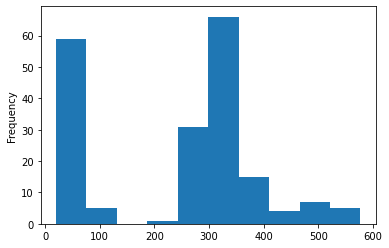

time: 235 ms


In [349]:
# Plot a histogram showing how common different counts are
train_aug.groupby('label').count()['fn'].plot(kind='hist')

In [350]:
train.shape, train_aug.shape

((1109, 2), (47019, 2))

time: 2.59 ms


<AxesSubplot:ylabel='Frequency'>

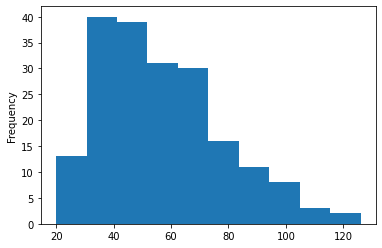

In [65]:
# Plot a histogram showing how common different counts are
train_aug.groupby('label').count()['fn'].plot(kind='hist')

In [66]:
train.shape, train_aug.shape

((1109, 2), (10955, 2))

In [351]:
df = pd.concat([train, train_aug]).reset_index(drop=True)

time: 4.88 ms


In [352]:
df.shape #12064

(48128, 2)

time: 1.97 ms


In [353]:
df.head(2)

fn    label
0  audio_files/IV38R7F.wav  akawuka
1  audio_files/KM4SKWT.wav   banana

time: 5.92 ms


In [354]:
#df.to_csv('submission_1_train_data.csv', index=False)
df.to_csv('submission_2_train_data.csv', index=False)

time: 165 ms


In [262]:
#df = train

time: 379 µs


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

In [74]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T, axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [355]:
features = []

for index, row in df.iterrows():
    
    data = extract_features(row["fn"]) #Path(row["fn"])
    
    features.append([data, row['label']])

time: 22min 44s


In [356]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

time: 15.2 ms


In [357]:
featuresdf.shape #1109

(48128, 2)

time: 2.34 ms


In [359]:
featuresdf['feature'].isnull().sum()

0

time: 6.64 ms


In [360]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

time: 63.8 ms


In [361]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

time: 35.1 ms


In [362]:
featuresdf.loc[0, 'feature'].shape

(40,)

time: 5.62 ms


In [363]:
x_train.shape, x_test.shape

((38502, 40), (9626, 40))

time: 2.47 ms


# Modeling : Baseline

In [364]:
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

time: 697 µs


In [391]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

time: 10.2 ms


In [409]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38502, 40), (9626, 40), (38502,), (9626,))

time: 1.86 ms


In [410]:
model = XGBClassifier()

time: 449 µs


In [411]:
setattr(model, 'verbosity', 2)

time: 412 µs


In [412]:
model.fit(x_train, y_train)

[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:36:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6

[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:36:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6

[17:36:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:36:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:36:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:36:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:36:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:36:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:36:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[

[17:36:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:36:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:36:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:36:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:36:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:36:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:36:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5

[17:36:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:36:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:36:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:36:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:36:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:36:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[17:36:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6

[17:36:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:36:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:36:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:36:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:36:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:36:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:36:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6

[17:37:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:37:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:37:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:37:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:37:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:37:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[17:37:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6

[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:37:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:37:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:37:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:37:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:37:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:37:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:37:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:37:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6

[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:37:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5

[17:37:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:37:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[17:37:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:37:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:37:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:37:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:37:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6

[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:37:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6

[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5

[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6

[17:37:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:37:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[17:37:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:37:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:37:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:37:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:37:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[17:37:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6

[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:37:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6

[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:37:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6

[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:37:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6

[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:37:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6

[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:37:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:38:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6

[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:38:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6

[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:38:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6

[17:38:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:38:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:38:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:38:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:38:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:38:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:38:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:38:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6

[17:38:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:38:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:38:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:38:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:38:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6

[17:38:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:38:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:38:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:38:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:38:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:38:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6

[17:38:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:38:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:38:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[17:38:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[17:38:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:38:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:38:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:38:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:38:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:38:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:38:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:38:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:38:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6

[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:38:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6

[17:38:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:38:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:38:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:38:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:38:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:38:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6

[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:38:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6


[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:39:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6

[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:39:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6

[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:39:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6

[17:39:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:39:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:39:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:39:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:39:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:39:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:39:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6

[17:39:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:39:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:39:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:39:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:39:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:39:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:39:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6

[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:39:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6


[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:39:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6

[17:39:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:39:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:39:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:39:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:39:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:39:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:39:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6

[17:39:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:39:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:39:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:39:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:39:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:39:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:39:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6


[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:39:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:39:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6


[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:39:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:39:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6

[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6

[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:39:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:40:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6

[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:40:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6

[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:40:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=

[17:40:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:40:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:40:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:40:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:40:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:40:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6

[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:40:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6

[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:40:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6

[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:40:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[

[17:40:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:40:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:40:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:40:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:40:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:40:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:40:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6

[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:40:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6

[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:40:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6


[17:40:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:40:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:40:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:40:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:40:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:40:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:40:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6

[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:40:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6


[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6

[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:40:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6

[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:40:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:40:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6

[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:40:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6

[17:40:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:40:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:40:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:40:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:40:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:40:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:40:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4


[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:41:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:41:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:41:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:41:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:41:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:41:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:41:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:41:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:41:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6

[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:41:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6

[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[17:41:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6


[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:41:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6

[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:41:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6


[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:41:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6

[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:41:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6

[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:41:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6

[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:41:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6

[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:41:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3

[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:41:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6


[17:41:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:41:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:41:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:41:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:41:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:41:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:41:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6

[17:41:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:41:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:41:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:41:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:41:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:41:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:41:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[1

[17:41:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:41:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:41:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:41:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:41:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:41:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:41:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6

[17:41:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:41:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:41:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:41:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:41:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:41:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:41:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[

[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:42:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[

[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:42:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6

[17:42:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:42:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:42:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:42:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:42:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:42:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:42:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6

[17:42:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[17:42:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:42:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:42:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:42:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:42:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6

[17:42:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:42:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:42:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:42:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:42:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:42:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[

[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:42:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6

[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:42:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6

[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:42:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6


[17:42:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:42:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:42:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:42:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:42:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:42:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6

[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:42:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6

[17:42:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:42:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:42:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:42:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:42:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:42:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:42:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:42:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:42:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:42:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:42:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[17:42:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6

[17:42:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:42:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:42:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:42:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:42:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:42:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6

[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:42:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[1

[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:42:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6

[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:42:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3


[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:42:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:

[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:42:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:42:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[1

[17:42:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:42:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:42:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:42:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:42:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:42:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:43:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:43:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:43:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:43:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:43:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:43:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17

[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:43:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:43:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6


[17:43:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:43:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:43:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:43:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:43:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:43:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:43:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:43:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:43:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:43:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:43:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:43:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:43:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:43:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6

[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:4

[17:43:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:43:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:43:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:43:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:43:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:43:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:43:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:43:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[17:43:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:43:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:43:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:43:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17

[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:43:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6

[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:43:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[1

[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:43:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6

[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:43:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17

[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6

[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6


[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:43:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:43:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:43:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:43:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:43:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:43:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:43:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:43:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:43:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:43:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:43:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:43:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:44:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:44:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17

[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:44:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:44:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6

[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:4

[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[17:44:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:

[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:44:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[

[17:44:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:44:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:44:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:44:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:44:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:44:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:44:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:44:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[

[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[

[17:44:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[17:44:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:44:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:44:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[

[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:44:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[17:

[17:44:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:44:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:44:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[17:44:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:44:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:44:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6

[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:44

[17:44:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:44:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:44:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[17:44:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:44:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6

[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:44:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6

[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:44:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6

[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:44:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6

[17:44:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:44:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:44:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:44:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:44:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:44:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6

[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:44:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6

[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:45:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[

[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45

[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:45:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17

[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:45:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:

[17:45:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:45:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:45:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:45:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:45:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3


[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[1

[17:45:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:45:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:45:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:45:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:45:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6


[17:45:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:45:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:45:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45

[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:45:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:45:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17

[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:45:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:4

[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6

[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:45:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2


[17:45:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:45:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:45:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:45:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:45:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6

[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:45:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6

[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45

[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:45:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:45:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:45:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:45:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:45:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:45

[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:45:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:4

[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:4

[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:46:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:46:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[

[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:46:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[1

[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:46:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:46:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:46:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:46:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[1

[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46

[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:46:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:

[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:46:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6

[17:46:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:46:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:46:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:46:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[

[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:46:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:46:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:46:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:46:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:46:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[17:46:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6

[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:46

[17:46:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:46:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:46:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:46:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:46:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6

[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:46:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:47:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:

[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:47:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6

[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17

[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:47:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:47:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6


[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47

[17:47:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:47:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:47:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:47:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:47:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6

[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[

[17:47:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:47:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5

[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:47:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6

[17:47:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:47:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[17:47:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:47:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:47:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:47:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[

[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:4

[17:47:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:47:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:47:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:47:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:47:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:47:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6

[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:47:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2


[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0


[17:47:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:47:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:47:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:47:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:47:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:47:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:47:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:47:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:4

[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:48:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:48:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:4

[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[1

[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1


[17:48:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:48:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6

[17:48:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:48:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:48:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:48:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6

[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:48:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[

[17:48:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:4

[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[17:48:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6

[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:48:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5

[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[

[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:48:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5

[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[17:48:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6

[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[1

[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:48

[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:48:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[

[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:48:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:49:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:49:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:49:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:49:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:49:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:49:06] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:49:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:49:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:49:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:49:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:49:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:49:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:49:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:49:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:49:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:49:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:49:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:49:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:49:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:17] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:49:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6

[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:49:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:49:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:

[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:49:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5

[17:49:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:49:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:49:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:49:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:49:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6

[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49

[17:49:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:49:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:49:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:39] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:49:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:49:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:49:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6

[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[17:49:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[

[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5

[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:49:50] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4

[17:49:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:49:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:49:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[17:49:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:49:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:49:53] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6

[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:49:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:49:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:49:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:49:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:49:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:50:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6

[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[

[17:50:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:50:04] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:50:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:5

[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:50:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:50:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:5

[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:50:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:5

[17:50:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:50:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4

[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:50:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17

[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:50:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6

[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:50:28] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[1

[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:5

[17:50:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:50:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:50:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:50:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5

[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:37] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:50:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6

[17:50:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:50:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:50:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:50:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:50:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5

[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:50:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:50:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:50:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:50:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:50:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:50:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6

[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:50:51] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[

[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:50:54] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:5

[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:50:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6

[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17

[17:51:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:51:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:51:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:

[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5

[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:51:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1


[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0


[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:51:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[1

[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:51:15] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51

[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6

[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

[17:51:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:51:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:51:25] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5

[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:51:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[

[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:30] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:51:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:51:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:51:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:51:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:51:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6

[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:51:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[1

[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:38] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51

[17:51:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:51:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:51:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:51:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5

[17:51:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[17:51:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[17:51:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[17:51:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:51:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[

[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:51:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[1

[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:51:52] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6


[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:51:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0


[17:51:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:51:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:51:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:51:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:51:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:51:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5


[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52

[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[17:52:03] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5

[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:05] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:5

[17:52:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:52:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:52:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:52:07] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:52:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:52:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5

[17:52:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[17:52:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:52:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:52:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:52:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5

[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:52:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4

[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[17:52:14] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5

[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[17:52:16] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6

[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[17:52:19] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[1

[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:52:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6

[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[17:52:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6

[17:52:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17:52:26] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:27] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52

[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=5
[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[17:52:29] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4

[17:52:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[17:52:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:31] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[17:

[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[17:52:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

time: 15min 57s


In [413]:
y_pred = model.predict(x_test)

time: 9.47 s


In [414]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.15%
time: 18.8 ms


In [402]:
# first run
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.15%
time: 10.4 ms


In [416]:
y_pred.shape

(9626,)

time: 2.41 ms


In [415]:
model.predict_proba(x_test).shape

(9626, 193)

time: 9.34 s


In [418]:
pred = model.predict_proba(x_test)

time: 9.22 s


In [427]:
xgb_labels = model.classes_

time: 346 µs


In [431]:
len(xgb_labels)

193

time: 1.94 ms


In [448]:
ind = 2
pred[ind].argmax(), xgb_labels[pred[ind].argmax()], y_pred[ind]

(92, 'fruit picking', 'fruit picking')

time: 2.41 ms


In [474]:
model.save_model('models/xgboost_sub2_75.model')

time: 93.1 ms


# 3. Predict & export

* Predict

In [192]:
predict = model.predict(x_test).argmax(1)

array([124,  89,  94, ..., 149,  79, 135])

time: 158 ms


In [199]:
pred_labels = le.inverse_transform(model.predict(x_test).argmax(1))

time: 156 ms


## Format submissions file

In [449]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

fn  maize streak virus  disease  okukkoola  muwogo  \
0  audio_files/00118N3.wav                   0        0          0       0   
1  audio_files/00P0NMV.wav                   0        0          0       0   
2  audio_files/01QEEZI.wav                   0        0          0       0   
3  audio_files/037YAED.wav                   0        0          0       0   
4  audio_files/0382N0Y.wav                   0        0          0       0   

   mpeke  mucungwa  greens  garden  mango  ...  kasaanyi  suckers  insects  \
0      0         0       0       0      0  ...         0        0        0   
1      0         0       0       0      0  ...         0        0        0   
2      0         0       0       0      0  ...         0        0        0   
3      0         0       0       0      0  ...         0        0        0   
4      0         0       0       0      0  ...         0        0        0   

   fertilizer  nakavundira  ekiwojjolo  akawuka  ddagala  ebiwojjolo  \
0           0            0           0        0        0           0   
1           0            0           0        0        0           0   
2           0            0           0        0        0           0   
3           0            0           0        0        0           0   
4           0            0           0        0        0           0   

   obutungulu  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 194 columns]

time: 51.8 ms


In [450]:
ss['fn'].nunique()

1017

time: 2.66 ms


In [460]:
x_pred

array([-2.64064209e+02,  1.15357208e+02,  3.56422844e+01,  7.15047216e+00,
       -4.45182705e+00,  2.60328808e+01, -9.96319771e+00, -9.29498196e+00,
       -3.96354318e+00, -7.21372032e+00,  1.45025980e+00,  2.17741752e+00,
       -7.71069908e+00, -9.35525513e+00, -1.01593390e+01, -4.18746996e+00,
       -9.13389587e+00, -7.35200500e+00, -1.22530775e+01, -1.59574676e+00,
       -1.39254560e+01, -1.26553082e+00, -1.03319435e+01, -4.59925365e+00,
       -9.66093636e+00, -1.03653714e-01, -4.37230873e+00, -3.80314350e+00,
       -4.88327837e+00,  3.22384119e+00, -3.65958643e+00,  6.57472372e-01,
       -6.41588688e-01,  1.15996277e+00, -5.62780380e-01,  2.28736830e+00,
       -2.05051184e+00,  1.59229243e+00, -2.05104208e+00,  1.22838104e+00],
      dtype=float32)

time: 2.61 ms


In [466]:
x_test[0].reshape(1, -1).shape

(1, 40)

time: 2.19 ms


In [468]:
for index, row in ss.iterrows():
    
    x_pred = extract_features(Path(row["fn"]))
    
    #print(data.shape)
    #print(x_pred.shape)
    #x_pred = data.reshape(1, num_rows, num_columns, num_channels)
    
    y_pred = model.predict_proba(x_pred.reshape(1, -1))
    
    #label = le.inverse_transform(y_pred)
    #labels = le.inverse_transform([i for i in range(num_labels)])
    #print(x_pred.shape, y_pred.shape)
    #print(labels.shape)
    
    labels = model.classes_
    
    ss.loc[index, list(labels)] = y_pred[0]

time: 1min 30s


In [470]:
ss.head()

fn  maize streak virus   disease  okukkoola    muwogo  \
0  audio_files/00118N3.wav            0.032328  0.000092   0.007790  0.002580   
1  audio_files/00P0NMV.wav            0.000552  0.000329   0.000743  0.000144   
2  audio_files/01QEEZI.wav            0.000153  0.000323   0.000911  0.009937   
3  audio_files/037YAED.wav            0.000206  0.000434   0.000345  0.059580   
4  audio_files/0382N0Y.wav            0.001951  0.000371   0.000335  0.001408   

      mpeke  mucungwa    greens    garden     mango  ...  kasaanyi   suckers  \
0  0.000098  0.003589  0.000578  0.000713  0.000067  ...  0.021406  0.030142   
1  0.001476  0.002749  0.000224  0.000206  0.000302  ...  0.017953  0.000245   
2  0.000833  0.006951  0.000050  0.000098  0.000136  ...  0.000061  0.000086   
3  0.000632  0.004742  0.000410  0.001577  0.000178  ...  0.001242  0.000431   
4  0.011309  0.007171  0.000338  0.000155  0.000387  ...  0.001145  0.000174   

    insects  fertilizer  nakavundira  ekiwojjolo   akawuka   ddagala  \
0  0.000363    0.001165     0.001128    0.004206  0.003041  0.000584   
1  0.000700    0.002161     0.037411    0.002416  0.003280  0.000757   
2  0.000254    0.000232     0.000195    0.003479  0.000752  0.000035   
3  0.000257    0.000150     0.000549    0.000599  0.000392  0.000056   
4  0.000978    0.000717     0.001937    0.007227  0.000716  0.000462   

   ebiwojjolo  obutungulu  
0    0.000523    0.000403  
1    0.003659    0.008395  
2    0.001469    0.001130  
3    0.000214    0.000831  
4    0.013299    0.005215  

[5 rows x 194 columns]

time: 20.1 ms


In [471]:
ss.set_index(ss['fn'], drop=True).drop('fn', 1).apply(sum, axis=1).mean()

1.000000001168189

time: 31.4 ms


In [473]:
ss.to_csv('output/Submission2.csv', index=False)

time: 414 ms
